<a href="https://colab.research.google.com/github/Rezckant/Heart_Failure-HyperParameter-Tuning-/blob/main/HF_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('heart.csv')
X = df.iloc[: , :]
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

# Exploratory Data Anlaysis - EDA

In [10]:
print("Shape: ", df.shape)
print("Null: ",df.isna().sum())
print("Duplicated: ",df.duplicated().sum())

Shape:  (918, 12)
Null:  Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Duplicated:  0


In [11]:
features = df.columns.values
for f in features :
    print(f,': ',df[f].unique())
    print()

Age :  [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Sex :  ['M' 'F']

ChestPainType :  ['ATA' 'NAP' 'ASY' 'TA']

RestingBP :  [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Cholesterol :  [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 

In [12]:
print(df.HeartDisease.value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


**we have a bit of imbalance in our dependent variable, we can fix it later**

In [13]:
descripction_num = df.describe(include=['O'])
descripction_num

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

In [14]:
descripction = df.describe().T
descripction

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

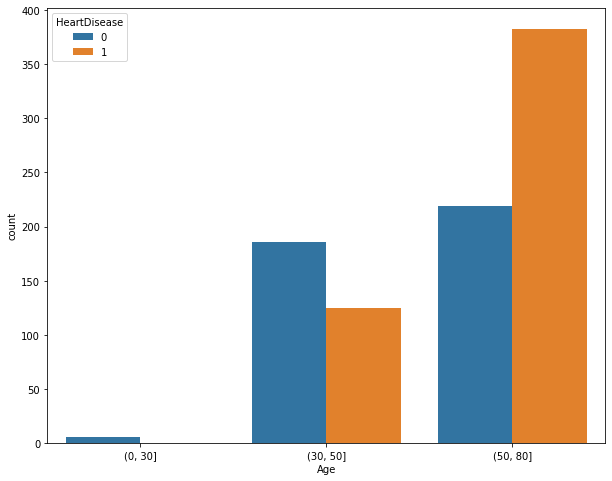

In [15]:
bins=[0,30,50,80]
plt.figure(figsize =(10,8))
sns.countplot(x=pd.cut(df.Age, bins=bins), hue=df.HeartDisease)
plt.show()

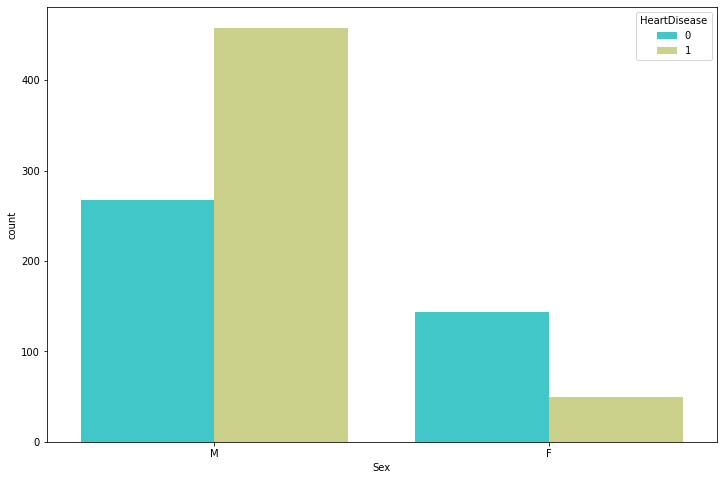

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='Sex',data=df, palette='rainbow', hue='HeartDisease')
plt.show()

**this is worrisome, men seem to suffer much more heart disease than women. There is a very large imbalance between the sexes, which could negatively affect the way our models predict heart disease in women.**

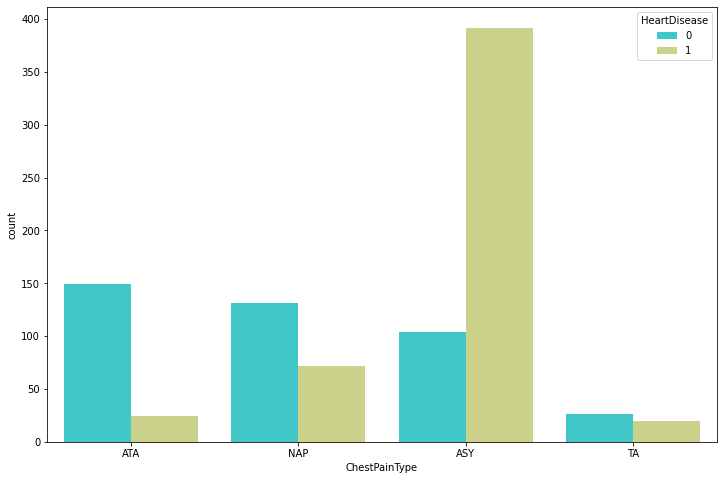

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='ChestPainType',data=df, palette='rainbow',hue='HeartDisease')
plt.show()

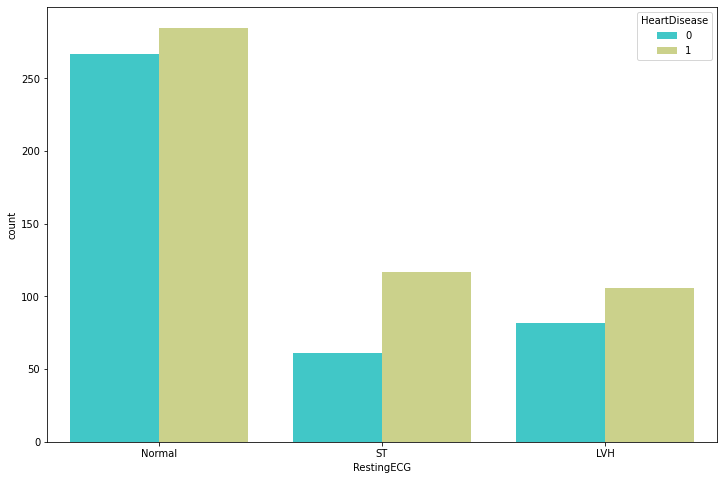

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='RestingECG',data=df, palette='rainbow',hue='HeartDisease')
plt.show()

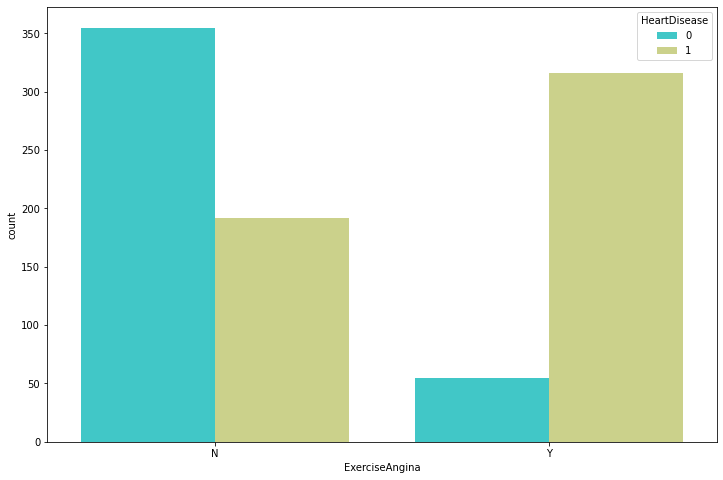

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='ExerciseAngina',data=df, palette='rainbow',hue='HeartDisease')
plt.show()

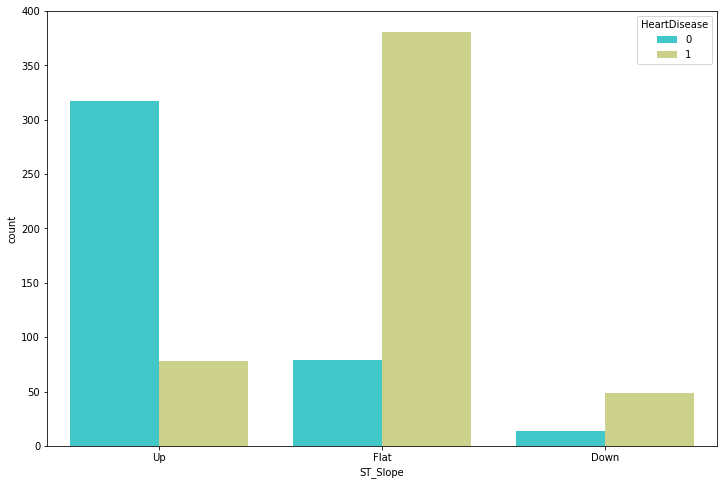

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='ST_Slope',data=df, palette='rainbow',hue='HeartDisease')
plt.show()

In [21]:
df_number = df.select_dtypes(include=[np.number])
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

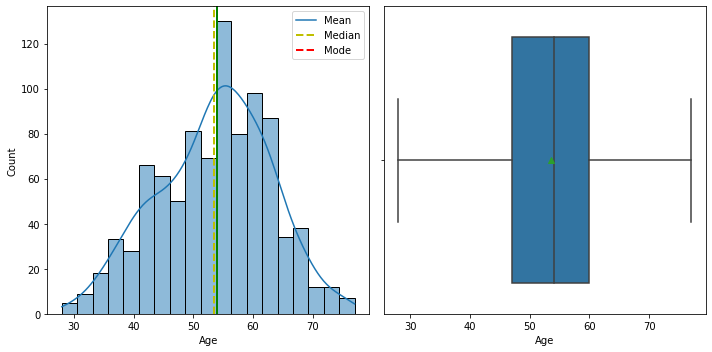

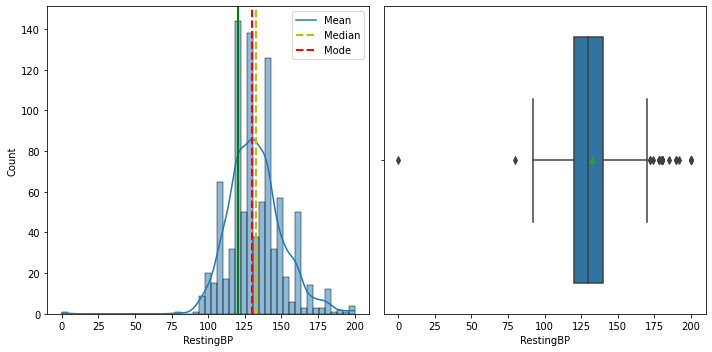

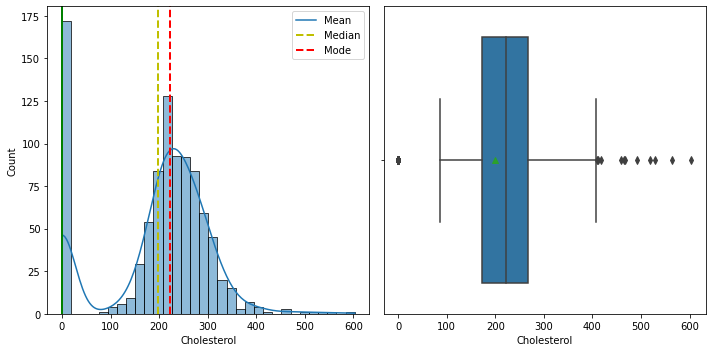

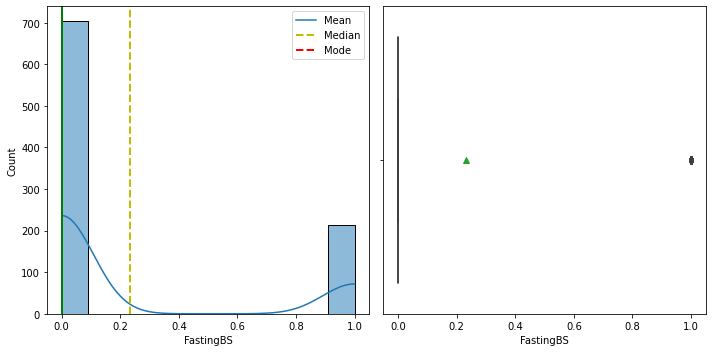

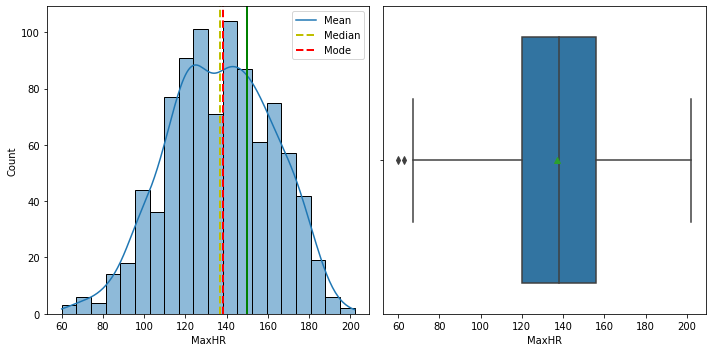

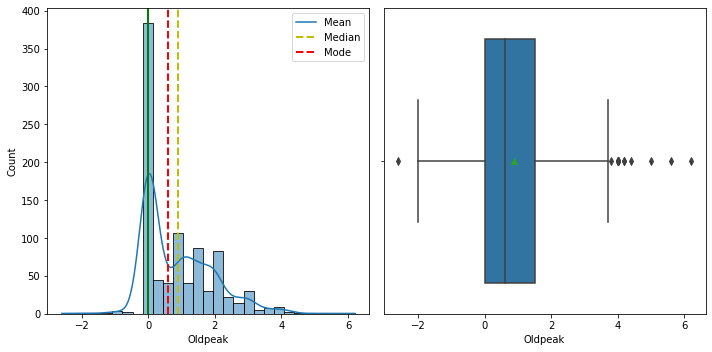

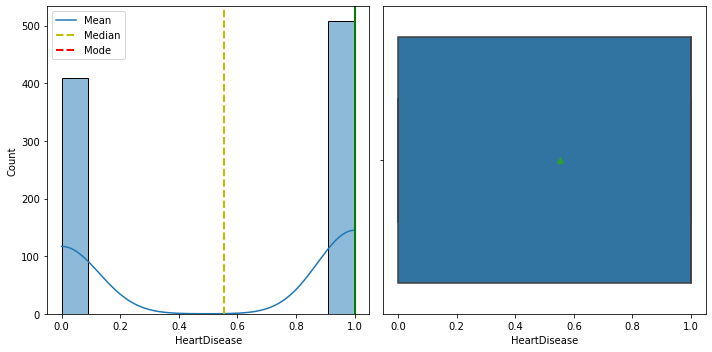

In [22]:
for f in df_number:
    plot_uni(df[f])

* Age : has a good distribution and does not contain outliers.
* RestingBP : we can improve your distribution.
* Cholesterol : It contains a fairly large amount of null(0) values, to solve this we will impute these values.

# Bias and Variance

In [23]:
df_skew = pd.DataFrame(data={
    'skewness': df.skew()}) 
df_skew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


skewness
Age          -0.195933
RestingBP     0.179839
Cholesterol  -0.610086
FastingBS     1.264484
MaxHR        -0.144359
Oldpeak       1.022872
HeartDisease -0.215086

**Transforming the Variables to attain Normal Distribution**

In [24]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer()

In [25]:
for col in df_number.drop(['HeartDisease'], axis = 1).columns:
    X[col] = pt.fit_transform(X[col].values.reshape(-1,1))

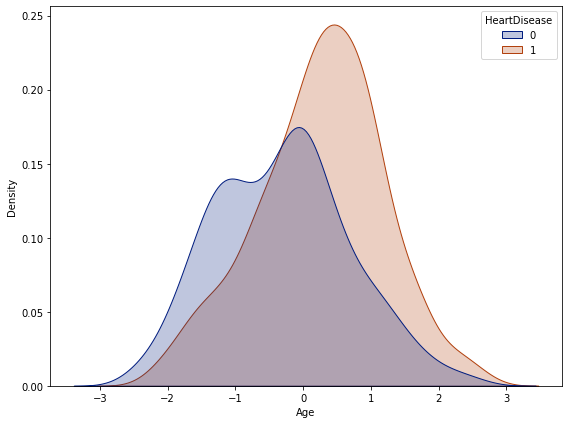

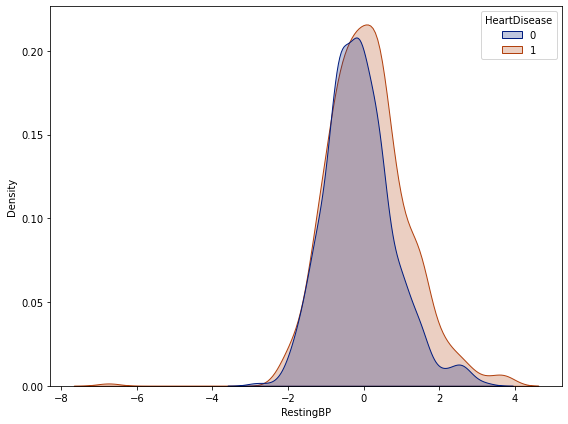

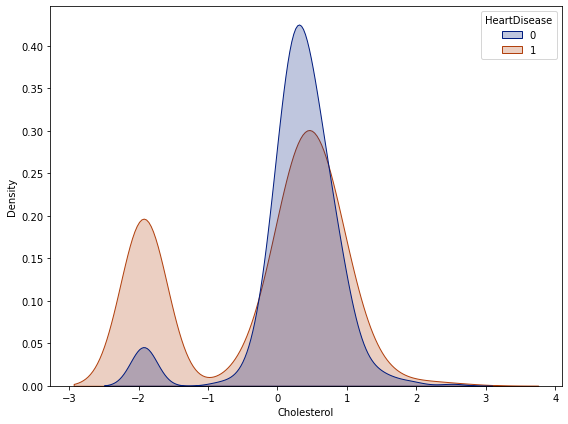

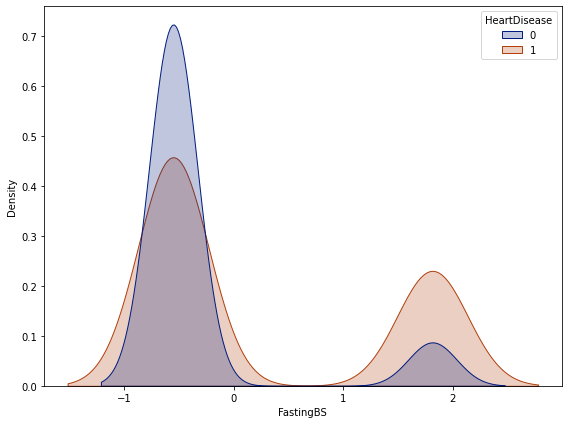

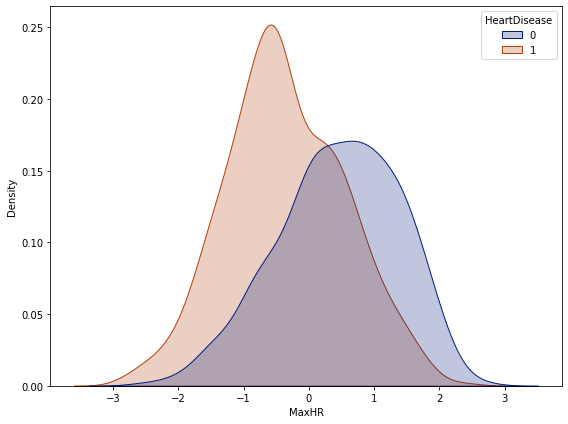

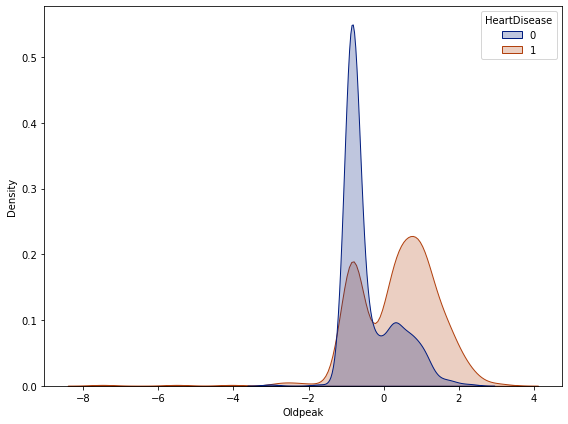

In [26]:
for col in df_number.drop('HeartDisease', axis = 1):
  f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))    
  sns.kdeplot(data = X, x = col, hue = 'HeartDisease', fill = 'dark', palette = 'dark' )
  plt.tight_layout()

# Bi variate Analysis

In [27]:
def plot_dis(d):
    f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))   
    sns.boxenplot(x ='HeartDisease',y = d,  data = df ,palette = 'rainbow')
    plt.tight_layout()

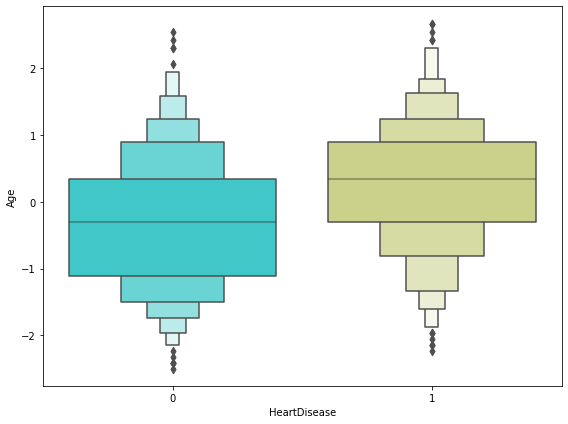

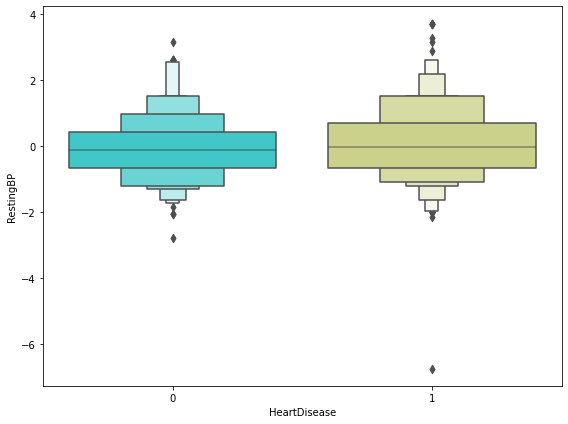

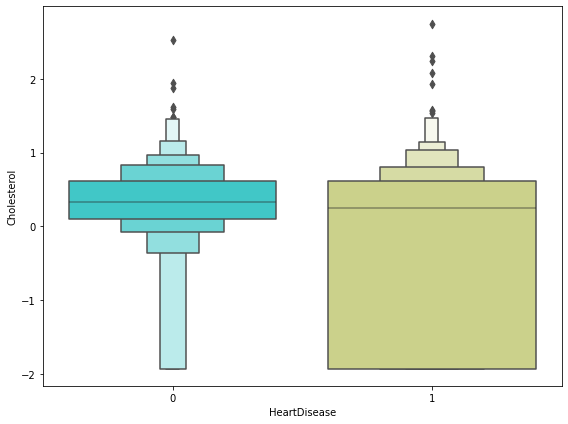

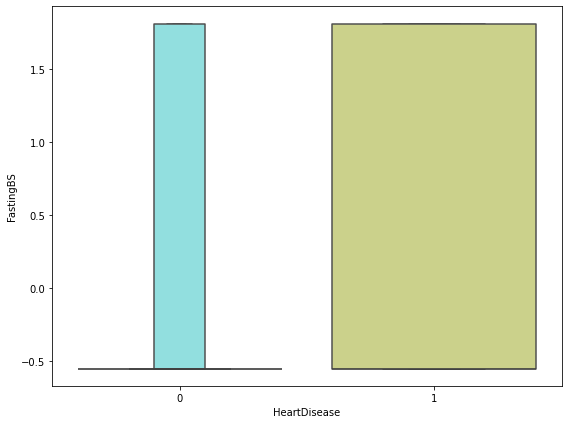

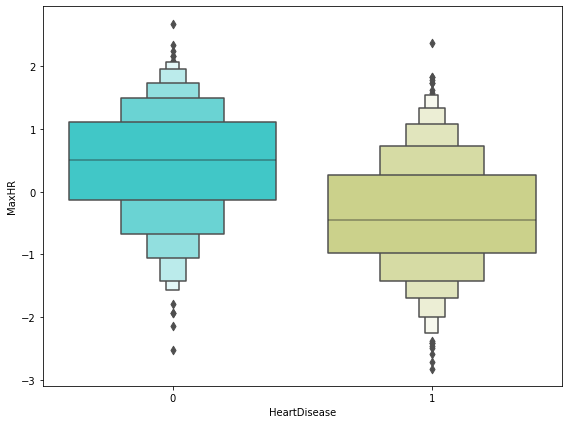

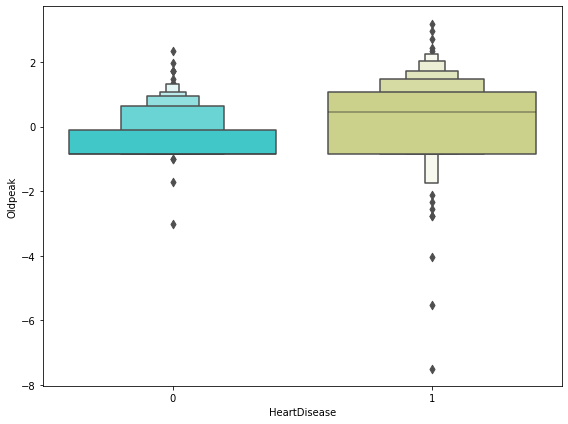

In [28]:
for f in df_number.drop(['HeartDisease'], axis = 1):
    plot_dis(X[f])

# Correlations

In [29]:
corr = X.corr()

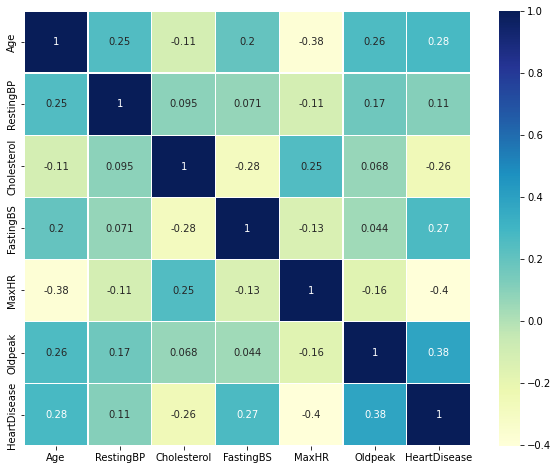

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=X.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white')
plt.show()

**In general, the variables do not correlate much with each other. The variable most closely related to HeartDisease is Oldpeak.**

In [31]:
X.Sex.replace(['M', 'F'], [1, 0], inplace=True)
X.ChestPainType.replace(['ATA', 'NAP', 'ASY', 'TA'], [1, 2, 3, 4], inplace=True)
X.RestingECG.replace(['Normal', 'ST', 'LVH'], [1, 2, 3], inplace=True)
X.ExerciseAngina.replace(['N', 'Y'], [0, 1], inplace=True)
X.ST_Slope.replace(['Up', 'Flat', 'Down'], [1, 2, 3], inplace=True)

In [32]:
corr = X.corr()
corr.sort_values(['HeartDisease'], ascending=False, inplace=True)
corr.HeartDisease[:25]

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
ChestPainType     0.459017
Oldpeak           0.381840
Sex               0.305445
Age               0.280801
FastingBS         0.267291
RestingBP         0.108604
RestingECG        0.061011
Cholesterol      -0.259316
MaxHR            -0.402346
Name: HeartDisease, dtype: float64

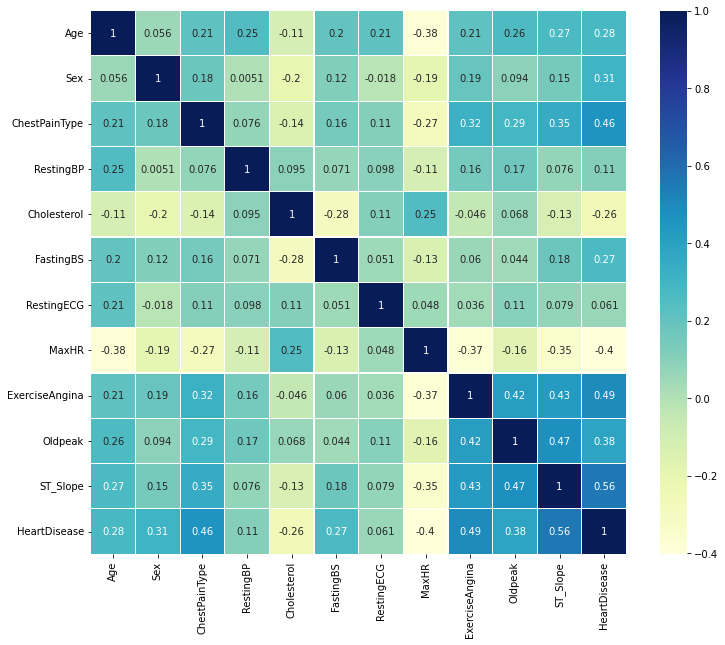

In [33]:
plt.figure(figsize = (12,10))
sns.heatmap(data=X.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white')
plt.show()

* 3 of our categorical variables are more closely related to the dependent variable than the most correlated numerical variable
* Oldpeak, ExerciseAngina, ST_Slope are closely related to each other

In [34]:
y = X.iloc[:,-1]
X = X.iloc[:, :-1]

# Imbalance

In [35]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 15)

In [36]:
print(y.value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


In [37]:
X_res,y_res = smk.fit_resample(X,y)
print(y_res.value_counts()) 

0    483
1    483
Name: HeartDisease, dtype: int64


In [38]:
X = X_res
y = y_res

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Models



In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
models = pd.DataFrame(columns=["Model","Accuracy Score"])

## Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       128
           1       0.90      0.88      0.89       114

    accuracy                           0.90       242
   macro avg       0.90      0.90      0.90       242
weighted avg       0.90      0.90      0.90       242



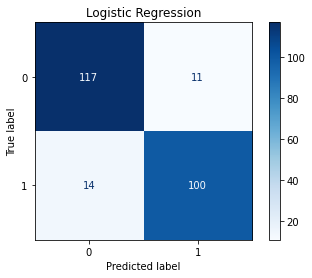

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('Logistic Regression')
print(classification_report(y_test, predictions))


In [42]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

##  K-Nearest Neighbors (Knn)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       128
           1       0.88      0.85      0.87       114

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.88       242
weighted avg       0.88      0.88      0.88       242



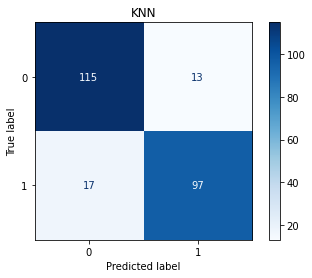

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('KNN')
print(classification_report(y_test, predictions))

In [44]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "KNN", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

## Suport Vector Machine (svm)

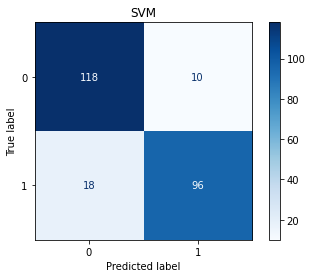

In [45]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", random_state = 0)
svm.fit(X_train, y_train) 
predictions = svm.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('SVM')
report = (classification_report(y_test, predictions))

In [46]:
score = accuracy_score(y_test, predictions)
new_row = {"Model": "SVM", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

## Naive bayes

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       128
           1       0.88      0.88      0.88       114

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



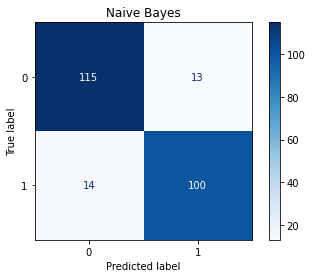

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('Naive Bayes')
print(classification_report(y_test, predictions))

In [48]:
score = accuracy_score(y_test, predictions)
new_row = {"Model": "NaiveBayes", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

## Random Forest

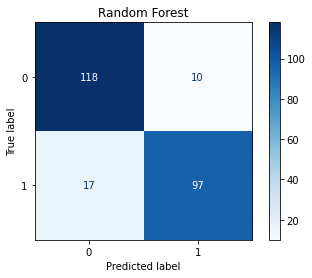

In [49]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 200, criterion = "gini", random_state = 0)
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('Random Forest')
report = (classification_report(y_test, predictions))

In [50]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       128
           1       0.91      0.85      0.88       114

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



In [51]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "RandomForest", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

## XGBoost

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       128
           1       0.89      0.87      0.88       114

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



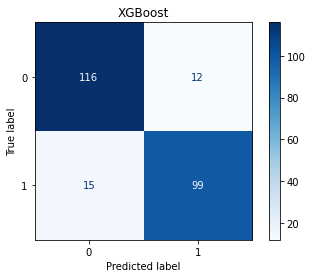

In [52]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
predictions = XGB.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('XGBoost')
print(classification_report(y_test, predictions))

In [53]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "XGBoost", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

## CatBoost

In [54]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


              precision    recall  f1-score   support

           0       0.87      0.92      0.90       128
           1       0.91      0.85      0.88       114

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



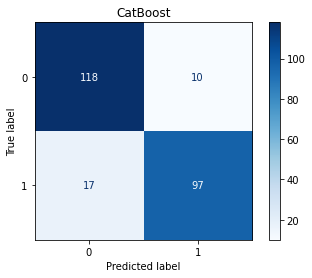

In [55]:
from catboost import CatBoostClassifier
CatBoost = CatBoostClassifier(verbose=False)
CatBoost.fit(X_train,y_train,eval_set=(X_test, y_test))
predictions = CatBoost.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('CatBoost')
print(classification_report(y_test, predictions))

In [56]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "CatBoost", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

## ExtraTreeClassifier

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       128
           1       0.90      0.83      0.87       114

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



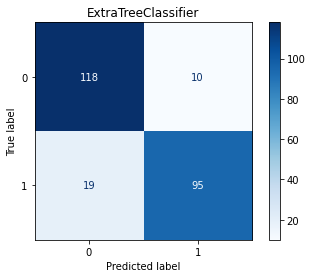

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 200,
                                        criterion ='entropy', max_features = 'auto')
etc.fit(X_train,y_train)
predictions = etc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('ExtraTreeClassifier')
print(classification_report(y_test, predictions))

In [58]:
score = accuracy_score(y_test, predictions)
new_row = {"Model": "ETC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)


##  GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       128
           1       0.90      0.90      0.90       114

    accuracy                           0.91       242
   macro avg       0.91      0.91      0.91       242
weighted avg       0.91      0.91      0.91       242



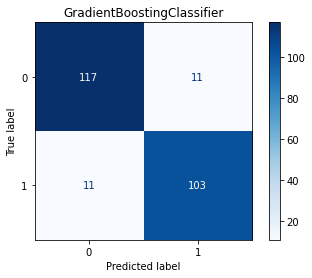

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
predictions = gbc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('GradientBoostingClassifier')
print(classification_report(y_test, predictions))

In [60]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "GBC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)


In [61]:
models = models.sort_values(by="Accuracy Score", ascending=False)
print(models)

                Model  Accuracy Score
8                 GBC        0.909091
0  LogisticRegression        0.896694
3          NaiveBayes        0.888430
4        RandomForest        0.888430
5             XGBoost        0.888430
6            CatBoost        0.888430
2                 SVM        0.884298
7                 ETC        0.880165
1                 KNN        0.876033


In [62]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gbc, X = X_train, y = y_train, cv = 10)
print(accuracies.mean()) # Bias

0.9073820395738205


In [63]:
print(accuracies.std()) # Variance

0.02418110147013995


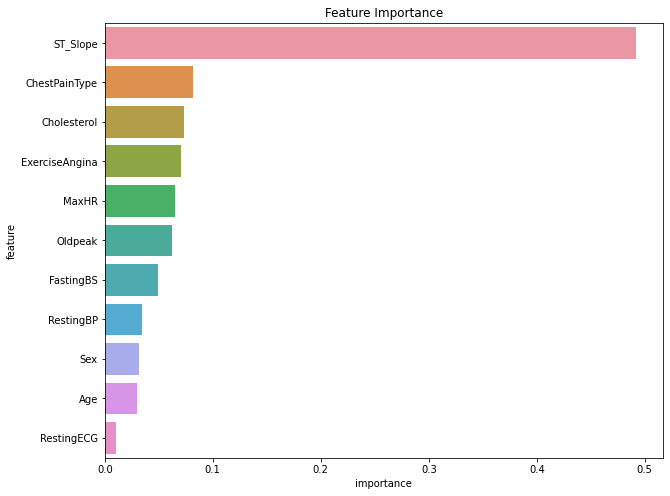

In [64]:
tmp=pd.DataFrame({'feature':X.columns,
                 'importance':gbc.feature_importances_}).sort_values(by='importance',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=tmp.importance ,y=tmp.feature).set_title('Feature Importance')
plt.show()

# Hyperparameter tuning With Optuna

In [65]:
import optuna  
from sklearn.metrics import recall_score
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
import plotly.graph_objs as go
import plotly.io as pio

## XGBoost

In [68]:
def objetive(trial):
    param = {
            'booster': trial.suggest_categorical("booster", ['gbtree', 'gblinear', 'dart']),
            'lambda': trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            'alpha': trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            "n_estimators": trial.suggest_int("n_estimatos", 500, 1000),
            "gamma": trial.suggest_int("gamma", 0, 2),
            "max_depth": trial.suggest_int("max_dept", 3, 10),
            "n_jobs": (-1)
        }

    trial_xgb = XGBClassifier(**param, random_state = 1)
    trial_xgb.fit(X_train,y_train)
    predictions = trial_xgb.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score

In [69]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objetive, n_trials = 70, n_jobs= -1)

[I 2022-04-19 20:31:36,361] A new study created in memory with name: no-name-6242eb92-f677-4dcb-869a-3eba04bbd468
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  FutureWarning,
[I 2022-04-19 20:31:38,497] Trial 0 finished with value: 0.8771929824561403 and parameters: {'booster': 'gbtree', 'lambda': 0.06877504935333502, 'alpha': 6.952846411293244e-05, 'n_estimatos': 610, 'gamma': 2, 'max_dept': 9}. Best is trial 0 with value: 0.8771929824561403.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:31:38,830] Trial 2 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 0.09341027054768329, 'alpha': 0.047800386201058996, 'n_estimatos': 669, 'gamma': 0, 'max_dept': 10}. Best is trial 0 with value: 0.8771929824561403.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:31:39,145] Trial 3 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 6.723744033760455e-05, 'alpha': 2.852994723449752e-08, 'n_estimatos': 592, 'gamma': 0, 'max_dept': 3}. Best is trial 0 with value: 0.8771929824561403.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:31:39,880] Trial 1 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 2.814774247473858e-08, 'alpha': 4.244295901338259e-06, 'n_estimatos': 651, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:31:40,965] Trial 4 finished with value: 0.868421052631579 and parameters: {'booster': 'gbtree', 'lambda': 0.006356233954639214, 'alpha': 7.141117290321882e-06, 'n_estimatos': 951, 'gamma': 1, 'max_dept': 6}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:31:41,358] Trial 5 finished with value: 0.868421052631579 and parameters: {'booster': 'gbtree', 'lambda': 1.8012825633938356e-06, 'alpha': 2.683857163334022e-07, 'n_estimatos': 792, 'gamma': 0, 'max_dept': 7}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 20:31:41,830] Trial 7 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 0.0015191731162594734, 'alpha': 5.906607324610508e-05, 'n_estimatos': 666, 'gamma': 1, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:31:42,224] Trial 8 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 1.639681551939632e-08, 'alpha': 9.651932324021171e-05, 'n_estimatos': 677, 'gamma': 1, 'max_dept': 5}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:31:46,216] Trial 9 finished with value: 0.868421052631579 and parameters: {'booster': 'dart', 'lambda': 8.288381312723852e-07, 'alpha': 0.005090173107608074, 'n_estimatos': 696, 'gamma': 2, 'max_dept': 5}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:31:47,439] Trial 6 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 0.0033717851227863466, 'alpha': 1.398367627360234e-06, 'n_estimatos': 755, 'gamma': 1, 'max_dept': 7}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:31:49,621] Trial 11 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 2.828553166466629e-08, 'alpha': 0.9392369672095036, 'n_estimatos': 508, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:31:51,657] Trial 12 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 3.3194204578117435e-08, 'alpha': 0.1963845472208493, 'n_estimatos': 512, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:31:53,775] Trial 13 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 3.7835647130463875e-07, 'alpha': 0.004499154700686167, 'n_estimatos': 507, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:31:56,264] Trial 10 finished with value: 0.868421052631579 and parameters: {'booster': 'dart', 'lambda': 3.6883279196858664e-06, 'alpha': 0.24788317620725756, 'n_estimatos': 549, 'gamma': 0, 'max_dept': 6}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:31:59,091] Trial 14 finished with value: 0.868421052631579 and parameters: {'booster': 'dart', 'lambda': 1.7583851284299235e-05, 'alpha': 0.0017740637678035894, 'n_estimatos': 829, 'gamma': 1, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:32:01,314] Trial 15 finished with value: 0.868421052631579 and parameters: {'booster': 'dart', 'lambda': 3.1157941615775586e-05, 'alpha': 0.00397619419526922, 'n_estimatos': 872, 'gamma': 1, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:32:02,720] Trial 16 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 6.767833642390531e-08, 'alpha': 5.5205423579698325e-06, 'n_estimatos': 898, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:04,176] Trial 17 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 6.392706156596155e-08, 'alpha': 5.655118352349384e-06, 'n_estimatos': 602, 'gamma': 2, 'max_dept': 8}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:05,550] Trial 18 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 3.286150436706269e-07, 'alpha': 0.0006029697550114031, 'n_estimatos': 593, 'gamma': 2, 'max_dept': 8}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:06,458] Trial 20 finished with value: 0.8771929824561403 and parameters: {'booster': 'gbtree', 'lambda': 2.3698863255891392e-07, 'alpha': 1.4909311730431068e-08, 'n_estimatos': 726, 'gamma': 1, 'max_dept': 5}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:32:07,014] Trial 19 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 2.5739872839209865e-07, 'alpha': 0.0006415303059996356, 'n_estimatos': 563, 'gamma': 1, 'max_dept': 5}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:32:08,408] Trial 22 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 1.0165899309148827e-08, 'alpha': 0.0442095347143797, 'n_estimatos': 500, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:10,009] Trial 23 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 3.1902195777093187e-06, 'alpha': 0.02144492189487864, 'n_estimatos': 535, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:10,866] Trial 21 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 0.00039763651476254177, 'alpha': 0.028013267982014305, 'n_estimatos': 994, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:11,483] Trial 24 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 8.344132102330074e-08, 'alpha': 0.5577539403352011, 'n_estimatos': 510, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:15,126] Trial 25 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 0.0004087108623145291, 'alpha': 0.8833829652511904, 'n_estimatos': 1000, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:15,855] Trial 26 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 0.0003943228143503124, 'alpha': 0.10855810049243028, 'n_estimatos': 999, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:16,959] Trial 27 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 6.282508237552903e-06, 'alpha': 0.1390627830779374, 'n_estimatos': 554, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:17,198] Trial 29 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 1.4023989321632078e-07, 'alpha': 1.941441570898529e-07, 'n_estimatos': 637, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:32:18,143] Trial 28 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 7.229053449926606e-06, 'alpha': 1.774337762470922e-07, 'n_estimatos': 633, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.
[I 2022-04-19 20:32:18,291] Trial 30 finished with value: 0.868421052631579 and parameters: {'booster': 'gbtree', 'lambda': 0.011266114242167193, 'alpha': 3.683388983205735e-05, 'n_estimatos': 776, 'gamma': 1, 'max_dept': 6}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:19,456] Trial 31 finished with value: 0.8771929824561403 and parameters: {'booster': 'gbtree', 'lambda': 0.025515306474130476, 'alpha': 1.868333494986692e-07, 'n_estimatos': 632, 'gamma': 1, 'max_dept': 10}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:20,222] Trial 32 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 7.131064816262506e-07, 'alpha': 1.520548422001154e-07, 'n_estimatos': 571, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:21,757] Trial 34 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 7.73134843622076e-07, 'alpha': 0.01118296170736123, 'n_estimatos': 516, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:23,302] Trial 35 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 2.743372974391923e-08, 'alpha': 0.006373187634333924, 'n_estimatos': 524, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:25,080] Trial 36 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 0.0001961816232469078, 'alpha': 0.000375715621043536, 'n_estimatos': 536, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.
[I 2022-04-19 20:32:25,243] Trial 33 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 1.0340410782774492e-08, 'alpha': 1.2052762834717416e-06, 'n_estimatos': 631, 'gamma': 0, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---
---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:25,311] Trial 37 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 1.0966210619842422e-06, 'alpha': 4.2022667917236595e-08, 'n_estimatos': 577, 'gamma': 0, 'max_dept': 5}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:32:25,545] Trial 38 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 0.3762105969053412, 'alpha': 0.027990613953240102, 'n_estimatos': 717, 'gamma': 0, 'max_dept': 9}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:32:26,134] Trial 40 finished with value: 0.8771929824561403 and parameters: {'booster': 'gbtree', 'lambda': 1.16040607419024e-08, 'alpha': 0.007549692470874683, 'n_estimatos': 531, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:26,877] Trial 39 finished with value: 0.8771929824561403 and parameters: {'booster': 'gbtree', 'lambda': 3.2749962971533264e-08, 'alpha': 0.01287577516072014, 'n_estimatos': 717, 'gamma': 2, 'max_dept': 9}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:28,508] Trial 42 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 2.214652511242333e-06, 'alpha': 0.058415724508292945, 'n_estimatos': 537, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.
[I 2022-04-19 20:32:28,650] Trial 41 finished with value: 0.868421052631579 and parameters: {'booster': 'dart', 'lambda': 3.773362027758662e-08, 'alpha': 2.2309764446664328e-05, 'n_estimatos': 663, 'gamma': 2, 'max_dept': 5}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:30,163] Trial 43 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 2.854813343903528e-06, 'alpha': 0.36703250381743224, 'n_estimatos': 539, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:30,702] Trial 44 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 8.152465026112904e-06, 'alpha': 7.337553520093643e-07, 'n_estimatos': 574, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:32,253] Trial 45 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 1.1126971595721778e-05, 'alpha': 1.0850045202970763e-06, 'n_estimatos': 570, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:32,651] Trial 46 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 7.559708303477455e-07, 'alpha': 0.05627001845945701, 'n_estimatos': 578, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:33,981] Trial 47 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 1.93031959067199e-06, 'alpha': 0.05327955413566393, 'n_estimatos': 527, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:34,978] Trial 48 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 6.326509780933947e-05, 'alpha': 4.1582358298464615e-07, 'n_estimatos': 616, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:35,198] Trial 50 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 2.3329417412885763e-05, 'alpha': 0.47749668061148187, 'n_estimatos': 555, 'gamma': 1, 'max_dept': 7}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:32:36,208] Trial 49 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 3.945714151117638e-05, 'alpha': 0.0019452285263866181, 'n_estimatos': 613, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:37,804] Trial 52 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 4.0738740387534206e-07, 'alpha': 0.0024578913106186855, 'n_estimatos': 515, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:39,245] Trial 51 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 0.0016089708973296888, 'alpha': 0.020388312316219646, 'n_estimatos': 924, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.
[I 2022-04-19 20:32:39,373] Trial 53 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 1.01786745407339e-07, 'alpha': 0.01589809322017083, 'n_estimatos': 502, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---
---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:40,811] Trial 54 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 1.2086536865884086e-07, 'alpha': 0.0018824325581904891, 'n_estimatos': 506, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:42,814] Trial 55 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 1.0371468454292167e-07, 'alpha': 0.1256529967938674, 'n_estimatos': 842, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:44,045] Trial 56 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 1.3578936301702427e-06, 'alpha': 0.11465036143972454, 'n_estimatos': 811, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:46,032] Trial 58 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 4.64024053692112e-06, 'alpha': 0.29313922061372005, 'n_estimatos': 555, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:47,462] Trial 57 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 3.5562910544110804e-06, 'alpha': 0.3863872747910139, 'n_estimatos': 968, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:47,919] Trial 59 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 6.728735497137564e-07, 'alpha': 6.343549727899411e-08, 'n_estimatos': 589, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:49,556] Trial 60 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 4.258737240511028e-06, 'alpha': 0.00024117697130490923, 'n_estimatos': 586, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:50,438] Trial 61 finished with value: 0.868421052631579 and parameters: {'booster': 'dart', 'lambda': 4.799447101758164e-07, 'alpha': 4.6743950429027577e-08, 'n_estimatos': 593, 'gamma': 2, 'max_dept': 6}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:51,413] Trial 62 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 2.1460085150651873e-08, 'alpha': 0.00019028478653316722, 'n_estimatos': 589, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:51,990] Trial 63 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 0.00013002126587803332, 'alpha': 0.008948421317295546, 'n_estimatos': 531, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:53,054] Trial 64 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 2.3655799820903965e-08, 'alpha': 2.594068420175302e-06, 'n_estimatos': 537, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:32:53,795] Trial 65 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 2.0577064727733025e-06, 'alpha': 9.521166314388571e-08, 'n_estimatos': 546, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:54,880] Trial 66 finished with value: 0.8771929824561403 and parameters: {'booster': 'dart', 'lambda': 1.8996354989104282e-07, 'alpha': 0.006621439153620115, 'n_estimatos': 548, 'gamma': 2, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:32:55,239] Trial 68 finished with value: 0.868421052631579 and parameters: {'booster': 'gblinear', 'lambda': 1.1720960004826325e-05, 'alpha': 1.11681251576081e-06, 'n_estimatos': 903, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 20:32:56,394] Trial 67 finished with value: 0.8947368421052632 and parameters: {'booster': 'dart', 'lambda': 1.334393992975231e-05, 'alpha': 1.8454257037126274e-06, 'n_estimatos': 573, 'gamma': 1, 'max_dept': 3}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:32:56,641] Trial 69 finished with value: 0.868421052631579 and parameters: {'booster': 'gbtree', 'lambda': 0.0013134279121554827, 'alpha': 0.6027945642481412, 'n_estimatos': 939, 'gamma': 1, 'max_dept': 4}. Best is trial 1 with value: 0.8947368421052632.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


In [70]:
print(study.best_params)
xgb_tuned = study.best_params

{'booster': 'dart', 'lambda': 2.814774247473858e-08, 'alpha': 4.244295901338259e-06, 'n_estimatos': 651, 'gamma': 1, 'max_dept': 3}


In [71]:
plot_optimization_history(study)

**it seems that 70 trials were more than what was needed**

In [72]:
plot_param_importances(study)

**I am used to seeing depth being a relevant parameter for tree-based algorithms, but this time XGBoost gave a lot of importance to the gamma parameter and not so much to the n-estimators as most of the cases I saw.**

In [74]:
plot_slice(study, ['gamma','max_dept'])

In [75]:
plot_parallel_coordinate(study)

In [92]:
plot_slice(study)

* **As the tests progress, optuna starts to opt more and more for a value of n-estimators close to 500, this means that for optuna less n-estimators is better, it might be a good idea to reduce the number of possible n-estimators.**
* **We could also reduce the number of possible "max_dept" of the model.**

### XGBoost trial 2

In [96]:
def objetive(trial):
    param = {
            'booster': trial.suggest_categorical("booster", ['gbtree', 'gblinear', 'dart']),
            'lambda': trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            'alpha': trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            "n_estimators": trial.suggest_int("n_estimatos", 200, 650),
            "gamma": trial.suggest_int("gamma", 0, 2),
            "max_depth": trial.suggest_int("max_dept", 1, 6),
            "n_jobs": (-1)
        }

    trial_xgb = XGBClassifier(**param, random_state = 1)
    trial_xgb.fit(X_train,y_train)
    predictions = trial_xgb.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [97]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objetive, n_trials = 70, n_jobs= -1)

[I 2022-04-19 21:34:54,473] A new study created in memory with name: no-name-89e0e486-bcf7-404a-85e5-40148d8ff4ad
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2022-04-19 21:34:54,801] Trial 1 finished with value: 0.8925619834710744 and parameters: {'booster': 'gbtree', 'lambda': 0.00010392787275995573, 'alpha': 0.3154568841112029, 'n_estimatos': 260, 'gamma': 1, 'max_dept': 5}. Best is trial 1 with value: 0.8925619834710744.
[I 2022-04-19 21:34:54,905] Trial 2 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 1.2940350293855206e-07, 'alpha': 0.013770217706757779, 'n_estimatos': 264, 'gamma': 2, 'max_dept': 6}. Best is trial 1 with value: 0.8925619834710744.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 21:34:55,061] Trial 3 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 0.008428224891364512, 'alpha': 0.00011604929299004755, 'n_estimatos': 391, 'gamma': 2, 'max_dept': 3}. Best is trial 1 with value: 0.8925619834710744.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 21:34:55,531] Trial 4 finished with value: 0.9008264462809917 and parameters: {'booster': 'dart', 'lambda': 9.977053750890059e-06, 'alpha': 1.3654667687135925e-05, 'n_estimatos': 205, 'gamma': 2, 'max_dept': 3}. Best is trial 4 with value: 0.9008264462809917.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 21:34:56,175] Trial 0 finished with value: 0.8966942148760331 and parameters: {'booster': 'dart', 'lambda': 1.1459898177630726e-07, 'alpha': 1.2715261011609135e-08, 'n_estimatos': 502, 'gamma': 0, 'max_dept': 1}. Best is trial 4 with value: 0.9008264462809917.
[I 2022-04-19 21:34:56,216] Trial 5 finished with value: 0.8925619834710744 and parameters: {'booster': 'gbtree', 'lambda': 0.00011521338444163164, 'alpha': 1.3110550829146258e-07, 'n_estimatos': 645, 'gamma': 1, 'max_dept': 4}. Best is trial 4 with value: 0.9008264462809917.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 21:34:56,705] Trial 7 finished with value: 0.9008264462809917 and parameters: {'booster': 'gbtree', 'lambda': 0.013227237732685538, 'alpha': 2.3670954972272577e-05, 'n_estimatos': 580, 'gamma': 2, 'max_dept': 3}. Best is trial 4 with value: 0.9008264462809917.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 21:34:57,019] Trial 8 finished with value: 0.8966942148760331 and parameters: {'booster': 'gbtree', 'lambda': 3.5644117020935985e-07, 'alpha': 1.0036637745491427e-07, 'n_estimatos': 269, 'gamma': 2, 'max_dept': 4}. Best is trial 4 with value: 0.9008264462809917.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 21:34:57,287] Trial 9 finished with value: 0.9049586776859504 and parameters: {'booster': 'gbtree', 'lambda': 0.005283587438668774, 'alpha': 4.706540006268e-08, 'n_estimatos': 361, 'gamma': 2, 'max_dept': 2}. Best is trial 9 with value: 0.9049586776859504.
[I 2022-04-19 21:34:57,482] Trial 6 finished with value: 0.8966942148760331 and parameters: {'booster': 'dart', 'lambda': 0.002120755076030523, 'alpha': 2.7265310841211567e-07, 'n_estimatos': 436, 'gamma': 0, 'max_dept': 1}. Best is trial 9 with value: 0.9049586776859504.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9049586776859504  .---
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 21:34:57,530] Trial 10 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 1.7723012877297594e-06, 'alpha': 1.1531661038018885e-07, 'n_estimatos': 587, 'gamma': 0, 'max_dept': 4}. Best is trial 9 with value: 0.9049586776859504.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 21:34:57,748] Trial 11 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.12069746434252006, 'alpha': 0.00089292449409073, 'n_estimatos': 381, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:34:57,978] Trial 13 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.9881719019388339, 'alpha': 0.0005499047136603732, 'n_estimatos': 355, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:34:58,198] Trial 14 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.8930607274622263, 'alpha': 0.0013636252029327572, 'n_estimatos': 351, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:34:58,327] Trial 12 finished with value: 0.8884297520661157 and parameters: {'booster': 'dart', 'lambda': 0.8973923091447998, 'alpha': 2.1587053716802448e-05, 'n_estimatos': 349, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 21:34:58,514] Trial 15 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.7777741419617112, 'alpha': 0.0033613662933359924, 'n_estimatos': 467, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:34:58,627] Trial 16 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.10495094117372851, 'alpha': 0.003212357749159392, 'n_estimatos': 456, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:34:58,733] Trial 17 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.0791858737196277, 'alpha': 0.08380949940638573, 'n_estimatos': 309, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:34:58,956] Trial 19 finished with value: 0.8966942148760331 and parameters: {'booster': 'gbtree', 'lambda': 0.0008124210311410378, 'alpha': 0.685340605144241, 'n_estimatos': 492, 'gamma': 0, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:34:58,980] Trial 18 finished with value: 0.8966942148760331 and parameters: {'booster': 'gbtree', 'lambda': 0.07733275557239104, 'alpha': 0.05728391503301393, 'n_estimatos': 520, 'gamma': 0, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:34:59,107] Trial 21 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 0.03835705863067518, 'alpha': 0.05557841216005809, 'n_estimatos': 302, 'gamma': 1, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---
---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 21:34:59,191] Trial 20 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 0.06476512603905961, 'alpha': 0.009679233979312576, 'n_estimatos': 476, 'gamma': 1, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:34:59,377] Trial 22 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.3719400155145949, 'alpha': 0.000179237788980697, 'n_estimatos': 420, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---
---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:34:59,448] Trial 23 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.42315230220151573, 'alpha': 0.0005371049633812602, 'n_estimatos': 420, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:34:59,565] Trial 24 finished with value: 0.8884297520661157 and parameters: {'booster': 'gbtree', 'lambda': 0.0007342798413021712, 'alpha': 0.0978195447591856, 'n_estimatos': 316, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:34:59,636] Trial 25 finished with value: 0.8884297520661157 and parameters: {'booster': 'gbtree', 'lambda': 0.0007413828827262051, 'alpha': 0.07678850257767826, 'n_estimatos': 323, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 21:34:59,897] Trial 26 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.2330537779176452, 'alpha': 4.423702656146773e-06, 'n_estimatos': 545, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:00,075] Trial 27 finished with value: 0.8966942148760331 and parameters: {'booster': 'gbtree', 'lambda': 1.0623203888828946e-08, 'alpha': 1.7446455178512334e-06, 'n_estimatos': 541, 'gamma': 0, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 21:35:00,242] Trial 28 finished with value: 0.8925619834710744 and parameters: {'booster': 'gbtree', 'lambda': 0.2705855074650295, 'alpha': 0.00021260059653092916, 'n_estimatos': 419, 'gamma': 0, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 21:35:00,509] Trial 29 finished with value: 0.8925619834710744 and parameters: {'booster': 'gbtree', 'lambda': 0.3949823917677152, 'alpha': 0.00017906304270167586, 'n_estimatos': 417, 'gamma': 1, 'max_dept': 4}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 21:35:01,941] Trial 30 finished with value: 0.8884297520661157 and parameters: {'booster': 'dart', 'lambda': 0.02396553108538387, 'alpha': 4.56540648244258e-06, 'n_estimatos': 562, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 21:35:02,232] Trial 32 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.2336795100560035, 'alpha': 1.079294073479652e-06, 'n_estimatos': 469, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:02,573] Trial 33 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.2751550285619916, 'alpha': 0.004215499475261473, 'n_estimatos': 521, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:03,411] Trial 34 finished with value: 0.8966942148760331 and parameters: {'booster': 'gbtree', 'lambda': 0.025465375442786372, 'alpha': 5.251631548708329e-05, 'n_estimatos': 443, 'gamma': 1, 'max_dept': 6}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 21:35:04,030] Trial 35 finished with value: 0.8925619834710744 and parameters: {'booster': 'gbtree', 'lambda': 0.0043541257112701135, 'alpha': 0.0019396993677781686, 'n_estimatos': 291, 'gamma': 1, 'max_dept': 5}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 21:35:04,411] Trial 31 finished with value: 0.8925619834710744 and parameters: {'booster': 'dart', 'lambda': 0.013756684699476482, 'alpha': 2.6771567216288512e-06, 'n_estimatos': 645, 'gamma': 1, 'max_dept': 5}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 21:35:04,702] Trial 37 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 0.12861520567195622, 'alpha': 0.0014273548958415217, 'n_estimatos': 379, 'gamma': 2, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 21:35:04,911] Trial 38 finished with value: 0.8884297520661157 and parameters: {'booster': 'gbtree', 'lambda': 0.7195740258868702, 'alpha': 0.0005479544903274785, 'n_estimatos': 206, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 21:35:05,255] Trial 39 finished with value: 0.9008264462809917 and parameters: {'booster': 'gbtree', 'lambda': 6.2803508611251e-05, 'alpha': 0.0004822747072065697, 'n_estimatos': 337, 'gamma': 2, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 21:35:05,745] Trial 36 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.09542487360419202, 'alpha': 0.0008051557924107688, 'n_estimatos': 379, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:06,392] Trial 41 finished with value: 0.9008264462809917 and parameters: {'booster': 'gbtree', 'lambda': 0.9447087445942182, 'alpha': 0.01474419045385528, 'n_estimatos': 616, 'gamma': 2, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 21:35:08,339] Trial 42 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.16416656542003566, 'alpha': 0.005854791226785762, 'n_estimatos': 465, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:09,022] Trial 40 finished with value: 0.8966942148760331 and parameters: {'booster': 'dart', 'lambda': 0.5317826744630196, 'alpha': 0.015226743209282844, 'n_estimatos': 397, 'gamma': 0, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 21:35:10,219] Trial 43 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.057010652759932855, 'alpha': 0.006000486367496589, 'n_estimatos': 455, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:11,101] Trial 45 finished with value: 0.8884297520661157 and parameters: {'booster': 'dart', 'lambda': 0.04597875329778864, 'alpha': 5.681031111016891e-05, 'n_estimatos': 237, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:11,165] Trial 44 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.03664800412223122, 'alpha': 0.005029688320254401, 'n_estimatos': 459, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---
---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:11,773] Trial 46 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.002453895860197689, 'alpha': 7.29346794787863e-06, 'n_estimatos': 491, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:11,846] Trial 47 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.005990301805714554, 'alpha': 5.919231837322861e-07, 'n_estimatos': 494, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:13,135] Trial 48 finished with value: 0.8884297520661157 and parameters: {'booster': 'dart', 'lambda': 0.01458280461649239, 'alpha': 0.006102520082900066, 'n_estimatos': 397, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:13,194] Trial 49 finished with value: 0.8884297520661157 and parameters: {'booster': 'dart', 'lambda': 0.017601592114979435, 'alpha': 0.005779510233195531, 'n_estimatos': 392, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 21:35:13,396] Trial 51 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 0.9363977356521002, 'alpha': 0.03254492172014601, 'n_estimatos': 363, 'gamma': 2, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 21:35:15,063] Trial 50 finished with value: 0.9049586776859504 and parameters: {'booster': 'dart', 'lambda': 0.16449916901070855, 'alpha': 0.024797773815142886, 'n_estimatos': 437, 'gamma': 1, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:15,203] Trial 52 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.06135377886946926, 'alpha': 0.23594180397117148, 'n_estimatos': 445, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---
---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:15,559] Trial 53 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.002180295519057159, 'alpha': 1.1180648238737516e-05, 'n_estimatos': 508, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:16,872] Trial 54 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.0028371053580495665, 'alpha': 5.250547184209298e-07, 'n_estimatos': 495, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:17,153] Trial 55 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.007655074404889263, 'alpha': 1.7381099764924777e-08, 'n_estimatos': 487, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:17,485] Trial 57 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.2511254952591921, 'alpha': 1.2078474292558628e-08, 'n_estimatos': 550, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:17,826] Trial 58 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 0.3093130586006815, 'alpha': 0.0002968104510985278, 'n_estimatos': 538, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:18,035] Trial 56 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 6.961223864885157e-05, 'alpha': 1.3916418691134832e-08, 'n_estimatos': 408, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:18,116] Trial 59 finished with value: 0.8884297520661157 and parameters: {'booster': 'gbtree', 'lambda': 0.38383311646034324, 'alpha': 8.206033658778581e-05, 'n_estimatos': 581, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 21:35:18,326] Trial 60 finished with value: 0.8884297520661157 and parameters: {'booster': 'gbtree', 'lambda': 0.4114972483423865, 'alpha': 0.00028148034374523, 'n_estimatos': 596, 'gamma': 1, 'max_dept': 1}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 21:35:18,611] Trial 61 finished with value: 0.8925619834710744 and parameters: {'booster': 'gbtree', 'lambda': 0.12420046325537323, 'alpha': 0.0026978553072486817, 'n_estimatos': 508, 'gamma': 1, 'max_dept': 4}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:18,789] Trial 63 finished with value: 0.8677685950413223 and parameters: {'booster': 'gblinear', 'lambda': 0.08040953780954106, 'alpha': 0.19336687891997836, 'n_estimatos': 438, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 21:35:19,050] Trial 64 finished with value: 0.9090909090909091 and parameters: {'booster': 'gbtree', 'lambda': 8.792439956381446e-06, 'alpha': 0.3686879533096904, 'n_estimatos': 378, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:19,736] Trial 62 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.14713658467468121, 'alpha': 6.159133010117355e-07, 'n_estimatos': 475, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:20,077] Trial 65 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 2.732624169583572e-06, 'alpha': 2.2136382074555943e-05, 'n_estimatos': 365, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:21,172] Trial 66 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.049789726066184384, 'alpha': 0.006531905063202076, 'n_estimatos': 458, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 21:35:21,626] Trial 67 finished with value: 0.9049586776859504 and parameters: {'booster': 'dart', 'lambda': 1.483364104553104e-05, 'alpha': 0.5299948043958407, 'n_estimatos': 456, 'gamma': 1, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 21:35:22,857] Trial 69 finished with value: 0.9090909090909091 and parameters: {'booster': 'dart', 'lambda': 0.20977665512207438, 'alpha': 0.0008629344306919292, 'n_estimatos': 418, 'gamma': 1, 'max_dept': 2}. Best is trial 11 with value: 0.9090909090909091.
[I 2022-04-19 21:35:22,964] Trial 68 finished with value: 0.9049586776859504 and parameters: {'booster': 'dart', 'lambda': 8.448072162756119e-07, 'alpha': 2.0120433612907493e-05, 'n_estimatos': 523, 'gamma': 1, 'max_dept': 3}. Best is trial 11 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


**This is embarrassing, but I just realized that I was using the "maximize" optimization option to measure the recall when what I wanted to get was the accuracy (because we matched the amount of 0 and 1 in our dependent variable).**

In [98]:
print(study.best_params)
xgb_tuned = study.best_params

{'booster': 'gbtree', 'lambda': 0.12069746434252006, 'alpha': 0.00089292449409073, 'n_estimatos': 381, 'gamma': 1, 'max_dept': 2}


In [99]:
plot_slice(study)

**However, it was useful to make changes in the configuration of "max_dept" and "n_estimators". We achieved an improvement for XGB of almost 3 accuracy points.**

## CatBoost

In [76]:
def objetive1(trial):
    param1 = {
        'depth': trial.suggest_int('depth', 3, 10),
          'iterations': trial.suggest_int('iterations', 250, 1000),
          'learning_rate': trial.suggest_float('learning_rate', 0.03 ,0.3), 
          'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 3, 100),
          'border_count': trial.suggest_int('border_count', 32, 200)
          }
    trial_cat = CatBoostClassifier(**param1, random_state = 1)
    trial_cat.fit(X_train,y_train)
    predictions = trial_cat.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [77]:
study1 = optuna.create_study(direction = 'maximize')
study1.optimize(objetive1, n_trials = 70, n_jobs= -1)


[I 2022-04-19 20:48:04,022] A new study created in memory with name: no-name-48d981a0-97db-4f34-8539-518b5264df1b
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6684710	total: 5.03ms	remaining: 2.03s
0:	learn: 0.5992679	total: 698us	remaining: 659ms
1:	learn: 0.6229959	total: 8.9ms	remaining: 1.79s
1:	learn: 0.5350287	total: 1.29ms	remaining: 611ms
2:	learn: 0.4879856	total: 1.7ms	remaining: 535ms
3:	learn: 0.4504290	total: 2.17ms	remaining: 510ms
2:	learn: 0.5903746	total: 10.7ms	remaining: 1.43s
4:	learn: 0.4082680	total: 2.69ms	remaining: 506ms
5:	learn: 0.3823909	total: 3.16ms	remaining: 495ms
6:	learn: 0.3615500	total: 3.54ms	remaining: 475ms
7:	learn: 0.3520621	total: 4.09ms	remaining: 480ms
8:	learn: 0.3433798	total: 4.63ms	remaining: 481ms
3:	learn: 0.5691540	total: 16.5ms	remaining: 1.65s
9:	learn: 0.3334348	total: 5.14ms	remaining: 481ms
10:	learn: 0.3249727	total: 5.63ms	remaining: 478ms
4:	learn: 0.5372411	total: 22.9ms	remaining: 1.83s
5:	learn: 0.5233038	total: 26ms	remaining: 1.73s
11:	learn: 0.3150388	total: 9.84ms	remaining: 765ms
12:	learn: 0.3088300	total: 10.2ms	remaining: 733ms
13:	learn: 0.3045059	total: 10.6m

[I 2022-04-19 20:48:05,946] Trial 0 finished with value: 0.9049586776859504 and parameters: {'depth': 3, 'iterations': 945, 'learning_rate': 0.16148969204184763, 'l2_leaf_reg': 36, 'border_count': 128}. Best is trial 0 with value: 0.9049586776859504.


210:	learn: 0.1590180	total: 1.47s	remaining: 1.34s
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---
211:	learn: 0.1585399	total: 1.5s	remaining: 1.36s
212:	learn: 0.1581118	total: 1.51s	remaining: 1.35s
0:	learn: 0.5957936	total: 3.07ms	remaining: 1.21s
213:	learn: 0.1577813	total: 1.52s	remaining: 1.35s
1:	learn: 0.5028885	total: 4.23ms	remaining: 833ms
214:	learn: 0.1574134	total: 1.54s	remaining: 1.35s
2:	learn: 0.4410266	total: 15ms	remaining: 1.96s
3:	learn: 0.3950239	total: 17ms	remaining: 1.67s
215:	learn: 0.1569857	total: 1.55s	remaining: 1.35s
216:	learn: 0.1566240	total: 1.55s	remaining: 1.34s
4:	learn: 0.3629555	total: 18.7ms	remaining: 1.46s
5:	learn: 0.3462903	total: 21.3ms	remaining: 1.38s
217:	learn: 0.1562911	total: 1.57s	remaining: 1.34s
6:	learn: 0.3325335	total: 29.8ms	remaining: 1.65s
7:	learn: 0.3166105	total: 32.3ms	remaining: 1.56s
8:	learn: 0.3020942	total: 34.2ms	remaining: 1.47s
218:	learn: 0.1559188	total: 1.57s	remaining: 1.3

[I 2022-04-19 20:48:07,727] Trial 1 finished with value: 0.8842975206611571 and parameters: {'depth': 8, 'iterations': 404, 'learning_rate': 0.0826472627165816, 'l2_leaf_reg': 84, 'border_count': 146}. Best is trial 0 with value: 0.9049586776859504.


397:	learn: 0.1127786	total: 2.97s	remaining: 44.8ms
254:	learn: 0.0339876	total: 1.48s	remaining: 816ms
398:	learn: 0.1126229	total: 2.97s	remaining: 37.3ms
399:	learn: 0.1123722	total: 2.98s	remaining: 29.8ms
255:	learn: 0.0338423	total: 1.49s	remaining: 813ms
400:	learn: 0.1121294	total: 2.99s	remaining: 22.3ms
256:	learn: 0.0336136	total: 1.5s	remaining: 809ms
401:	learn: 0.1120996	total: 2.99s	remaining: 14.9ms
402:	learn: 0.1120761	total: 3s	remaining: 7.43ms
257:	learn: 0.0334711	total: 1.5s	remaining: 804ms
258:	learn: 0.0333095	total: 1.5s	remaining: 796ms
259:	learn: 0.0331721	total: 1.51s	remaining: 788ms
403:	learn: 0.1120492	total: 3s	remaining: 0us
260:	learn: 0.0329877	total: 1.51s	remaining: 782ms
261:	learn: 0.0328518	total: 1.52s	remaining: 776ms
262:	learn: 0.0326761	total: 1.52s	remaining: 769ms
263:	learn: 0.0325088	total: 1.53s	remaining: 764ms
264:	learn: 0.0323826	total: 1.53s	remaining: 758ms
---.  Recall:  0.8333333333333334  .---
---.  Accuracy:  0.8842975206

[I 2022-04-19 20:48:08,469] Trial 2 finished with value: 0.9049586776859504 and parameters: {'depth': 8, 'iterations': 396, 'learning_rate': 0.210473667279562, 'l2_leaf_reg': 32, 'border_count': 85}. Best is trial 0 with value: 0.9049586776859504.


417:	learn: 0.2367369	total: 393ms	remaining: 169ms
418:	learn: 0.2367317	total: 394ms	remaining: 169ms
419:	learn: 0.2367266	total: 396ms	remaining: 168ms
420:	learn: 0.2365453	total: 397ms	remaining: 167ms
421:	learn: 0.2365411	total: 399ms	remaining: 166ms
422:	learn: 0.2365210	total: 400ms	remaining: 165ms
---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---
461:	learn: 0.2340950	total: 445ms	remaining: 131ms
462:	learn: 0.2340903	total: 449ms	remaining: 131ms
463:	learn: 0.2340858	total: 450ms	remaining: 130ms
464:	learn: 0.2340804	total: 451ms	remaining: 129ms
465:	learn: 0.2340731	total: 452ms	remaining: 128ms
466:	learn: 0.2340683	total: 453ms	remaining: 127ms
467:	learn: 0.2340291	total: 454ms	remaining: 126ms
0:	learn: 0.6669457	total: 404us	remaining: 199ms
1:	learn: 0.6424360	total: 1.07ms	remaining: 262ms
468:	learn: 0.2339953	total: 455ms	remaining: 125ms
2:	learn: 0.6168750	total: 1.97ms	remaining: 321ms
3:	learn: 0.5978712	total: 2.63ms	rema

[I 2022-04-19 20:48:08,771] Trial 3 finished with value: 0.8925619834710744 and parameters: {'depth': 3, 'iterations': 598, 'learning_rate': 0.033375059811383834, 'l2_leaf_reg': 76, 'border_count': 115}. Best is trial 0 with value: 0.9049586776859504.


542:	learn: 0.2286224	total: 525ms	remaining: 53.1ms
543:	learn: 0.2282487	total: 525ms	remaining: 52.1ms
544:	learn: 0.2282445	total: 526ms	remaining: 51.2ms
545:	learn: 0.2282255	total: 527ms	remaining: 50.2ms
102:	learn: 0.2585621	total: 126ms	remaining: 475ms
546:	learn: 0.2281910	total: 529ms	remaining: 49.3ms
103:	learn: 0.2576455	total: 127ms	remaining: 473ms
104:	learn: 0.2565878	total: 127ms	remaining: 471ms
105:	learn: 0.2559551	total: 128ms	remaining: 468ms
547:	learn: 0.2281867	total: 531ms	remaining: 48.4ms
106:	learn: 0.2552742	total: 129ms	remaining: 466ms
107:	learn: 0.2549718	total: 130ms	remaining: 462ms
548:	learn: 0.2279188	total: 532ms	remaining: 47.5ms
549:	learn: 0.2277687	total: 533ms	remaining: 46.5ms
550:	learn: 0.2277647	total: 533ms	remaining: 45.5ms
551:	learn: 0.2277573	total: 534ms	remaining: 44.5ms
108:	learn: 0.2545037	total: 134ms	remaining: 473ms
109:	learn: 0.2540747	total: 135ms	remaining: 469ms
552:	learn: 0.2277499	total: 535ms	remaining: 43.5ms
1

[I 2022-04-19 20:48:09,294] Trial 4 finished with value: 0.9008264462809917 and parameters: {'depth': 4, 'iterations': 493, 'learning_rate': 0.03637271994579469, 'l2_leaf_reg': 37, 'border_count': 53}. Best is trial 0 with value: 0.9049586776859504.


487:	learn: 0.1850673	total: 500ms	remaining: 5.12ms
488:	learn: 0.1844878	total: 501ms	remaining: 4.1ms
489:	learn: 0.1843495	total: 502ms	remaining: 3.08ms
490:	learn: 0.1843364	total: 503ms	remaining: 2.05ms
491:	learn: 0.1842209	total: 505ms	remaining: 1.02ms
492:	learn: 0.1842158	total: 506ms	remaining: 0us
49:	learn: 0.0904227	total: 415ms	remaining: 3.96s
50:	learn: 0.0884580	total: 419ms	remaining: 3.91s
51:	learn: 0.0882292	total: 423ms	remaining: 3.86s
52:	learn: 0.0863090	total: 427ms	remaining: 3.81s
53:	learn: 0.0845083	total: 430ms	remaining: 3.77s
54:	learn: 0.0842303	total: 434ms	remaining: 3.72s
55:	learn: 0.0819659	total: 438ms	remaining: 3.68s
---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---
60:	learn: 0.0759730	total: 478ms	remaining: 3.65s
0:	learn: 0.6417480	total: 707us	remaining: 599ms
1:	learn: 0.5903662	total: 1.66ms	remaining: 700ms
61:	learn: 0.0747355	total: 484ms	remaining: 3.63s
2:	learn: 0.5493680	total: 2.63ms	remaining:

[I 2022-04-19 20:48:11,185] Trial 6 finished with value: 0.9008264462809917 and parameters: {'depth': 5, 'iterations': 848, 'learning_rate': 0.10011238584957326, 'l2_leaf_reg': 70, 'border_count': 132}. Best is trial 0 with value: 0.9049586776859504.


262:	learn: 0.0157266	total: 2.04s	remaining: 2.05s
829:	learn: 0.0936945	total: 1.11s	remaining: 24.1ms
830:	learn: 0.0936936	total: 1.11s	remaining: 22.8ms
831:	learn: 0.0934188	total: 1.12s	remaining: 21.5ms
832:	learn: 0.0933714	total: 1.12s	remaining: 20.2ms
833:	learn: 0.0932235	total: 1.12s	remaining: 18.8ms
834:	learn: 0.0932036	total: 1.12s	remaining: 17.5ms
263:	learn: 0.0157202	total: 2.06s	remaining: 2.05s
835:	learn: 0.0930028	total: 1.12s	remaining: 16.1ms
264:	learn: 0.0156397	total: 2.06s	remaining: 2.04s
836:	learn: 0.0929990	total: 1.12s	remaining: 14.8ms
837:	learn: 0.0929726	total: 1.12s	remaining: 13.4ms
838:	learn: 0.0929619	total: 1.13s	remaining: 12.1ms
839:	learn: 0.0929582	total: 1.13s	remaining: 10.8ms
840:	learn: 0.0929477	total: 1.13s	remaining: 9.41ms
841:	learn: 0.0928365	total: 1.13s	remaining: 8.06ms
842:	learn: 0.0928261	total: 1.13s	remaining: 6.72ms
265:	learn: 0.0156333	total: 2.08s	remaining: 2.04s
266:	learn: 0.0155746	total: 2.09s	remaining: 2.03

[I 2022-04-19 20:48:11,974] Trial 7 finished with value: 0.8884297520661157 and parameters: {'depth': 3, 'iterations': 548, 'learning_rate': 0.04215615727068851, 'l2_leaf_reg': 26, 'border_count': 62}. Best is trial 0 with value: 0.9049586776859504.


493:	learn: 0.1897132	total: 478ms	remaining: 52.3ms
494:	learn: 0.1895710	total: 479ms	remaining: 51.3ms
495:	learn: 0.1893735	total: 480ms	remaining: 50.3ms
496:	learn: 0.1893619	total: 480ms	remaining: 49.3ms
497:	learn: 0.1892842	total: 481ms	remaining: 48.3ms
498:	learn: 0.1891929	total: 481ms	remaining: 47.3ms
499:	learn: 0.1891740	total: 482ms	remaining: 46.3ms
500:	learn: 0.1891555	total: 482ms	remaining: 45.3ms
501:	learn: 0.1891369	total: 483ms	remaining: 44.3ms
502:	learn: 0.1888989	total: 483ms	remaining: 43.2ms
503:	learn: 0.1888126	total: 484ms	remaining: 42.2ms
504:	learn: 0.1887358	total: 484ms	remaining: 41.2ms
505:	learn: 0.1887179	total: 485ms	remaining: 40.2ms
506:	learn: 0.1883509	total: 485ms	remaining: 39.2ms
507:	learn: 0.1880880	total: 486ms	remaining: 38.2ms
508:	learn: 0.1880761	total: 487ms	remaining: 37.3ms
509:	learn: 0.1879996	total: 487ms	remaining: 36.3ms
510:	learn: 0.1879720	total: 487ms	remaining: 35.3ms
342:	learn: 0.0115839	total: 2.83s	remaining: 

[I 2022-04-19 20:48:14,016] Trial 5 finished with value: 0.9008264462809917 and parameters: {'depth': 9, 'iterations': 527, 'learning_rate': 0.22582347635577305, 'l2_leaf_reg': 17, 'border_count': 96}. Best is trial 0 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---
274:	learn: 0.0858179	total: 1.74s	remaining: 1.77s
275:	learn: 0.0857359	total: 1.75s	remaining: 1.77s
276:	learn: 0.0854350	total: 1.75s	remaining: 1.76s
0:	learn: 0.6404261	total: 2.65ms	remaining: 740ms
1:	learn: 0.5893677	total: 4.13ms	remaining: 574ms
277:	learn: 0.0851870	total: 1.76s	remaining: 1.75s
278:	learn: 0.0850934	total: 1.76s	remaining: 1.74s
279:	learn: 0.0850168	total: 1.76s	remaining: 1.73s
280:	learn: 0.0847081	total: 1.77s	remaining: 1.73s
2:	learn: 0.5681667	total: 25.4ms	remaining: 2.35s
3:	learn: 0.5247504	total: 29.7ms	remaining: 2.05s
281:	learn: 0.0844111	total: 1.78s	remaining: 1.72s
4:	learn: 0.4988999	total: 42.3ms	remaining: 2.33s
282:	learn: 0.0841017	total: 1.79s	remaining: 1.72s
5:	learn: 0.4799093	total: 46.9ms	remaining: 2.14s
6:	learn: 0.4532346	total: 49.9ms	remaining: 1.94s
283:	learn: 0.0837955	total: 1.8s	remaining: 1.72s
284:	learn: 0.0835174	total: 1.8s	remainin

[I 2022-04-19 20:48:16,366] Trial 8 finished with value: 0.9049586776859504 and parameters: {'depth': 9, 'iterations': 555, 'learning_rate': 0.19617239778676043, 'l2_leaf_reg': 93, 'border_count': 55}. Best is trial 0 with value: 0.9049586776859504.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---
158:	learn: 0.1045073	total: 2.2s	remaining: 1.67s
159:	learn: 0.1039120	total: 2.21s	remaining: 1.65s
0:	learn: 0.6352243	total: 1.13ms	remaining: 1.11s
1:	learn: 0.5599406	total: 1.88ms	remaining: 921ms
2:	learn: 0.5198604	total: 3.25ms	remaining: 1.06s
3:	learn: 0.4864385	total: 4.35ms	remaining: 1.06s
4:	learn: 0.4564902	total: 5.5ms	remaining: 1.08s
160:	learn: 0.1033942	total: 2.22s	remaining: 1.64s
5:	learn: 0.4235000	total: 6.74ms	remaining: 1.1s
6:	learn: 0.3969445	total: 7.47ms	remaining: 1.04s
7:	learn: 0.3743660	total: 8.6ms	remaining: 1.05s
8:	learn: 0.3615398	total: 9.1ms	remaining: 985ms
9:	learn: 0.3445108	total: 9.86ms	remaining: 960ms
161:	learn: 0.1025467	total: 2.23s	remaining: 1.63s
10:	learn: 0.3355573	total: 10.9ms	remaining: 967ms
11:	learn: 0.3235995	total: 11.6ms	remaining: 936ms
12:	learn: 0.3152167	total: 12.6ms	remaining: 942ms
13:	learn: 0.3068996	total: 13.5ms	remaining: 932

[I 2022-04-19 20:48:18,243] Trial 9 finished with value: 0.9090909090909091 and parameters: {'depth': 10, 'iterations': 280, 'learning_rate': 0.09094444657811909, 'l2_leaf_reg': 29, 'border_count': 112}. Best is trial 9 with value: 0.9090909090909091.


---.  Accuracy:  0.9090909090909091  .---
730:	learn: 0.0243129	total: 1.48s	remaining: 511ms
731:	learn: 0.0243080	total: 1.48s	remaining: 509ms
732:	learn: 0.0242361	total: 1.48s	remaining: 506ms
733:	learn: 0.0241876	total: 1.49s	remaining: 504ms
734:	learn: 0.0241272	total: 1.49s	remaining: 502ms
735:	learn: 0.0241018	total: 1.49s	remaining: 499ms
736:	learn: 0.0240979	total: 1.49s	remaining: 497ms
737:	learn: 0.0240296	total: 1.49s	remaining: 494ms
738:	learn: 0.0239984	total: 1.49s	remaining: 492ms
739:	learn: 0.0239953	total: 1.49s	remaining: 489ms
740:	learn: 0.0239499	total: 1.49s	remaining: 487ms
0:	learn: 0.4624251	total: 3.48ms	remaining: 1.05s
1:	learn: 0.3427733	total: 5.76ms	remaining: 867ms
741:	learn: 0.0239392	total: 1.5s	remaining: 487ms
742:	learn: 0.0239342	total: 1.51s	remaining: 487ms
743:	learn: 0.0239316	total: 1.51s	remaining: 485ms
744:	learn: 0.0238610	total: 1.51s	remaining: 482ms
745:	learn: 0.0238550	total: 1.51s	remaining: 480ms
2:	learn: 0.2644780	total

[I 2022-04-19 20:48:19,039] Trial 10 finished with value: 0.9049586776859504 and parameters: {'depth': 7, 'iterations': 983, 'learning_rate': 0.12200857610628751, 'l2_leaf_reg': 32, 'border_count': 48}. Best is trial 9 with value: 0.9090909090909091.


939:	learn: 0.0185256	total: 1.96s	remaining: 89.7ms
940:	learn: 0.0184931	total: 1.96s	remaining: 87.5ms
31:	learn: 0.0259847	total: 540ms	remaining: 4.57s
941:	learn: 0.0184890	total: 1.97s	remaining: 85.8ms
942:	learn: 0.0184871	total: 1.97s	remaining: 83.6ms
943:	learn: 0.0184824	total: 1.97s	remaining: 81.5ms
944:	learn: 0.0184557	total: 1.98s	remaining: 79.5ms
945:	learn: 0.0184501	total: 1.98s	remaining: 77.4ms
32:	learn: 0.0247556	total: 558ms	remaining: 4.57s
946:	learn: 0.0184398	total: 1.98s	remaining: 75.5ms
947:	learn: 0.0183899	total: 1.99s	remaining: 73.3ms
948:	learn: 0.0183869	total: 1.99s	remaining: 71.2ms
949:	learn: 0.0183843	total: 1.99s	remaining: 69.1ms
950:	learn: 0.0183831	total: 1.99s	remaining: 67ms
951:	learn: 0.0183811	total: 2s	remaining: 65.1ms
952:	learn: 0.0183646	total: 2s	remaining: 63ms
953:	learn: 0.0183584	total: 2s	remaining: 60.8ms
954:	learn: 0.0183285	total: 2s	remaining: 58.7ms
33:	learn: 0.0235847	total: 580ms	remaining: 4.59s
955:	learn: 0.0

[I 2022-04-19 20:48:19,944] Trial 12 finished with value: 0.8842975206611571 and parameters: {'depth': 6, 'iterations': 255, 'learning_rate': 0.27190114730530185, 'l2_leaf_reg': 52, 'border_count': 190}. Best is trial 9 with value: 0.9090909090909091.


91:	learn: 0.0059248	total: 1.47s	remaining: 3.38s
92:	learn: 0.0058430	total: 1.48s	remaining: 3.35s
---.  Recall:  0.8333333333333334  .---
---.  Accuracy:  0.8842975206611571  .---
95:	learn: 0.0056128	total: 1.53s	remaining: 3.31s
0:	learn: 0.5534654	total: 3.12ms	remaining: 2.47s
1:	learn: 0.4619644	total: 4.47ms	remaining: 1.77s
96:	learn: 0.0055452	total: 1.55s	remaining: 3.29s
2:	learn: 0.3959143	total: 13.6ms	remaining: 3.56s
97:	learn: 0.0054766	total: 1.56s	remaining: 3.27s
3:	learn: 0.3406846	total: 22ms	remaining: 4.34s
98:	learn: 0.0054022	total: 1.58s	remaining: 3.25s
99:	learn: 0.0053408	total: 1.59s	remaining: 3.23s
4:	learn: 0.3031834	total: 42.3ms	remaining: 6.65s
5:	learn: 0.2722160	total: 48.7ms	remaining: 6.38s
100:	learn: 0.0052766	total: 1.61s	remaining: 3.22s
6:	learn: 0.2473582	total: 65ms	remaining: 7.29s
101:	learn: 0.0052065	total: 1.62s	remaining: 3.2s
7:	learn: 0.2257306	total: 79.8ms	remaining: 7.82s
102:	learn: 0.0051498	total: 1.64s	remaining: 3.17s
8:

[I 2022-04-19 20:48:24,034] Trial 11 finished with value: 0.8884297520661157 and parameters: {'depth': 10, 'iterations': 303, 'learning_rate': 0.2898412083847881, 'l2_leaf_reg': 3, 'border_count': 193}. Best is trial 9 with value: 0.9090909090909091.


211:	learn: 0.0065516	total: 3.6s	remaining: 9.84s
302:	learn: 0.0017812	total: 5.19s	remaining: 0us
212:	learn: 0.0065105	total: 3.61s	remaining: 9.81s
213:	learn: 0.0064745	total: 3.62s	remaining: 9.78s
214:	learn: 0.0064328	total: 3.63s	remaining: 9.74s
---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8884297520661157  .---
223:	learn: 0.0061030	total: 3.74s	remaining: 9.48s
0:	learn: 0.6124983	total: 1ms	remaining: 780ms
1:	learn: 0.5490357	total: 1.86ms	remaining: 725ms
2:	learn: 0.4948015	total: 4.76ms	remaining: 1.23s
3:	learn: 0.4570014	total: 6.43ms	remaining: 1.25s
4:	learn: 0.4306304	total: 9.27ms	remaining: 1.44s
5:	learn: 0.4087082	total: 11.3ms	remaining: 1.46s
224:	learn: 0.0060717	total: 3.75s	remaining: 9.45s
6:	learn: 0.3875725	total: 13.9ms	remaining: 1.54s
7:	learn: 0.3691158	total: 15.8ms	remaining: 1.52s
8:	learn: 0.3570898	total: 17.7ms	remaining: 1.51s
225:	learn: 0.0060383	total: 3.77s	remaining: 9.43s
9:	learn: 0.3453810	total: 28.5ms	remaining: 2.19

[I 2022-04-19 20:48:25,987] Trial 14 finished with value: 0.8884297520661157 and parameters: {'depth': 5, 'iterations': 780, 'learning_rate': 0.14384244749810562, 'l2_leaf_reg': 52, 'border_count': 157}. Best is trial 9 with value: 0.9090909090909091.


711:	learn: 0.0654846	total: 1.47s	remaining: 140ms
712:	learn: 0.0652660	total: 1.47s	remaining: 138ms
713:	learn: 0.0650482	total: 1.47s	remaining: 136ms
714:	learn: 0.0650426	total: 1.47s	remaining: 134ms
715:	learn: 0.0650426	total: 1.47s	remaining: 132ms
716:	learn: 0.0649862	total: 1.48s	remaining: 130ms
323:	learn: 0.0039099	total: 5.4s	remaining: 7.8s
717:	learn: 0.0649686	total: 1.49s	remaining: 129ms
718:	learn: 0.0648804	total: 1.49s	remaining: 127ms
719:	learn: 0.0648713	total: 1.49s	remaining: 125ms
720:	learn: 0.0648624	total: 1.5s	remaining: 122ms
721:	learn: 0.0647381	total: 1.5s	remaining: 120ms
324:	learn: 0.0038941	total: 5.42s	remaining: 7.78s
722:	learn: 0.0647380	total: 1.5s	remaining: 118ms
723:	learn: 0.0647339	total: 1.5s	remaining: 116ms
724:	learn: 0.0644626	total: 1.5s	remaining: 114ms
725:	learn: 0.0644484	total: 1.5s	remaining: 112ms
726:	learn: 0.0643254	total: 1.51s	remaining: 110ms
727:	learn: 0.0643082	total: 1.51s	remaining: 108ms
728:	learn: 0.064286

[I 2022-04-19 20:48:34,700] Trial 13 finished with value: 0.8966942148760331 and parameters: {'depth': 10, 'iterations': 792, 'learning_rate': 0.15152346895152097, 'l2_leaf_reg': 4, 'border_count': 159}. Best is trial 9 with value: 0.9090909090909091.


513:	learn: 0.0240607	total: 7.98s	remaining: 2.85s
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---
524:	learn: 0.0235397	total: 8.15s	remaining: 2.69s
0:	learn: 0.6466720	total: 1.27ms	remaining: 897ms
525:	learn: 0.0234906	total: 8.16s	remaining: 2.67s
1:	learn: 0.5988309	total: 10.2ms	remaining: 3.6s
2:	learn: 0.5583290	total: 11ms	remaining: 2.58s
3:	learn: 0.5294451	total: 12ms	remaining: 2.11s
4:	learn: 0.5017885	total: 12.8ms	remaining: 1.79s
5:	learn: 0.4801006	total: 13.8ms	remaining: 1.61s
6:	learn: 0.4615890	total: 15.1ms	remaining: 1.51s
7:	learn: 0.4478713	total: 21.9ms	remaining: 1.91s
8:	learn: 0.4330588	total: 23.3ms	remaining: 1.81s
9:	learn: 0.4212195	total: 24.7ms	remaining: 1.72s
10:	learn: 0.4089060	total: 25.8ms	remaining: 1.63s
11:	learn: 0.3999804	total: 26.9ms	remaining: 1.56s
12:	learn: 0.3896643	total: 35.2ms	remaining: 1.88s
13:	learn: 0.3813624	total: 37.1ms	remaining: 1.83s
14:	learn: 0.3737296	total: 38.1ms	remaining: 1.7

[I 2022-04-19 20:48:37,178] Trial 16 finished with value: 0.8884297520661157 and parameters: {'depth': 6, 'iterations': 707, 'learning_rate': 0.0780829214807461, 'l2_leaf_reg': 47, 'border_count': 107}. Best is trial 9 with value: 0.9090909090909091.


676:	learn: 0.0803343	total: 2.02s	remaining: 89.5ms
677:	learn: 0.0803244	total: 2.02s	remaining: 86.5ms
678:	learn: 0.0801194	total: 2.02s	remaining: 83.4ms
658:	learn: 0.0186955	total: 10.3s	remaining: 612ms
679:	learn: 0.0800968	total: 2.03s	remaining: 80.7ms
680:	learn: 0.0800784	total: 2.03s	remaining: 77.7ms
681:	learn: 0.0800738	total: 2.04s	remaining: 74.6ms
682:	learn: 0.0800301	total: 2.04s	remaining: 71.6ms
683:	learn: 0.0798482	total: 2.04s	remaining: 68.6ms
659:	learn: 0.0186657	total: 10.4s	remaining: 596ms
684:	learn: 0.0798322	total: 2.05s	remaining: 65.8ms
685:	learn: 0.0797330	total: 2.05s	remaining: 62.8ms
686:	learn: 0.0795146	total: 2.05s	remaining: 59.8ms
660:	learn: 0.0186432	total: 10.4s	remaining: 580ms
687:	learn: 0.0793649	total: 2.05s	remaining: 56.7ms
688:	learn: 0.0790616	total: 2.06s	remaining: 53.7ms
689:	learn: 0.0788285	total: 2.06s	remaining: 50.7ms
690:	learn: 0.0787788	total: 2.06s	remaining: 47.6ms
691:	learn: 0.0787382	total: 2.06s	remaining: 44.

[I 2022-04-19 20:48:37,854] Trial 15 finished with value: 0.8925619834710744 and parameters: {'depth': 10, 'iterations': 698, 'learning_rate': 0.17374811480663999, 'l2_leaf_reg': 46, 'border_count': 109}. Best is trial 9 with value: 0.9090909090909091.


121:	learn: 0.0735090	total: 417ms	remaining: 2.92s
122:	learn: 0.0726333	total: 418ms	remaining: 2.9s
123:	learn: 0.0715208	total: 419ms	remaining: 2.88s
697:	learn: 0.0176148	total: 10.9s	remaining: 0us
124:	learn: 0.0703947	total: 421ms	remaining: 2.87s
125:	learn: 0.0695111	total: 422ms	remaining: 2.85s
126:	learn: 0.0686756	total: 424ms	remaining: 2.83s
127:	learn: 0.0675922	total: 425ms	remaining: 2.82s
128:	learn: 0.0675137	total: 426ms	remaining: 2.8s
129:	learn: 0.0668051	total: 428ms	remaining: 2.79s
130:	learn: 0.0659331	total: 429ms	remaining: 2.77s
131:	learn: 0.0654602	total: 431ms	remaining: 2.76s
132:	learn: 0.0646644	total: 432ms	remaining: 2.74s
133:	learn: 0.0640151	total: 434ms	remaining: 2.73s
134:	learn: 0.0632323	total: 435ms	remaining: 2.71s
135:	learn: 0.0623876	total: 436ms	remaining: 2.7s
136:	learn: 0.0620547	total: 437ms	remaining: 2.68s
137:	learn: 0.0611237	total: 439ms	remaining: 2.67s
138:	learn: 0.0610417	total: 440ms	remaining: 2.65s
139:	learn: 0.060

[I 2022-04-19 20:48:41,346] Trial 17 finished with value: 0.9008264462809917 and parameters: {'depth': 7, 'iterations': 977, 'learning_rate': 0.18018857989189807, 'l2_leaf_reg': 17, 'border_count': 83}. Best is trial 9 with value: 0.9090909090909091.


909:	learn: 0.0128146	total: 2.69s	remaining: 218ms
910:	learn: 0.0128093	total: 2.69s	remaining: 215ms
959:	learn: 0.0077116	total: 3.39s	remaining: 60.1ms
960:	learn: 0.0076982	total: 3.39s	remaining: 56.5ms
911:	learn: 0.0128032	total: 2.69s	remaining: 212ms
912:	learn: 0.0127827	total: 2.69s	remaining: 209ms
961:	learn: 0.0076981	total: 3.39s	remaining: 52.9ms
962:	learn: 0.0076981	total: 3.4s	remaining: 49.4ms
913:	learn: 0.0127787	total: 2.69s	remaining: 206ms
963:	learn: 0.0076977	total: 3.4s	remaining: 45.8ms
914:	learn: 0.0127564	total: 2.69s	remaining: 203ms
915:	learn: 0.0127345	total: 2.7s	remaining: 200ms
916:	learn: 0.0127114	total: 2.7s	remaining: 197ms
964:	learn: 0.0076830	total: 3.41s	remaining: 42.4ms
965:	learn: 0.0076830	total: 3.41s	remaining: 38.8ms
966:	learn: 0.0076700	total: 3.41s	remaining: 35.3ms
917:	learn: 0.0126895	total: 2.7s	remaining: 194ms
967:	learn: 0.0076689	total: 3.41s	remaining: 31.7ms
968:	learn: 0.0076689	total: 3.41s	remaining: 28.2ms
969:	le

[I 2022-04-19 20:48:41,492] Trial 18 finished with value: 0.8966942148760331 and parameters: {'depth': 7, 'iterations': 984, 'learning_rate': 0.11907496387178199, 'l2_leaf_reg': 19, 'border_count': 79}. Best is trial 9 with value: 0.9090909090909091.


981:	learn: 0.0120061	total: 2.84s	remaining: 5.78ms
9:	learn: 0.2987787	total: 8.08ms	remaining: 739ms
982:	learn: 0.0120060	total: 2.84s	remaining: 2.89ms
10:	learn: 0.2892391	total: 10.8ms	remaining: 896ms
11:	learn: 0.2828179	total: 11.5ms	remaining: 872ms
983:	learn: 0.0119851	total: 2.84s	remaining: 0us
12:	learn: 0.2749322	total: 12.3ms	remaining: 862ms
13:	learn: 0.2694242	total: 13.1ms	remaining: 855ms
14:	learn: 0.2642579	total: 14ms	remaining: 851ms
15:	learn: 0.2603249	total: 15ms	remaining: 855ms
16:	learn: 0.2569744	total: 16.1ms	remaining: 858ms
17:	learn: 0.2517844	total: 18.4ms	remaining: 927ms
18:	learn: 0.2482377	total: 19.1ms	remaining: 912ms
19:	learn: 0.2412402	total: 19.8ms	remaining: 895ms
20:	learn: 0.2380974	total: 20.5ms	remaining: 883ms
21:	learn: 0.2343482	total: 21.5ms	remaining: 881ms
22:	learn: 0.2341124	total: 22.9ms	remaining: 898ms
23:	learn: 0.2300370	total: 23.7ms	remaining: 889ms
24:	learn: 0.2285119	total: 24.5ms	remaining: 882ms
25:	learn: 0.2258

[I 2022-04-19 20:48:43,661] Trial 19 finished with value: 0.8842975206611571 and parameters: {'depth': 5, 'iterations': 925, 'learning_rate': 0.24957964624440726, 'l2_leaf_reg': 65, 'border_count': 134}. Best is trial 9 with value: 0.9090909090909091.


538:	learn: 0.0512128	total: 1.47s	remaining: 938ms
539:	learn: 0.0511343	total: 1.48s	remaining: 935ms
874:	learn: 0.0342980	total: 1.73s	remaining: 99ms
540:	learn: 0.0510936	total: 1.48s	remaining: 934ms
541:	learn: 0.0509722	total: 1.48s	remaining: 930ms
542:	learn: 0.0508492	total: 1.49s	remaining: 927ms
543:	learn: 0.0507379	total: 1.49s	remaining: 925ms
875:	learn: 0.0342279	total: 1.74s	remaining: 97.5ms
876:	learn: 0.0342272	total: 1.74s	remaining: 95.5ms
877:	learn: 0.0342119	total: 1.75s	remaining: 93.5ms
544:	learn: 0.0506170	total: 1.49s	remaining: 922ms
878:	learn: 0.0341077	total: 1.75s	remaining: 91.5ms
879:	learn: 0.0340129	total: 1.75s	remaining: 89.5ms
545:	learn: 0.0505137	total: 1.49s	remaining: 919ms
546:	learn: 0.0504988	total: 1.5s	remaining: 916ms
880:	learn: 0.0339303	total: 1.76s	remaining: 88.2ms
547:	learn: 0.0504834	total: 1.51s	remaining: 919ms
881:	learn: 0.0338134	total: 1.77s	remaining: 86.1ms
548:	learn: 0.0503681	total: 1.51s	remaining: 916ms
549:	le

[I 2022-04-19 20:48:44,533] Trial 20 finished with value: 0.9049586776859504 and parameters: {'depth': 8, 'iterations': 882, 'learning_rate': 0.12289876013450524, 'l2_leaf_reg': 62, 'border_count': 33}. Best is trial 9 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---
309:	learn: 0.0839578	total: 506ms	remaining: 227ms
310:	learn: 0.0839281	total: 509ms	remaining: 226ms
311:	learn: 0.0836363	total: 511ms	remaining: 224ms
312:	learn: 0.0835669	total: 515ms	remaining: 224ms
313:	learn: 0.0832585	total: 516ms	remaining: 222ms
0:	learn: 0.6415383	total: 2.75ms	remaining: 1.1s
1:	learn: 0.5533655	total: 6.26ms	remaining: 1.25s
314:	learn: 0.0829670	total: 521ms	remaining: 222ms
2:	learn: 0.5025492	total: 8.07ms	remaining: 1.07s
315:	learn: 0.0826869	total: 523ms	remaining: 220ms
3:	learn: 0.4708779	total: 10.1ms	remaining: 1.01s
316:	learn: 0.0824148	total: 525ms	remaining: 219ms
317:	learn: 0.0821628	total: 530ms	remaining: 218ms
4:	learn: 0.4318698	total: 19ms	remaining: 1.5s
318:	learn: 0.0821329	total: 533ms	remaining: 217ms
319:	learn: 0.0818707	total: 536ms	remaining: 216ms
5:	learn: 0.4231758	total: 28.9ms	remaining: 1.9s
6:	learn: 0.3972836	total: 29.9ms	remaining: 1

[I 2022-04-19 20:48:45,318] Trial 21 finished with value: 0.8966942148760331 and parameters: {'depth': 8, 'iterations': 449, 'learning_rate': 0.12382695189968089, 'l2_leaf_reg': 62, 'border_count': 34}. Best is trial 9 with value: 0.9090909090909091.


435:	learn: 0.0595727	total: 1s	remaining: 29.9ms
436:	learn: 0.0594286	total: 1.01s	remaining: 27.7ms
61:	learn: 0.2105298	total: 547ms	remaining: 3s
437:	learn: 0.0593447	total: 1.01s	remaining: 25.5ms
438:	learn: 0.0591937	total: 1.02s	remaining: 23.3ms
439:	learn: 0.0590752	total: 1.03s	remaining: 21ms
62:	learn: 0.2087582	total: 564ms	remaining: 3.04s
440:	learn: 0.0589506	total: 1.03s	remaining: 18.8ms
441:	learn: 0.0588340	total: 1.04s	remaining: 16.4ms
63:	learn: 0.2073074	total: 576ms	remaining: 3.04s
442:	learn: 0.0586851	total: 1.05s	remaining: 14.2ms
64:	learn: 0.2058041	total: 602ms	remaining: 3.12s
443:	learn: 0.0585514	total: 1.06s	remaining: 12ms
444:	learn: 0.0584163	total: 1.07s	remaining: 9.61ms
445:	learn: 0.0582780	total: 1.07s	remaining: 7.22ms
65:	learn: 0.2044220	total: 615ms	remaining: 3.13s
446:	learn: 0.0582460	total: 1.08s	remaining: 4.83ms
447:	learn: 0.0580378	total: 1.08s	remaining: 2.42ms
448:	learn: 0.0578994	total: 1.09s	remaining: 0us
66:	learn: 0.203

[I 2022-04-19 20:48:48,417] Trial 22 finished with value: 0.9008264462809917 and parameters: {'depth': 9, 'iterations': 402, 'learning_rate': 0.19594380452854024, 'l2_leaf_reg': 99, 'border_count': 135}. Best is trial 9 with value: 0.9090909090909091.


333:	learn: 0.0874000	total: 2.72s	remaining: 4.67s
334:	learn: 0.0871044	total: 2.73s	remaining: 4.66s
397:	learn: 0.0563085	total: 3.49s	remaining: 35ms
335:	learn: 0.0868708	total: 2.74s	remaining: 4.65s
398:	learn: 0.0562013	total: 3.5s	remaining: 26.3ms
399:	learn: 0.0560768	total: 3.5s	remaining: 17.5ms
336:	learn: 0.0867556	total: 2.75s	remaining: 4.65s
400:	learn: 0.0559030	total: 3.51s	remaining: 8.75ms
337:	learn: 0.0864879	total: 2.76s	remaining: 4.64s
338:	learn: 0.0864510	total: 2.77s	remaining: 4.63s
401:	learn: 0.0557622	total: 3.52s	remaining: 0us
339:	learn: 0.0862328	total: 2.77s	remaining: 4.62s
340:	learn: 0.0859988	total: 2.78s	remaining: 4.61s
341:	learn: 0.0857482	total: 2.78s	remaining: 4.59s
342:	learn: 0.0855621	total: 2.78s	remaining: 4.58s
343:	learn: 0.0853292	total: 2.79s	remaining: 4.56s
344:	learn: 0.0850605	total: 2.79s	remaining: 4.55s
345:	learn: 0.0847815	total: 2.79s	remaining: 4.53s
---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264

[I 2022-04-19 20:48:53,454] Trial 23 finished with value: 0.8966942148760331 and parameters: {'depth': 9, 'iterations': 907, 'learning_rate': 0.07106650303337571, 'l2_leaf_reg': 43, 'border_count': 130}. Best is trial 9 with value: 0.9090909090909091.


526:	learn: 0.0632143	total: 4.59s	remaining: 3.12s
527:	learn: 0.0632055	total: 4.6s	remaining: 3.11s
528:	learn: 0.0630589	total: 4.61s	remaining: 3.1s
529:	learn: 0.0628998	total: 4.62s	remaining: 3.09s
530:	learn: 0.0627587	total: 4.62s	remaining: 3.08s
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---
546:	learn: 0.0610320	total: 4.72s	remaining: 2.92s
547:	learn: 0.0609095	total: 4.72s	remaining: 2.9s
548:	learn: 0.0609061	total: 4.72s	remaining: 2.89s
0:	learn: 0.5500025	total: 812us	remaining: 268ms
1:	learn: 0.4656377	total: 1.58ms	remaining: 260ms
2:	learn: 0.4332234	total: 2.14ms	remaining: 234ms
3:	learn: 0.3865476	total: 2.77ms	remaining: 227ms
4:	learn: 0.3582731	total: 3.48ms	remaining: 227ms
5:	learn: 0.3390945	total: 4.47ms	remaining: 242ms
549:	learn: 0.0607725	total: 4.73s	remaining: 2.88s
6:	learn: 0.3220437	total: 6.44ms	remaining: 298ms
7:	learn: 0.3056139	total: 7.18ms	remaining: 290ms
8:	learn: 0.2990414	total: 8.09ms	remaining: 28

[I 2022-04-19 20:48:54,002] Trial 25 finished with value: 0.8925619834710744 and parameters: {'depth': 4, 'iterations': 331, 'learning_rate': 0.21891027389521905, 'l2_leaf_reg': 28, 'border_count': 86}. Best is trial 9 with value: 0.9090909090909091.


616:	learn: 0.0547974	total: 5.18s	remaining: 2.25s
617:	learn: 0.0546821	total: 5.19s	remaining: 2.24s
618:	learn: 0.0545456	total: 5.2s	remaining: 2.23s
619:	learn: 0.0544454	total: 5.2s	remaining: 2.22s
620:	learn: 0.0543464	total: 5.21s	remaining: 2.21s
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---
625:	learn: 0.0538279	total: 5.25s	remaining: 2.17s
0:	learn: 0.5946631	total: 1.84ms	remaining: 652ms
626:	learn: 0.0538254	total: 5.26s	remaining: 2.16s
1:	learn: 0.5003030	total: 3.24ms	remaining: 574ms
2:	learn: 0.4504157	total: 5.38ms	remaining: 633ms
3:	learn: 0.3976747	total: 6.67ms	remaining: 587ms
4:	learn: 0.3578002	total: 7.79ms	remaining: 547ms
5:	learn: 0.3368958	total: 10.1ms	remaining: 590ms
627:	learn: 0.0537295	total: 5.27s	remaining: 2.16s
6:	learn: 0.3227468	total: 12.7ms	remaining: 632ms
7:	learn: 0.3111678	total: 14.6ms	remaining: 637ms
8:	learn: 0.2992071	total: 17.1ms	remaining: 658ms
9:	learn: 0.2893667	total: 18.9ms	remaining: 

[I 2022-04-19 20:48:55,459] Trial 26 finished with value: 0.8925619834710744 and parameters: {'depth': 8, 'iterations': 356, 'learning_rate': 0.2289568273241303, 'l2_leaf_reg': 37, 'border_count': 70}. Best is trial 9 with value: 0.9090909090909091.


797:	learn: 0.0401728	total: 6.56s	remaining: 716ms
798:	learn: 0.0401087	total: 6.58s	remaining: 708ms
---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---
810:	learn: 0.0393799	total: 6.65s	remaining: 607ms
811:	learn: 0.0393113	total: 6.66s	remaining: 599ms
0:	learn: 0.5731189	total: 1.28ms	remaining: 365ms
1:	learn: 0.4916016	total: 2.5ms	remaining: 354ms
812:	learn: 0.0392621	total: 6.66s	remaining: 590ms
2:	learn: 0.4474795	total: 4.27ms	remaining: 403ms
3:	learn: 0.4060527	total: 5.14ms	remaining: 362ms
813:	learn: 0.0392053	total: 6.67s	remaining: 582ms
4:	learn: 0.3705888	total: 7.23ms	remaining: 406ms
5:	learn: 0.3452506	total: 8.41ms	remaining: 392ms
814:	learn: 0.0391437	total: 6.67s	remaining: 573ms
815:	learn: 0.0390903	total: 6.68s	remaining: 565ms
6:	learn: 0.3213693	total: 9.97ms	remaining: 397ms
7:	learn: 0.3057150	total: 11.2ms	remaining: 387ms
8:	learn: 0.2922062	total: 12.4ms	remaining: 381ms
9:	learn: 0.2799173	total: 13.8ms	remaining:

[I 2022-04-19 20:48:56,069] Trial 24 finished with value: 0.8925619834710744 and parameters: {'depth': 9, 'iterations': 885, 'learning_rate': 0.06908717980796239, 'l2_leaf_reg': 40, 'border_count': 172}. Best is trial 9 with value: 0.9090909090909091.
[I 2022-04-19 20:48:56,230] Trial 27 finished with value: 0.8801652892561983 and parameters: {'depth': 6, 'iterations': 286, 'learning_rate': 0.15425481101989236, 'l2_leaf_reg': 11, 'border_count': 98}. Best is trial 9 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8925619834710744  .---
228:	learn: 0.0406148	total: 516ms	remaining: 128ms
229:	learn: 0.0402204	total: 518ms	remaining: 126ms
230:	learn: 0.0400421	total: 519ms	remaining: 124ms
231:	learn: 0.0397291	total: 520ms	remaining: 121ms
232:	learn: 0.0393705	total: 521ms	remaining: 119ms
233:	learn: 0.0390035	total: 522ms	remaining: 116ms
234:	learn: 0.0389786	total: 523ms	remaining: 114ms
0:	learn: 0.5890344	total: 1.67ms	remaining: 458ms
235:	learn: 0.0385944	total: 525ms	remaining: 111ms
236:	learn: 0.0384454	total: 526ms	remaining: 109ms
1:	learn: 0.5163200	total: 3.96ms	remaining: 543ms
237:	learn: 0.0382788	total: 528ms	remaining: 107ms
2:	learn: 0.4682020	total: 5.7ms	remaining: 519ms
238:	learn: 0.0381870	total: 529ms	remaining: 104ms
239:	learn: 0.0380775	total: 530ms	remaining: 102ms
3:	learn: 0.4266791	total: 6.74ms	remaining: 458ms
240:	learn: 0.0379849	total: 532ms	remaining: 99.3ms
241:	learn: 0.0376552	total: 533ms	rem

[I 2022-04-19 20:48:56,625] Trial 28 finished with value: 0.8842975206611571 and parameters: {'depth': 6, 'iterations': 276, 'learning_rate': 0.1528401960844855, 'l2_leaf_reg': 24, 'border_count': 97}. Best is trial 9 with value: 0.9090909090909091.


132:	learn: 0.1450842	total: 196ms	remaining: 366ms
133:	learn: 0.1447871	total: 197ms	remaining: 363ms
134:	learn: 0.1447586	total: 197ms	remaining: 360ms
228:	learn: 0.0729645	total: 322ms	remaining: 66.1ms
229:	learn: 0.0728777	total: 324ms	remaining: 64.7ms
230:	learn: 0.0728416	total: 325ms	remaining: 63.3ms
231:	learn: 0.0727920	total: 326ms	remaining: 61.9ms
135:	learn: 0.1439871	total: 207ms	remaining: 372ms
136:	learn: 0.1439609	total: 209ms	remaining: 373ms
232:	learn: 0.0721206	total: 331ms	remaining: 61.1ms
233:	learn: 0.0715955	total: 332ms	remaining: 59.6ms
137:	learn: 0.1437131	total: 211ms	remaining: 372ms
138:	learn: 0.1436813	total: 212ms	remaining: 369ms
139:	learn: 0.1435686	total: 213ms	remaining: 366ms
140:	learn: 0.1423553	total: 213ms	remaining: 363ms
234:	learn: 0.0712315	total: 335ms	remaining: 58.4ms
141:	learn: 0.1404788	total: 214ms	remaining: 360ms
235:	learn: 0.0709814	total: 337ms	remaining: 57.2ms
236:	learn: 0.0709168	total: 339ms	remaining: 55.7ms
237

[I 2022-04-19 20:48:56,879] Trial 29 finished with value: 0.8801652892561983 and parameters: {'depth': 4, 'iterations': 381, 'learning_rate': 0.20295505545205939, 'l2_leaf_reg': 24, 'border_count': 122}. Best is trial 9 with value: 0.9090909090909091.


292:	learn: 0.0773889	total: 375ms	remaining: 112ms
293:	learn: 0.0773832	total: 375ms	remaining: 111ms
12:	learn: 0.4170547	total: 37ms	remaining: 1.82s
294:	learn: 0.0773020	total: 389ms	remaining: 113ms
13:	learn: 0.4046476	total: 43.7ms	remaining: 1.99s
14:	learn: 0.3917805	total: 44.2ms	remaining: 1.88s
295:	learn: 0.0772722	total: 391ms	remaining: 112ms
296:	learn: 0.0766884	total: 391ms	remaining: 111ms
297:	learn: 0.0764616	total: 394ms	remaining: 110ms
15:	learn: 0.3867809	total: 49.7ms	remaining: 1.98s
298:	learn: 0.0762560	total: 396ms	remaining: 109ms
299:	learn: 0.0761478	total: 397ms	remaining: 107ms
300:	learn: 0.0759104	total: 398ms	remaining: 106ms
16:	learn: 0.3826284	total: 53.5ms	remaining: 2s
301:	learn: 0.0759071	total: 400ms	remaining: 105ms
302:	learn: 0.0754387	total: 401ms	remaining: 103ms
17:	learn: 0.3787957	total: 57.1ms	remaining: 2.01s
303:	learn: 0.0752941	total: 403ms	remaining: 102ms
304:	learn: 0.0751324	total: 404ms	remaining: 101ms
305:	learn: 0.075

[I 2022-04-19 20:49:01,327] Trial 30 finished with value: 0.8966942148760331 and parameters: {'depth': 10, 'iterations': 653, 'learning_rate': 0.10057777144982073, 'l2_leaf_reg': 99, 'border_count': 48}. Best is trial 9 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---
585:	learn: 0.0715860	total: 4.08s	remaining: 543ms
586:	learn: 0.0714808	total: 4.09s	remaining: 537ms
0:	learn: 0.6420402	total: 3.6ms	remaining: 1.6s
1:	learn: 0.5516308	total: 4.19ms	remaining: 927ms
587:	learn: 0.0713642	total: 4.1s	remaining: 530ms
2:	learn: 0.5311316	total: 11.3ms	remaining: 1.66s
588:	learn: 0.0712540	total: 4.11s	remaining: 523ms
3:	learn: 0.4962068	total: 18.5ms	remaining: 2.04s
4:	learn: 0.4509819	total: 19.3ms	remaining: 1.7s
5:	learn: 0.4285626	total: 21.4ms	remaining: 1.57s
589:	learn: 0.0711393	total: 4.12s	remaining: 516ms
6:	learn: 0.4105868	total: 23.5ms	remaining: 1.47s
7:	learn: 0.3911078	total: 25.5ms	remaining: 1.39s
8:	learn: 0.3822620	total: 28.3ms	remaining: 1.37s
9:	learn: 0.3619966	total: 29ms	remaining: 1.26s
10:	learn: 0.3567294	total: 32ms	remaining: 1.26s
590:	learn: 0.0710354	total: 4.13s	remaining: 510ms
11:	learn: 0.3488231	total: 36ms	remaining: 1.3s
591

[I 2022-04-19 20:49:02,037] Trial 31 finished with value: 0.8925619834710744 and parameters: {'depth': 10, 'iterations': 664, 'learning_rate': 0.09919553973109324, 'l2_leaf_reg': 90, 'border_count': 48}. Best is trial 9 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---
126:	learn: 0.1393420	total: 655ms	remaining: 1.64s
127:	learn: 0.1387747	total: 657ms	remaining: 1.63s
128:	learn: 0.1380485	total: 660ms	remaining: 1.62s
129:	learn: 0.1373695	total: 663ms	remaining: 1.6s
0:	learn: 0.6478783	total: 943us	remaining: 780ms
1:	learn: 0.5847761	total: 1.86ms	remaining: 769ms
130:	learn: 0.1366503	total: 667ms	remaining: 1.6s
2:	learn: 0.5483425	total: 2.98ms	remaining: 819ms
3:	learn: 0.5220089	total: 3.89ms	remaining: 802ms
4:	learn: 0.4968972	total: 4.79ms	remaining: 788ms
5:	learn: 0.4596241	total: 5.17ms	remaining: 708ms
131:	learn: 0.1359493	total: 671ms	remaining: 1.59s
6:	learn: 0.4318248	total: 6.28ms	remaining: 736ms
7:	learn: 0.4214669	total: 7.23ms	remaining: 741ms
132:	learn: 0.1353548	total: 674ms	remaining: 1.58s
8:	learn: 0.4108698	total: 8.16ms	remaining: 743ms
133:	learn: 0.1347707	total: 677ms	remaining: 1.57s
9:	learn: 0.3959987	total: 9.3ms	remaining: 76

[I 2022-04-19 20:49:03,623] Trial 32 finished with value: 0.8966942148760331 and parameters: {'depth': 9, 'iterations': 445, 'learning_rate': 0.19563783466958973, 'l2_leaf_reg': 91, 'border_count': 70}. Best is trial 9 with value: 0.9090909090909091.


430:	learn: 0.0505043	total: 1.95s	remaining: 63.4ms
695:	learn: 0.0524734	total: 1.25s	remaining: 237ms
431:	learn: 0.0503674	total: 1.96s	remaining: 58.9ms
696:	learn: 0.0524125	total: 1.25s	remaining: 236ms
697:	learn: 0.0522975	total: 1.26s	remaining: 234ms
698:	learn: 0.0521634	total: 1.26s	remaining: 232ms
699:	learn: 0.0520987	total: 1.26s	remaining: 230ms
432:	learn: 0.0502551	total: 1.97s	remaining: 54.5ms
700:	learn: 0.0519801	total: 1.26s	remaining: 228ms
433:	learn: 0.0502480	total: 1.97s	remaining: 49.9ms
701:	learn: 0.0519088	total: 1.26s	remaining: 227ms
702:	learn: 0.0518248	total: 1.26s	remaining: 225ms
703:	learn: 0.0518105	total: 1.26s	remaining: 223ms
704:	learn: 0.0517547	total: 1.26s	remaining: 221ms
705:	learn: 0.0516707	total: 1.26s	remaining: 219ms
434:	learn: 0.0501478	total: 1.97s	remaining: 45.4ms
706:	learn: 0.0515641	total: 1.27s	remaining: 217ms
707:	learn: 0.0515555	total: 1.27s	remaining: 215ms
708:	learn: 0.0514910	total: 1.27s	remaining: 213ms
435:	le

[I 2022-04-19 20:49:03,740] Trial 33 finished with value: 0.8925619834710744 and parameters: {'depth': 7, 'iterations': 828, 'learning_rate': 0.12808771306188937, 'l2_leaf_reg': 82, 'border_count': 34}. Best is trial 9 with value: 0.9090909090909091.


820:	learn: 0.0445804	total: 1.42s	remaining: 12.1ms
821:	learn: 0.0445667	total: 1.42s	remaining: 10.3ms
2:	learn: 0.4141453	total: 11.6ms	remaining: 1.71s
822:	learn: 0.0445617	total: 1.42s	remaining: 8.63ms
823:	learn: 0.0444876	total: 1.42s	remaining: 6.91ms
824:	learn: 0.0444231	total: 1.43s	remaining: 5.18ms
825:	learn: 0.0442944	total: 1.43s	remaining: 3.45ms
826:	learn: 0.0442188	total: 1.43s	remaining: 1.73ms
827:	learn: 0.0441363	total: 1.43s	remaining: 0us
3:	learn: 0.3800694	total: 28ms	remaining: 3.08s
4:	learn: 0.3534797	total: 33ms	remaining: 2.9s
5:	learn: 0.3311505	total: 37.9ms	remaining: 2.77s
6:	learn: 0.3131686	total: 40.1ms	remaining: 2.5s
7:	learn: 0.2948246	total: 41.2ms	remaining: 2.25s
8:	learn: 0.2840870	total: 43.4ms	remaining: 2.1s
9:	learn: 0.2728355	total: 45ms	remaining: 1.95s
10:	learn: 0.2631781	total: 47.4ms	remaining: 1.86s
11:	learn: 0.2528205	total: 49.6ms	remaining: 1.78s
12:	learn: 0.2441121	total: 53.5ms	remaining: 1.77s
---.  Recall:  0.8421052

[I 2022-04-19 20:49:06,108] Trial 34 finished with value: 0.8966942148760331 and parameters: {'depth': 8, 'iterations': 444, 'learning_rate': 0.24899971059338677, 'l2_leaf_reg': 32, 'border_count': 119}. Best is trial 9 with value: 0.9090909090909091.


384:	learn: 0.0287804	total: 1.99s	remaining: 1.04s
385:	learn: 0.0286680	total: 1.99s	remaining: 1.03s
386:	learn: 0.0285788	total: 2s	remaining: 1.03s
430:	learn: 0.0162802	total: 2.15s	remaining: 64.8ms
431:	learn: 0.0162141	total: 2.15s	remaining: 59.7ms
387:	learn: 0.0284601	total: 2s	remaining: 1.02s
432:	learn: 0.0161631	total: 2.15s	remaining: 54.8ms
388:	learn: 0.0283609	total: 2s	remaining: 1.01s
389:	learn: 0.0282561	total: 2s	remaining: 1.01s
433:	learn: 0.0161157	total: 2.16s	remaining: 49.8ms
390:	learn: 0.0281819	total: 2.01s	remaining: 1s
434:	learn: 0.0160533	total: 2.17s	remaining: 44.8ms
391:	learn: 0.0280822	total: 2.02s	remaining: 997ms
435:	learn: 0.0159972	total: 2.17s	remaining: 39.9ms
392:	learn: 0.0279980	total: 2.02s	remaining: 993ms
436:	learn: 0.0159546	total: 2.18s	remaining: 34.9ms
437:	learn: 0.0159196	total: 2.18s	remaining: 29.9ms
393:	learn: 0.0278675	total: 2.03s	remaining: 989ms
394:	learn: 0.0277379	total: 2.03s	remaining: 983ms
438:	learn: 0.01587

[I 2022-04-19 20:49:07,250] Trial 35 finished with value: 0.9008264462809917 and parameters: {'depth': 8, 'iterations': 586, 'learning_rate': 0.17839029924650762, 'l2_leaf_reg': 34, 'border_count': 146}. Best is trial 9 with value: 0.9090909090909091.


175:	learn: 0.1885161	total: 951ms	remaining: 2.33s
176:	learn: 0.1880720	total: 956ms	remaining: 2.33s
177:	learn: 0.1877123	total: 959ms	remaining: 2.32s
178:	learn: 0.1872754	total: 963ms	remaining: 2.31s
179:	learn: 0.1868487	total: 971ms	remaining: 2.31s
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---
187:	learn: 0.1831405	total: 1.02s	remaining: 2.28s
188:	learn: 0.1827483	total: 1.02s	remaining: 2.27s
189:	learn: 0.1821710	total: 1.03s	remaining: 2.26s
0:	learn: 0.6153282	total: 600us	remaining: 443ms
190:	learn: 0.1816163	total: 1.03s	remaining: 2.25s
1:	learn: 0.5594395	total: 1.32ms	remaining: 485ms
2:	learn: 0.5058953	total: 1.87ms	remaining: 458ms
3:	learn: 0.4708859	total: 2.41ms	remaining: 442ms
4:	learn: 0.4385552	total: 2.92ms	remaining: 429ms
5:	learn: 0.4126658	total: 3.45ms	remaining: 421ms
191:	learn: 0.1812625	total: 1.03s	remaining: 2.24s
6:	learn: 0.3906567	total: 4.3ms	remaining: 450ms
7:	learn: 0.3772359	total: 4.84ms	remaining

[I 2022-04-19 20:49:08,241] Trial 37 finished with value: 0.8925619834710744 and parameters: {'depth': 3, 'iterations': 739, 'learning_rate': 0.13862795461194005, 'l2_leaf_reg': 59, 'border_count': 146}. Best is trial 9 with value: 0.9090909090909091.


405:	learn: 0.1229454	total: 1.94s	remaining: 968ms
406:	learn: 0.1227163	total: 1.95s	remaining: 963ms
407:	learn: 0.1226907	total: 1.95s	remaining: 957ms
408:	learn: 0.1226620	total: 1.96s	remaining: 952ms
0:	learn: 0.6708688	total: 6.53ms	remaining: 6.16s
1:	learn: 0.6405862	total: 9.57ms	remaining: 4.51s
409:	learn: 0.1224988	total: 1.96s	remaining: 948ms
2:	learn: 0.6197568	total: 15.9ms	remaining: 4.98s
410:	learn: 0.1222767	total: 1.97s	remaining: 944ms
3:	learn: 0.6000752	total: 17.2ms	remaining: 4.05s
411:	learn: 0.1221273	total: 1.97s	remaining: 938ms
4:	learn: 0.5823097	total: 25.4ms	remaining: 4.77s
5:	learn: 0.5559306	total: 26.9ms	remaining: 4.21s
6:	learn: 0.5333819	total: 28.2ms	remaining: 3.77s
7:	learn: 0.5134478	total: 29ms	remaining: 3.4s
8:	learn: 0.4958853	total: 29.5ms	remaining: 3.07s
412:	learn: 0.1217898	total: 1.99s	remaining: 938ms
9:	learn: 0.4805426	total: 30.7ms	remaining: 2.87s
10:	learn: 0.4671970	total: 31.7ms	remaining: 2.69s
11:	learn: 0.4540667	tota

[I 2022-04-19 20:49:09,230] Trial 36 finished with value: 0.8884297520661157 and parameters: {'depth': 8, 'iterations': 608, 'learning_rate': 0.05466383187851944, 'l2_leaf_reg': 60, 'border_count': 147}. Best is trial 9 with value: 0.9090909090909091.


406:	learn: 0.1392726	total: 693ms	remaining: 915ms
407:	learn: 0.1390769	total: 694ms	remaining: 914ms
408:	learn: 0.1390479	total: 696ms	remaining: 911ms
409:	learn: 0.1390274	total: 698ms	remaining: 911ms
410:	learn: 0.1389822	total: 699ms	remaining: 909ms
411:	learn: 0.1387281	total: 701ms	remaining: 906ms
412:	learn: 0.1385729	total: 705ms	remaining: 908ms
413:	learn: 0.1385147	total: 706ms	remaining: 905ms
414:	learn: 0.1384642	total: 707ms	remaining: 903ms
592:	learn: 0.1012171	total: 2.74s	remaining: 69.4ms
415:	learn: 0.1384436	total: 714ms	remaining: 908ms
416:	learn: 0.1380656	total: 715ms	remaining: 906ms
593:	learn: 0.1010363	total: 2.75s	remaining: 64.8ms
417:	learn: 0.1377409	total: 722ms	remaining: 910ms
594:	learn: 0.1008557	total: 2.75s	remaining: 60.2ms
595:	learn: 0.1008401	total: 2.76s	remaining: 55.5ms
418:	learn: 0.1373758	total: 730ms	remaining: 916ms
419:	learn: 0.1370608	total: 732ms	remaining: 916ms
420:	learn: 0.1367910	total: 734ms	remaining: 914ms
596:	lea

[I 2022-04-19 20:49:10,241] Trial 38 finished with value: 0.8925619834710744 and parameters: {'depth': 7, 'iterations': 945, 'learning_rate': 0.05331038235772452, 'l2_leaf_reg': 57, 'border_count': 43}. Best is trial 9 with value: 0.9090909090909091.


417:	learn: 0.0917041	total: 689ms	remaining: 889ms
418:	learn: 0.0916622	total: 690ms	remaining: 887ms
419:	learn: 0.0916310	total: 692ms	remaining: 885ms
420:	learn: 0.0913509	total: 693ms	remaining: 882ms
421:	learn: 0.0911502	total: 694ms	remaining: 880ms
422:	learn: 0.0911401	total: 695ms	remaining: 877ms
423:	learn: 0.0908702	total: 696ms	remaining: 875ms
424:	learn: 0.0907104	total: 697ms	remaining: 872ms
425:	learn: 0.0904708	total: 698ms	remaining: 870ms
426:	learn: 0.0902943	total: 699ms	remaining: 868ms
928:	learn: 0.0696519	total: 1.57s	remaining: 27ms
427:	learn: 0.0901000	total: 705ms	remaining: 872ms
428:	learn: 0.0897910	total: 706ms	remaining: 869ms
929:	learn: 0.0696342	total: 1.57s	remaining: 25.4ms
429:	learn: 0.0895638	total: 707ms	remaining: 867ms
430:	learn: 0.0895355	total: 708ms	remaining: 864ms
930:	learn: 0.0696315	total: 1.57s	remaining: 23.7ms
431:	learn: 0.0894284	total: 709ms	remaining: 862ms
432:	learn: 0.0892898	total: 710ms	remaining: 860ms
931:	learn:

[I 2022-04-19 20:49:10,794] Trial 40 finished with value: 0.8966942148760331 and parameters: {'depth': 4, 'iterations': 336, 'learning_rate': 0.09799263368791615, 'l2_leaf_reg': 75, 'border_count': 109}. Best is trial 9 with value: 0.9090909090909091.


316:	learn: 0.1811601	total: 352ms	remaining: 21.1ms
317:	learn: 0.1806647	total: 353ms	remaining: 20ms
318:	learn: 0.1806255	total: 353ms	remaining: 18.8ms
319:	learn: 0.1797499	total: 354ms	remaining: 17.7ms
320:	learn: 0.1795367	total: 355ms	remaining: 16.6ms
321:	learn: 0.1793187	total: 356ms	remaining: 15.5ms
322:	learn: 0.1792989	total: 357ms	remaining: 14.3ms
323:	learn: 0.1790904	total: 357ms	remaining: 13.2ms
324:	learn: 0.1784905	total: 358ms	remaining: 12.1ms
325:	learn: 0.1781759	total: 359ms	remaining: 11ms
753:	learn: 0.0558814	total: 1.23s	remaining: 332ms
326:	learn: 0.1778307	total: 360ms	remaining: 9.9ms
327:	learn: 0.1778046	total: 360ms	remaining: 8.79ms
328:	learn: 0.1777846	total: 361ms	remaining: 7.68ms
329:	learn: 0.1771906	total: 362ms	remaining: 6.57ms
330:	learn: 0.1767002	total: 362ms	remaining: 5.47ms
331:	learn: 0.1763734	total: 363ms	remaining: 4.37ms
754:	learn: 0.0557256	total: 1.24s	remaining: 332ms
332:	learn: 0.1763551	total: 363ms	remaining: 3.27ms


[I 2022-04-19 20:49:11,088] Trial 39 finished with value: 0.8884297520661157 and parameters: {'depth': 7, 'iterations': 957, 'learning_rate': 0.11405632863136697, 'l2_leaf_reg': 76, 'border_count': 40}. Best is trial 9 with value: 0.9090909090909091.


887:	learn: 0.0474477	total: 1.4s	remaining: 109ms
888:	learn: 0.0473842	total: 1.4s	remaining: 107ms
889:	learn: 0.0473813	total: 1.4s	remaining: 106ms
890:	learn: 0.0473097	total: 1.41s	remaining: 104ms
891:	learn: 0.0472297	total: 1.41s	remaining: 102ms
38:	learn: 0.2163512	total: 113ms	remaining: 2.41s
892:	learn: 0.0472267	total: 1.41s	remaining: 101ms
893:	learn: 0.0471718	total: 1.41s	remaining: 99.4ms
894:	learn: 0.0471660	total: 1.41s	remaining: 97.7ms
895:	learn: 0.0471041	total: 1.41s	remaining: 96.1ms
896:	learn: 0.0470392	total: 1.41s	remaining: 94.5ms
897:	learn: 0.0469505	total: 1.41s	remaining: 92.9ms
898:	learn: 0.0468867	total: 1.41s	remaining: 91.3ms
899:	learn: 0.0468085	total: 1.42s	remaining: 89.6ms
39:	learn: 0.2144876	total: 123ms	remaining: 2.55s
900:	learn: 0.0467421	total: 1.42s	remaining: 88ms
901:	learn: 0.0467407	total: 1.42s	remaining: 86.4ms
902:	learn: 0.0466631	total: 1.42s	remaining: 84.8ms
903:	learn: 0.0465800	total: 1.42s	remaining: 83.2ms
904:	lea

[I 2022-04-19 20:49:13,386] Trial 41 finished with value: 0.8884297520661157 and parameters: {'depth': 7, 'iterations': 868, 'learning_rate': 0.11558467820967405, 'l2_leaf_reg': 31, 'border_count': 61}. Best is trial 9 with value: 0.9090909090909091.


839:	learn: 0.0229210	total: 2.12s	remaining: 70.8ms
840:	learn: 0.0229126	total: 2.12s	remaining: 68.2ms
841:	learn: 0.0228187	total: 2.14s	remaining: 66ms
473:	learn: 0.0177148	total: 1.92s	remaining: 1.59s
842:	learn: 0.0227811	total: 2.14s	remaining: 63.4ms
843:	learn: 0.0227345	total: 2.14s	remaining: 60.9ms
844:	learn: 0.0226762	total: 2.14s	remaining: 58.3ms
845:	learn: 0.0226073	total: 2.14s	remaining: 55.8ms
846:	learn: 0.0225861	total: 2.15s	remaining: 53.3ms
474:	learn: 0.0176682	total: 1.94s	remaining: 1.59s
847:	learn: 0.0225858	total: 2.15s	remaining: 50.8ms
475:	learn: 0.0176261	total: 1.94s	remaining: 1.59s
848:	learn: 0.0225632	total: 2.16s	remaining: 48.3ms
476:	learn: 0.0175574	total: 1.94s	remaining: 1.58s
849:	learn: 0.0225595	total: 2.16s	remaining: 45.7ms
477:	learn: 0.0175215	total: 1.95s	remaining: 1.58s
850:	learn: 0.0225566	total: 2.16s	remaining: 43.2ms
478:	learn: 0.0174905	total: 1.95s	remaining: 1.57s
851:	learn: 0.0225491	total: 2.17s	remaining: 40.7ms
4

[I 2022-04-19 20:49:15,492] Trial 42 finished with value: 0.8966942148760331 and parameters: {'depth': 9, 'iterations': 866, 'learning_rate': 0.1631111419157922, 'l2_leaf_reg': 28, 'border_count': 61}. Best is trial 9 with value: 0.9090909090909091.


288:	learn: 0.0559434	total: 1.72s	remaining: 4.19s
854:	learn: 0.0090300	total: 3.83s	remaining: 49.3ms
855:	learn: 0.0090175	total: 3.84s	remaining: 44.8ms
289:	learn: 0.0557516	total: 1.73s	remaining: 4.21s
856:	learn: 0.0090065	total: 3.85s	remaining: 40.4ms
857:	learn: 0.0089966	total: 3.85s	remaining: 35.9ms
290:	learn: 0.0554991	total: 1.75s	remaining: 4.22s
858:	learn: 0.0089852	total: 3.86s	remaining: 31.5ms
291:	learn: 0.0552623	total: 1.75s	remaining: 4.21s
859:	learn: 0.0089755	total: 3.87s	remaining: 27ms
292:	learn: 0.0550017	total: 1.75s	remaining: 4.2s
860:	learn: 0.0089656	total: 3.87s	remaining: 22.5ms
293:	learn: 0.0548079	total: 1.76s	remaining: 4.19s
294:	learn: 0.0546219	total: 1.76s	remaining: 4.19s
861:	learn: 0.0089543	total: 3.88s	remaining: 18ms
295:	learn: 0.0544252	total: 1.77s	remaining: 4.18s
296:	learn: 0.0542865	total: 1.77s	remaining: 4.17s
862:	learn: 0.0089430	total: 3.89s	remaining: 13.5ms
297:	learn: 0.0540380	total: 1.78s	remaining: 4.16s
863:	lea

[I 2022-04-19 20:49:19,812] Trial 43 finished with value: 0.8925619834710744 and parameters: {'depth': 9, 'iterations': 995, 'learning_rate': 0.13263138999585714, 'l2_leaf_reg': 40, 'border_count': 70}. Best is trial 9 with value: 0.9090909090909091.


769:	learn: 0.0170213	total: 3.71s	remaining: 212ms
770:	learn: 0.0169978	total: 3.71s	remaining: 207ms
771:	learn: 0.0169777	total: 3.71s	remaining: 202ms
772:	learn: 0.0169482	total: 3.72s	remaining: 197ms
773:	learn: 0.0169242	total: 3.73s	remaining: 193ms
774:	learn: 0.0168951	total: 3.73s	remaining: 188ms
775:	learn: 0.0168595	total: 3.74s	remaining: 183ms
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---
796:	learn: 0.0163887	total: 3.85s	remaining: 82ms
797:	learn: 0.0163712	total: 3.85s	remaining: 77.2ms
798:	learn: 0.0163480	total: 3.85s	remaining: 72.3ms
0:	learn: 0.6488245	total: 1.22ms	remaining: 661ms
1:	learn: 0.5897521	total: 1.59ms	remaining: 432ms
2:	learn: 0.5453011	total: 2.15ms	remaining: 388ms
3:	learn: 0.5096184	total: 2.73ms	remaining: 368ms
4:	learn: 0.4783505	total: 3.48ms	remaining: 375ms
799:	learn: 0.0163281	total: 3.86s	remaining: 67.5ms
5:	learn: 0.4572278	total: 5.96ms	remaining: 535ms
800:	learn: 0.0163042	total: 3.86s	rem

[I 2022-04-19 20:49:20,030] Trial 44 finished with value: 0.9008264462809917 and parameters: {'depth': 9, 'iterations': 814, 'learning_rate': 0.1354257594897505, 'l2_leaf_reg': 38, 'border_count': 54}. Best is trial 9 with value: 0.9090909090909091.


19:	learn: 0.3187908	total: 59.5ms	remaining: 1.56s
20:	learn: 0.3134779	total: 65.7ms	remaining: 1.64s
21:	learn: 0.3082238	total: 69.9ms	remaining: 1.66s
813:	learn: 0.0160219	total: 3.92s	remaining: 0us
22:	learn: 0.3037215	total: 74.4ms	remaining: 1.68s
23:	learn: 0.3003785	total: 79.7ms	remaining: 1.73s
24:	learn: 0.2967210	total: 83.3ms	remaining: 1.73s
25:	learn: 0.2920650	total: 85.8ms	remaining: 1.71s
26:	learn: 0.2889030	total: 87ms	remaining: 1.67s
27:	learn: 0.2849502	total: 88.8ms	remaining: 1.64s
28:	learn: 0.2810055	total: 89.5ms	remaining: 1.59s
29:	learn: 0.2777766	total: 90.9ms	remaining: 1.56s
30:	learn: 0.2750785	total: 92.4ms	remaining: 1.53s
31:	learn: 0.2725921	total: 94.3ms	remaining: 1.51s
32:	learn: 0.2700222	total: 95.9ms	remaining: 1.48s
33:	learn: 0.2669898	total: 97.4ms	remaining: 1.46s
34:	learn: 0.2645384	total: 98.6ms	remaining: 1.43s
35:	learn: 0.2624185	total: 102ms	remaining: 1.44s
36:	learn: 0.2602387	total: 105ms	remaining: 1.44s
---.  Recall:  0.8

[I 2022-04-19 20:49:21,822] Trial 45 finished with value: 0.8884297520661157 and parameters: {'depth': 8, 'iterations': 544, 'learning_rate': 0.10476741884803055, 'l2_leaf_reg': 49, 'border_count': 54}. Best is trial 9 with value: 0.9090909090909091.


325:	learn: 0.0275934	total: 1.59s	remaining: 898ms
---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8884297520661157  .---
328:	learn: 0.0273537	total: 1.63s	remaining: 895ms
329:	learn: 0.0272069	total: 1.63s	remaining: 891ms
0:	learn: 0.6300609	total: 889us	remaining: 454ms
1:	learn: 0.5804750	total: 1.68ms	remaining: 429ms
2:	learn: 0.5337351	total: 2.45ms	remaining: 415ms
3:	learn: 0.4983658	total: 3.74ms	remaining: 475ms
4:	learn: 0.4664275	total: 4.51ms	remaining: 457ms
5:	learn: 0.4426152	total: 5.28ms	remaining: 445ms
6:	learn: 0.4214427	total: 6.02ms	remaining: 434ms
7:	learn: 0.4050852	total: 6.8ms	remaining: 428ms
8:	learn: 0.3918129	total: 7.62ms	remaining: 426ms
9:	learn: 0.3777865	total: 8.38ms	remaining: 421ms
330:	learn: 0.0270996	total: 1.65s	remaining: 890ms
10:	learn: 0.3645439	total: 9.1ms	remaining: 414ms
11:	learn: 0.3537494	total: 9.92ms	remaining: 413ms
331:	learn: 0.0269437	total: 1.65s	remaining: 885ms
12:	learn: 0.3449063	total: 10.6ms	remaining: 4

[I 2022-04-19 20:49:22,677] Trial 46 finished with value: 0.8966942148760331 and parameters: {'depth': 8, 'iterations': 510, 'learning_rate': 0.09137938539914345, 'l2_leaf_reg': 11, 'border_count': 125}. Best is trial 9 with value: 0.9090909090909091.
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2022-04-19 20:49:22,718] Trial 47 finished with value: 0.8966942148760331 and parameters: {'depth': 5, 'iterations': 512, 'learning_rate': 0.08344338104371528, 'l2_leaf_reg': 21, 'border_count': 92}. Best is trial 9 with value: 0.9090909090909091.


508:	learn: 0.0161019	total: 2.36s	remaining: 4.64ms
509:	learn: 0.0160400	total: 2.36s	remaining: 0us
468:	learn: 0.0765716	total: 601ms	remaining: 55.1ms
469:	learn: 0.0761723	total: 602ms	remaining: 53.8ms
470:	learn: 0.0761441	total: 604ms	remaining: 52.6ms
471:	learn: 0.0760503	total: 606ms	remaining: 51.3ms
472:	learn: 0.0757166	total: 607ms	remaining: 50ms
473:	learn: 0.0755567	total: 609ms	remaining: 48.8ms
474:	learn: 0.0751815	total: 610ms	remaining: 47.5ms
475:	learn: 0.0749908	total: 612ms	remaining: 46.3ms
476:	learn: 0.0749872	total: 615ms	remaining: 45.1ms
477:	learn: 0.0746722	total: 617ms	remaining: 43.9ms
478:	learn: 0.0745203	total: 618ms	remaining: 42.6ms
479:	learn: 0.0745127	total: 621ms	remaining: 41.4ms
480:	learn: 0.0745051	total: 623ms	remaining: 40.2ms
481:	learn: 0.0743400	total: 625ms	remaining: 38.9ms
482:	learn: 0.0741415	total: 626ms	remaining: 37.6ms
---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---
---.  Recall:  0.85087

[I 2022-04-19 20:49:25,077] Trial 49 finished with value: 0.8966942148760331 and parameters: {'depth': 10, 'iterations': 252, 'learning_rate': 0.16990259532380766, 'l2_leaf_reg': 13, 'border_count': 77}. Best is trial 9 with value: 0.9090909090909091.


203:	learn: 0.0249176	total: 2.1s	remaining: 2.79s
204:	learn: 0.0247724	total: 2.11s	remaining: 2.77s
205:	learn: 0.0246692	total: 2.12s	remaining: 2.77s
206:	learn: 0.0245596	total: 2.13s	remaining: 2.76s
242:	learn: 0.0154836	total: 2.04s	remaining: 75.7ms
243:	learn: 0.0154195	total: 2.05s	remaining: 67.3ms
207:	learn: 0.0244497	total: 2.15s	remaining: 2.75s
244:	learn: 0.0153386	total: 2.06s	remaining: 58.8ms
208:	learn: 0.0243454	total: 2.15s	remaining: 2.74s
245:	learn: 0.0152672	total: 2.07s	remaining: 50.5ms
209:	learn: 0.0242419	total: 2.16s	remaining: 2.72s
246:	learn: 0.0151814	total: 2.08s	remaining: 42ms
210:	learn: 0.0241104	total: 2.17s	remaining: 2.71s
247:	learn: 0.0151211	total: 2.08s	remaining: 33.5ms
248:	learn: 0.0150459	total: 2.08s	remaining: 25.1ms
211:	learn: 0.0239955	total: 2.18s	remaining: 2.7s
249:	learn: 0.0149860	total: 2.09s	remaining: 16.7ms
250:	learn: 0.0149306	total: 2.1s	remaining: 8.36ms
212:	learn: 0.0238931	total: 2.19s	remaining: 2.7s
251:	lear

[I 2022-04-19 20:49:28,044] Trial 48 finished with value: 0.9049586776859504 and parameters: {'depth': 10, 'iterations': 475, 'learning_rate': 0.20658584721651946, 'l2_leaf_reg': 22, 'border_count': 92}. Best is trial 9 with value: 0.9090909090909091.


200:	learn: 0.0813319	total: 2.66s	remaining: 7.54s
468:	learn: 0.0105335	total: 4.93s	remaining: 63.1ms
201:	learn: 0.0809805	total: 2.68s	remaining: 7.54s
202:	learn: 0.0805843	total: 2.7s	remaining: 7.54s
469:	learn: 0.0105099	total: 4.96s	remaining: 52.8ms
470:	learn: 0.0104809	total: 4.97s	remaining: 42.2ms
203:	learn: 0.0802855	total: 2.72s	remaining: 7.55s
471:	learn: 0.0104553	total: 4.98s	remaining: 31.6ms
472:	learn: 0.0104333	total: 4.99s	remaining: 21.1ms
473:	learn: 0.0104101	total: 4.99s	remaining: 10.5ms
204:	learn: 0.0799833	total: 2.74s	remaining: 7.55s
474:	learn: 0.0103903	total: 5s	remaining: 0us
205:	learn: 0.0796527	total: 2.75s	remaining: 7.53s
206:	learn: 0.0791083	total: 2.76s	remaining: 7.5s
207:	learn: 0.0787887	total: 2.77s	remaining: 7.47s
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---
214:	learn: 0.0764361	total: 2.87s	remaining: 7.41s
215:	learn: 0.0761352	total: 2.88s	remaining: 7.39s
0:	learn: 0.6224451	total: 12.2ms	re

[I 2022-04-19 20:49:35,237] Trial 51 finished with value: 0.8966942148760331 and parameters: {'depth': 10, 'iterations': 573, 'learning_rate': 0.1858871862122633, 'l2_leaf_reg': 69, 'border_count': 104}. Best is trial 9 with value: 0.9090909090909091.


569:	learn: 0.0302289	total: 6.63s	remaining: 34.9ms
570:	learn: 0.0301778	total: 6.64s	remaining: 23.3ms
740:	learn: 0.0223864	total: 9.58s	remaining: 375ms
741:	learn: 0.0223575	total: 9.59s	remaining: 362ms
742:	learn: 0.0223262	total: 9.61s	remaining: 349ms
571:	learn: 0.0301261	total: 6.67s	remaining: 11.7ms
572:	learn: 0.0300732	total: 6.68s	remaining: 0us
743:	learn: 0.0222966	total: 9.62s	remaining: 336ms
744:	learn: 0.0222675	total: 9.63s	remaining: 323ms
745:	learn: 0.0222379	total: 9.63s	remaining: 310ms
746:	learn: 0.0222066	total: 9.64s	remaining: 297ms
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---
0:	learn: 0.5745256	total: 1.35ms	remaining: 640ms
1:	learn: 0.5052840	total: 2.61ms	remaining: 619ms
2:	learn: 0.4533754	total: 3.99ms	remaining: 629ms
3:	learn: 0.4122031	total: 4.87ms	remaining: 575ms
4:	learn: 0.3829274	total: 6.1ms	remaining: 575ms
753:	learn: 0.0219988	total: 9.75s	remaining: 207ms
5:	learn: 0.3650857	total: 9.34ms	remai

[I 2022-04-19 20:49:35,618] Trial 50 finished with value: 0.8966942148760331 and parameters: {'depth': 10, 'iterations': 770, 'learning_rate': 0.19137678339837214, 'l2_leaf_reg': 69, 'border_count': 178}. Best is trial 9 with value: 0.9090909090909091.


117:	learn: 0.1549341	total: 210ms	remaining: 638ms
118:	learn: 0.1547861	total: 214ms	remaining: 641ms
119:	learn: 0.1546704	total: 216ms	remaining: 641ms
120:	learn: 0.1534186	total: 218ms	remaining: 639ms
121:	learn: 0.1518979	total: 222ms	remaining: 644ms
122:	learn: 0.1512680	total: 223ms	remaining: 640ms
123:	learn: 0.1503341	total: 224ms	remaining: 636ms
124:	learn: 0.1502385	total: 225ms	remaining: 633ms
125:	learn: 0.1500938	total: 232ms	remaining: 644ms
126:	learn: 0.1491130	total: 233ms	remaining: 641ms
127:	learn: 0.1482108	total: 234ms	remaining: 637ms
128:	learn: 0.1480716	total: 240ms	remaining: 645ms
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---
179:	learn: 0.1161261	total: 359ms	remaining: 590ms
180:	learn: 0.1160611	total: 362ms	remaining: 590ms
181:	learn: 0.1160268	total: 364ms	remaining: 587ms
182:	learn: 0.1159436	total: 366ms	remaining: 585ms
183:	learn: 0.1159112	total: 367ms	remaining: 582ms
184:	learn: 0.1158591	total: 368ms

[I 2022-04-19 20:49:36,290] Trial 53 finished with value: 0.9008264462809917 and parameters: {'depth': 3, 'iterations': 466, 'learning_rate': 0.21189261191988393, 'l2_leaf_reg': 55, 'border_count': 114}. Best is trial 9 with value: 0.9090909090909091.
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2022-04-19 20:49:36,324] Trial 52 finished with value: 0.9049586776859504 and parameters: {'depth': 6, 'iterations': 476, 'learning_rate': 0.2153597465807956, 'l2_leaf_reg': 53, 'border_count': 115}. Best is trial 9 with value: 0.9090909090909091.


418:	learn: 0.0562038	total: 782ms	remaining: 106ms
419:	learn: 0.0561945	total: 786ms	remaining: 105ms
420:	learn: 0.0559540	total: 789ms	remaining: 103ms
421:	learn: 0.0559486	total: 791ms	remaining: 101ms
422:	learn: 0.0559482	total: 793ms	remaining: 99.4ms
359:	learn: 0.1337591	total: 377ms	remaining: 111ms
423:	learn: 0.0557462	total: 801ms	remaining: 98.2ms
424:	learn: 0.0557463	total: 801ms	remaining: 96.1ms
360:	learn: 0.1337412	total: 380ms	remaining: 110ms
361:	learn: 0.1337208	total: 380ms	remaining: 109ms
362:	learn: 0.1337081	total: 381ms	remaining: 108ms
363:	learn: 0.1335417	total: 381ms	remaining: 107ms
364:	learn: 0.1326955	total: 382ms	remaining: 106ms
365:	learn: 0.1318680	total: 382ms	remaining: 104ms
366:	learn: 0.1312138	total: 383ms	remaining: 103ms
367:	learn: 0.1312065	total: 383ms	remaining: 102ms
368:	learn: 0.1311991	total: 384ms	remaining: 101ms
369:	learn: 0.1306909	total: 384ms	remaining: 99.7ms
370:	learn: 0.1306074	total: 385ms	remaining: 98.5ms
371:	le

[I 2022-04-19 20:49:37,257] Trial 55 finished with value: 0.8925619834710744 and parameters: {'depth': 5, 'iterations': 402, 'learning_rate': 0.2338710917925771, 'l2_leaf_reg': 44, 'border_count': 115}. Best is trial 9 with value: 0.9090909090909091.


160:	learn: 0.0598226	total: 774ms	remaining: 1.6s
161:	learn: 0.0593500	total: 779ms	remaining: 1.6s
393:	learn: 0.0592347	total: 709ms	remaining: 14.4ms
162:	learn: 0.0592706	total: 784ms	remaining: 1.59s
163:	learn: 0.0588191	total: 788ms	remaining: 1.58s
394:	learn: 0.0592061	total: 717ms	remaining: 12.7ms
395:	learn: 0.0590087	total: 718ms	remaining: 10.9ms
164:	learn: 0.0587951	total: 792ms	remaining: 1.58s
165:	learn: 0.0584444	total: 796ms	remaining: 1.57s
396:	learn: 0.0587328	total: 726ms	remaining: 9.14ms
166:	learn: 0.0580230	total: 800ms	remaining: 1.57s
397:	learn: 0.0585088	total: 733ms	remaining: 7.36ms
167:	learn: 0.0576057	total: 804ms	remaining: 1.56s
398:	learn: 0.0585038	total: 736ms	remaining: 5.53ms
168:	learn: 0.0572967	total: 808ms	remaining: 1.55s
399:	learn: 0.0582613	total: 742ms	remaining: 3.71ms
169:	learn: 0.0569076	total: 812ms	remaining: 1.55s
400:	learn: 0.0579311	total: 745ms	remaining: 1.86ms
170:	learn: 0.0565174	total: 816ms	remaining: 1.54s
401:	l

[I 2022-04-19 20:49:39,536] Trial 54 finished with value: 0.8925619834710744 and parameters: {'depth': 9, 'iterations': 494, 'learning_rate': 0.2325984985531369, 'l2_leaf_reg': 43, 'border_count': 89}. Best is trial 9 with value: 0.9090909090909091.


223:	learn: 0.0498256	total: 2.09s	remaining: 3.18s
---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---
231:	learn: 0.0482630	total: 2.17s	remaining: 3.11s
232:	learn: 0.0480181	total: 2.17s	remaining: 3.09s
233:	learn: 0.0478191	total: 2.17s	remaining: 3.08s
0:	learn: 0.5825484	total: 1.91ms	remaining: 1.03s
1:	learn: 0.4962616	total: 2.75ms	remaining: 738ms
234:	learn: 0.0475371	total: 2.19s	remaining: 3.07s
2:	learn: 0.4687029	total: 12.4ms	remaining: 2.21s
235:	learn: 0.0473433	total: 2.19s	remaining: 3.05s
3:	learn: 0.4157652	total: 18.2ms	remaining: 2.44s
236:	learn: 0.0471183	total: 2.2s	remaining: 3.04s
4:	learn: 0.3803854	total: 26.7ms	remaining: 2.85s
237:	learn: 0.0469239	total: 2.21s	remaining: 3.03s
5:	learn: 0.3512883	total: 34.4ms	remaining: 3.05s
238:	learn: 0.0466823	total: 2.22s	remaining: 3.02s
6:	learn: 0.3276259	total: 39.3ms	remaining: 2.98s
239:	learn: 0.0464248	total: 2.22s	remaining: 3.01s
240:	learn: 0.0462157	total: 2.22s	remaini

[I 2022-04-19 20:49:42,612] Trial 56 finished with value: 0.8925619834710744 and parameters: {'depth': 9, 'iterations': 565, 'learning_rate': 0.24733303559029657, 'l2_leaf_reg': 54, 'border_count': 137}. Best is trial 9 with value: 0.9090909090909091.


223:	learn: 0.0341850	total: 2.74s	remaining: 3.85s
550:	learn: 0.0181977	total: 4.87s	remaining: 124ms
224:	learn: 0.0340324	total: 2.75s	remaining: 3.84s
551:	learn: 0.0181574	total: 4.88s	remaining: 115ms
225:	learn: 0.0338811	total: 2.76s	remaining: 3.83s
552:	learn: 0.0181240	total: 4.9s	remaining: 106ms
226:	learn: 0.0337252	total: 2.78s	remaining: 3.82s
553:	learn: 0.0180933	total: 4.9s	remaining: 97.4ms
554:	learn: 0.0180573	total: 4.91s	remaining: 88.4ms
555:	learn: 0.0180288	total: 4.91s	remaining: 79.5ms
227:	learn: 0.0335720	total: 2.8s	remaining: 3.82s
556:	learn: 0.0179940	total: 4.92s	remaining: 70.7ms
557:	learn: 0.0179628	total: 4.92s	remaining: 61.8ms
228:	learn: 0.0334515	total: 2.81s	remaining: 3.81s
558:	learn: 0.0179320	total: 4.93s	remaining: 52.9ms
559:	learn: 0.0178985	total: 4.94s	remaining: 44.1ms
229:	learn: 0.0333033	total: 2.83s	remaining: 3.81s
560:	learn: 0.0178647	total: 4.95s	remaining: 35.3ms
561:	learn: 0.0178264	total: 4.95s	remaining: 26.4ms
562:	l

[I 2022-04-19 20:49:46,625] Trial 57 finished with value: 0.8925619834710744 and parameters: {'depth': 10, 'iterations': 539, 'learning_rate': 0.2128423592643547, 'l2_leaf_reg': 34, 'border_count': 127}. Best is trial 9 with value: 0.9090909090909091.


532:	learn: 0.0140445	total: 6.59s	remaining: 74.2ms
533:	learn: 0.0140216	total: 6.6s	remaining: 61.8ms
534:	learn: 0.0139965	total: 6.61s	remaining: 49.4ms
296:	learn: 0.0043466	total: 3.6s	remaining: 2.17s
297:	learn: 0.0043288	total: 3.61s	remaining: 2.15s
535:	learn: 0.0139693	total: 6.64s	remaining: 37.2ms
298:	learn: 0.0043099	total: 3.62s	remaining: 2.14s
536:	learn: 0.0139457	total: 6.65s	remaining: 24.8ms
299:	learn: 0.0042932	total: 3.63s	remaining: 2.13s
537:	learn: 0.0139201	total: 6.66s	remaining: 12.4ms
300:	learn: 0.0042776	total: 3.64s	remaining: 2.12s
538:	learn: 0.0138877	total: 6.67s	remaining: 0us
301:	learn: 0.0042635	total: 3.65s	remaining: 2.1s
302:	learn: 0.0042464	total: 3.66s	remaining: 2.09s
303:	learn: 0.0042235	total: 3.66s	remaining: 2.07s
304:	learn: 0.0042064	total: 3.67s	remaining: 2.06s
305:	learn: 0.0041868	total: 3.68s	remaining: 2.04s
---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8925619834710744  .---
315:	learn: 0.0040310	total: 3.78

[I 2022-04-19 20:49:47,449] Trial 59 finished with value: 0.9008264462809917 and parameters: {'depth': 6, 'iterations': 306, 'learning_rate': 0.20794260750024793, 'l2_leaf_reg': 48, 'border_count': 104}. Best is trial 9 with value: 0.9090909090909091.


368:	learn: 0.0033915	total: 4.38s	remaining: 1.27s
268:	learn: 0.0758298	total: 512ms	remaining: 70.4ms
369:	learn: 0.0033843	total: 4.39s	remaining: 1.26s
269:	learn: 0.0753463	total: 522ms	remaining: 69.7ms
270:	learn: 0.0753386	total: 524ms	remaining: 67.6ms
271:	learn: 0.0748763	total: 525ms	remaining: 65.6ms
272:	learn: 0.0744270	total: 526ms	remaining: 63.6ms
273:	learn: 0.0744192	total: 527ms	remaining: 61.6ms
274:	learn: 0.0739713	total: 531ms	remaining: 59.8ms
370:	learn: 0.0033743	total: 4.4s	remaining: 1.25s
275:	learn: 0.0732214	total: 538ms	remaining: 58.5ms
371:	learn: 0.0033662	total: 4.41s	remaining: 1.23s
276:	learn: 0.0731524	total: 547ms	remaining: 57.3ms
277:	learn: 0.0731436	total: 554ms	remaining: 55.8ms
372:	learn: 0.0033580	total: 4.43s	remaining: 1.22s
278:	learn: 0.0730114	total: 564ms	remaining: 54.6ms
279:	learn: 0.0723925	total: 567ms	remaining: 52.6ms
373:	learn: 0.0033502	total: 4.44s	remaining: 1.21s
280:	learn: 0.0723792	total: 570ms	remaining: 50.7ms


[I 2022-04-19 20:49:48,474] Trial 58 finished with value: 0.8966942148760331 and parameters: {'depth': 10, 'iterations': 476, 'learning_rate': 0.22001686869494103, 'l2_leaf_reg': 6, 'border_count': 126}. Best is trial 9 with value: 0.9090909090909091.


64:	learn: 0.0672531	total: 769ms	remaining: 4.88s
471:	learn: 0.0026139	total: 5.4s	remaining: 45.8ms
472:	learn: 0.0026075	total: 5.41s	remaining: 34.3ms
473:	learn: 0.0026030	total: 5.42s	remaining: 22.9ms
65:	learn: 0.0661782	total: 805ms	remaining: 5.02s
474:	learn: 0.0025976	total: 5.44s	remaining: 11.5ms
66:	learn: 0.0647353	total: 819ms	remaining: 5.03s
67:	learn: 0.0635335	total: 830ms	remaining: 5s
475:	learn: 0.0025932	total: 5.45s	remaining: 0us
68:	learn: 0.0623864	total: 837ms	remaining: 4.96s
69:	learn: 0.0614673	total: 842ms	remaining: 4.91s
70:	learn: 0.0605851	total: 847ms	remaining: 4.86s
71:	learn: 0.0596511	total: 854ms	remaining: 4.81s
72:	learn: 0.0587039	total: 862ms	remaining: 4.78s
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---
77:	learn: 0.0543064	total: 934ms	remaining: 4.79s
0:	learn: 0.5188681	total: 2.66ms	remaining: 975ms
1:	learn: 0.4164618	total: 4.16ms	remaining: 760ms
78:	learn: 0.0534574	total: 947ms	remaining: 4.7

[I 2022-04-19 20:49:51,960] Trial 61 finished with value: 0.8966942148760331 and parameters: {'depth': 10, 'iterations': 368, 'learning_rate': 0.26657217162675245, 'l2_leaf_reg': 15, 'border_count': 78}. Best is trial 9 with value: 0.9090909090909091.


375:	learn: 0.0091929	total: 4.15s	remaining: 1.13s
367:	learn: 0.0071467	total: 3.18s	remaining: 0us
376:	learn: 0.0091654	total: 4.17s	remaining: 1.12s
377:	learn: 0.0091468	total: 4.18s	remaining: 1.1s
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---
383:	learn: 0.0089902	total: 4.25s	remaining: 1.04s
0:	learn: 0.5854023	total: 1.1ms	remaining: 1.02s
1:	learn: 0.5046250	total: 1.83ms	remaining: 848ms
384:	learn: 0.0089602	total: 4.26s	remaining: 1.03s
2:	learn: 0.4513424	total: 3.21ms	remaining: 992ms
3:	learn: 0.4138666	total: 4.22ms	remaining: 976ms
4:	learn: 0.3891674	total: 6.01ms	remaining: 1.11s
5:	learn: 0.3648034	total: 8.37ms	remaining: 1.29s
385:	learn: 0.0089326	total: 4.27s	remaining: 1.02s
6:	learn: 0.3485839	total: 9.57ms	remaining: 1.26s
7:	learn: 0.3329511	total: 10.6ms	remaining: 1.22s
386:	learn: 0.0089093	total: 4.28s	remaining: 1s
8:	learn: 0.3223483	total: 11ms	remaining: 1.13s
9:	learn: 0.3095555	total: 12.5ms	remaining: 1.15s
1

[I 2022-04-19 20:49:52,990] Trial 60 finished with value: 0.9008264462809917 and parameters: {'depth': 10, 'iterations': 478, 'learning_rate': 0.2833056937738194, 'l2_leaf_reg': 21, 'border_count': 98}. Best is trial 9 with value: 0.9090909090909091.


460:	learn: 0.0233003	total: 747ms	remaining: 760ms
461:	learn: 0.0232890	total: 748ms	remaining: 758ms
462:	learn: 0.0232782	total: 751ms	remaining: 757ms
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---
511:	learn: 0.0208672	total: 863ms	remaining: 704ms
512:	learn: 0.0208034	total: 865ms	remaining: 703ms
513:	learn: 0.0207828	total: 867ms	remaining: 701ms
514:	learn: 0.0207686	total: 867ms	remaining: 699ms
515:	learn: 0.0207603	total: 868ms	remaining: 696ms
516:	learn: 0.0207089	total: 869ms	remaining: 694ms
517:	learn: 0.0206911	total: 870ms	remaining: 692ms
0:	learn: 0.5872287	total: 1.68ms	remaining: 1.55s
518:	learn: 0.0206812	total: 871ms	remaining: 690ms
1:	learn: 0.5117590	total: 2.58ms	remaining: 1.18s
519:	learn: 0.0206280	total: 873ms	remaining: 688ms
2:	learn: 0.4578927	total: 3.89ms	remaining: 1.19s
520:	learn: 0.0206042	total: 874ms	remaining: 686ms
3:	learn: 0.4169818	total: 5.34ms	remaining: 1.22s
521:	learn: 0.0205923	total: 876ms	rema

[I 2022-04-19 20:49:53,995] Trial 62 finished with value: 0.9008264462809917 and parameters: {'depth': 7, 'iterations': 930, 'learning_rate': 0.16222463922752528, 'l2_leaf_reg': 28, 'border_count': 40}. Best is trial 9 with value: 0.9090909090909091.


344:	learn: 0.0285232	total: 767ms	remaining: 1.27s
345:	learn: 0.0284725	total: 768ms	remaining: 1.27s
346:	learn: 0.0283518	total: 773ms	remaining: 1.27s
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---
362:	learn: 0.0270226	total: 847ms	remaining: 1.3s
363:	learn: 0.0269325	total: 850ms	remaining: 1.3s
364:	learn: 0.0268597	total: 854ms	remaining: 1.3s
0:	learn: 0.5850500	total: 3.7ms	remaining: 1.58s
365:	learn: 0.0267088	total: 857ms	remaining: 1.29s
366:	learn: 0.0266503	total: 860ms	remaining: 1.29s
1:	learn: 0.4996272	total: 5.88ms	remaining: 1.25s
367:	learn: 0.0265748	total: 862ms	remaining: 1.29s
368:	learn: 0.0264744	total: 863ms	remaining: 1.28s
369:	learn: 0.0264603	total: 864ms	remaining: 1.28s
370:	learn: 0.0264347	total: 866ms	remaining: 1.28s
371:	learn: 0.0263610	total: 867ms	remaining: 1.27s
2:	learn: 0.4494830	total: 11.9ms	remaining: 1.69s
372:	learn: 0.0263003	total: 868ms	remaining: 1.27s
373:	learn: 0.0262008	total: 870ms	remaini

[I 2022-04-19 20:49:55,824] Trial 63 finished with value: 0.8925619834710744 and parameters: {'depth': 8, 'iterations': 919, 'learning_rate': 0.15820400226551135, 'l2_leaf_reg': 27, 'border_count': 39}. Best is trial 9 with value: 0.9090909090909091.


325:	learn: 0.0249250	total: 1.47s	remaining: 464ms
874:	learn: 0.0105760	total: 2.26s	remaining: 114ms
875:	learn: 0.0105588	total: 2.27s	remaining: 111ms
326:	learn: 0.0247887	total: 1.48s	remaining: 462ms
876:	learn: 0.0105418	total: 2.27s	remaining: 109ms
877:	learn: 0.0105271	total: 2.27s	remaining: 106ms
327:	learn: 0.0247842	total: 1.49s	remaining: 458ms
328:	learn: 0.0246543	total: 1.49s	remaining: 454ms
878:	learn: 0.0105251	total: 2.28s	remaining: 104ms
879:	learn: 0.0105083	total: 2.29s	remaining: 101ms
880:	learn: 0.0104945	total: 2.29s	remaining: 98.9ms
881:	learn: 0.0104791	total: 2.29s	remaining: 96.2ms
329:	learn: 0.0246472	total: 1.51s	remaining: 452ms
330:	learn: 0.0245612	total: 1.51s	remaining: 448ms
882:	learn: 0.0104661	total: 2.3s	remaining: 93.9ms
331:	learn: 0.0244536	total: 1.52s	remaining: 443ms
883:	learn: 0.0104490	total: 2.31s	remaining: 91.3ms
332:	learn: 0.0244493	total: 1.52s	remaining: 438ms
884:	learn: 0.0104326	total: 2.31s	remaining: 88.7ms
333:	lea

[I 2022-04-19 20:49:56,298] Trial 64 finished with value: 0.8966942148760331 and parameters: {'depth': 8, 'iterations': 429, 'learning_rate': 0.18796935358948225, 'l2_leaf_reg': 25, 'border_count': 110}. Best is trial 9 with value: 0.9090909090909091.


409:	learn: 0.0196194	total: 1.93s	remaining: 89.2ms
105:	learn: 0.1475114	total: 158ms	remaining: 474ms
106:	learn: 0.1454706	total: 160ms	remaining: 472ms
107:	learn: 0.1454128	total: 161ms	remaining: 470ms
108:	learn: 0.1441716	total: 163ms	remaining: 468ms
109:	learn: 0.1426618	total: 164ms	remaining: 466ms
110:	learn: 0.1419704	total: 165ms	remaining: 464ms
111:	learn: 0.1416316	total: 166ms	remaining: 462ms
112:	learn: 0.1409332	total: 167ms	remaining: 459ms
113:	learn: 0.1385572	total: 169ms	remaining: 457ms
114:	learn: 0.1385070	total: 169ms	remaining: 454ms
410:	learn: 0.0196138	total: 1.94s	remaining: 85.1ms
115:	learn: 0.1369573	total: 171ms	remaining: 452ms
116:	learn: 0.1369224	total: 172ms	remaining: 450ms
117:	learn: 0.1353630	total: 174ms	remaining: 449ms
118:	learn: 0.1350234	total: 176ms	remaining: 450ms
119:	learn: 0.1349333	total: 177ms	remaining: 448ms
120:	learn: 0.1344097	total: 179ms	remaining: 446ms
121:	learn: 0.1343534	total: 180ms	remaining: 444ms
122:	learn

[I 2022-04-19 20:49:56,860] Trial 65 finished with value: 0.8842975206611571 and parameters: {'depth': 6, 'iterations': 423, 'learning_rate': 0.1446739443501867, 'l2_leaf_reg': 23, 'border_count': 137}. Best is trial 9 with value: 0.9090909090909091.


57:	learn: 0.2519116	total: 367ms	remaining: 3.68s
410:	learn: 0.0419626	total: 727ms	remaining: 21.2ms
58:	learn: 0.2504170	total: 376ms	remaining: 3.7s
411:	learn: 0.0418252	total: 729ms	remaining: 19.5ms
412:	learn: 0.0417265	total: 730ms	remaining: 17.7ms
413:	learn: 0.0417236	total: 732ms	remaining: 15.9ms
59:	learn: 0.2489064	total: 387ms	remaining: 3.74s
414:	learn: 0.0415972	total: 734ms	remaining: 14.2ms
415:	learn: 0.0415641	total: 736ms	remaining: 12.4ms
416:	learn: 0.0412913	total: 737ms	remaining: 10.6ms
60:	learn: 0.2475079	total: 400ms	remaining: 3.79s
417:	learn: 0.0412600	total: 738ms	remaining: 8.83ms
418:	learn: 0.0410760	total: 739ms	remaining: 7.05ms
419:	learn: 0.0408982	total: 741ms	remaining: 5.29ms
61:	learn: 0.2459560	total: 406ms	remaining: 3.78s
420:	learn: 0.0408903	total: 743ms	remaining: 3.53ms
421:	learn: 0.0406593	total: 744ms	remaining: 1.76ms
62:	learn: 0.2446844	total: 411ms	remaining: 3.76s
63:	learn: 0.2421671	total: 412ms	remaining: 3.7s
422:	lear

[I 2022-04-19 20:49:59,601] Trial 67 finished with value: 0.9049586776859504 and parameters: {'depth': 9, 'iterations': 634, 'learning_rate': 0.20244325088335619, 'l2_leaf_reg': 66, 'border_count': 32}. Best is trial 9 with value: 0.9090909090909091.


373:	learn: 0.0854030	total: 3s	remaining: 2.13s
374:	learn: 0.0851938	total: 3s	remaining: 2.12s
375:	learn: 0.0850043	total: 3.01s	remaining: 2.11s
376:	learn: 0.0848717	total: 3.01s	remaining: 2.1s
---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---
406:	learn: 0.0794684	total: 3.17s	remaining: 1.81s
407:	learn: 0.0793050	total: 3.17s	remaining: 1.8s
0:	learn: 0.5900053	total: 697us	remaining: 628ms
1:	learn: 0.5113390	total: 3.33ms	remaining: 1.5s
408:	learn: 0.0790862	total: 3.18s	remaining: 1.79s
2:	learn: 0.4598953	total: 4.03ms	remaining: 1.21s
3:	learn: 0.4192373	total: 6.12ms	remaining: 1.37s
409:	learn: 0.0789474	total: 3.18s	remaining: 1.78s
4:	learn: 0.3897539	total: 7.98ms	remaining: 1.43s
5:	learn: 0.3682342	total: 8.79ms	remaining: 1.31s
6:	learn: 0.3514363	total: 10.5ms	remaining: 1.34s
410:	learn: 0.0787889	total: 3.19s	remaining: 1.77s
7:	learn: 0.3389649	total: 12.3ms	remaining: 1.37s
8:	learn: 0.3281473	total: 13ms	remaining: 1.29s
9:	l

[I 2022-04-19 20:50:01,220] Trial 68 finished with value: 0.8884297520661157 and parameters: {'depth': 4, 'iterations': 901, 'learning_rate': 0.1711611055600075, 'l2_leaf_reg': 51, 'border_count': 118}. Best is trial 9 with value: 0.9090909090909091.


894:	learn: 0.0571419	total: 1.12s	remaining: 7.48ms
895:	learn: 0.0569084	total: 1.12s	remaining: 6.23ms
896:	learn: 0.0569074	total: 1.12s	remaining: 4.99ms
897:	learn: 0.0568406	total: 1.12s	remaining: 3.74ms
578:	learn: 0.0581733	total: 4.58s	remaining: 482ms
898:	learn: 0.0567554	total: 1.12s	remaining: 2.5ms
899:	learn: 0.0567505	total: 1.13s	remaining: 1.25ms
900:	learn: 0.0567221	total: 1.13s	remaining: 0us
579:	learn: 0.0580760	total: 4.59s	remaining: 475ms
580:	learn: 0.0579888	total: 4.6s	remaining: 468ms
581:	learn: 0.0578930	total: 4.62s	remaining: 460ms
---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---
590:	learn: 0.0572614	total: 4.7s	remaining: 390ms
591:	learn: 0.0571435	total: 4.7s	remaining: 381ms
592:	learn: 0.0571405	total: 4.71s	remaining: 373ms
0:	learn: 0.6163339	total: 1.4ms	remaining: 885ms
1:	learn: 0.5272399	total: 1.88ms	remaining: 596ms
2:	learn: 0.4677266	total: 2.51ms	remaining: 529ms
593:	learn: 0.0571287	total: 4.71s	rem

[I 2022-04-19 20:50:01,859] Trial 66 finished with value: 0.8925619834710744 and parameters: {'depth': 9, 'iterations': 640, 'learning_rate': 0.11148106715776458, 'l2_leaf_reg': 81, 'border_count': 138}. Best is trial 9 with value: 0.9090909090909091.


118:	learn: 0.1172027	total: 407ms	remaining: 1.76s
119:	learn: 0.1167859	total: 412ms	remaining: 1.77s
120:	learn: 0.1160864	total: 421ms	remaining: 1.79s
121:	learn: 0.1159298	total: 426ms	remaining: 1.79s
122:	learn: 0.1151896	total: 432ms	remaining: 1.8s
123:	learn: 0.1143217	total: 435ms	remaining: 1.79s
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:50:02,826] Trial 69 finished with value: 0.9049586776859504 and parameters: {'depth': 9, 'iterations': 635, 'learning_rate': 0.19766931410288308, 'l2_leaf_reg': 65, 'border_count': 34}. Best is trial 9 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---


In [128]:
print(study1.best_params)
cat_tuned = study1.best_params

{'depth': 10, 'iterations': 280, 'learning_rate': 0.09094444657811909, 'l2_leaf_reg': 29, 'border_count': 112}


In [132]:
cat_tuned = {'depth': 10, 'iterations': 280, 'learning_rate': 0.09094444657811909, 'l2_leaf_reg': 29, 'border_count': 112}

In [79]:
plot_edf(study1)

In [80]:
plot_optimization_history(study1)

In [81]:
plot_param_importances(study1)

**For CatBoost all the parameters were quite relevant, interesting. We achieved an improvement of about 2.5 accuracy points over the previous model.**

## Extra Tree Classifier

In [85]:
def objetive2(trial):
    param2 = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),
          'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
          'max_depth': trial.suggest_int('max_depth', 3 ,10), 
          'max_features': trial.suggest_float('max_features', 0.25, 1.0)
          }
    trial_etc = ExtraTreesClassifier(**param2, random_state = 1)
    trial_etc.fit(X_train,y_train)
    predictions = trial_etc.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [86]:
study2 = optuna.create_study(direction = 'maximize')
study2.optimize(objetive2, n_trials = 70, n_jobs= -1)

[I 2022-04-19 20:58:49,376] A new study created in memory with name: no-name-f751d664-2e7c-404e-997c-8c16afef1b4f
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2022-04-19 20:58:51,253] Trial 0 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 496, 'criterion': 'gini', 'max_depth': 6, 'max_features': 0.3182062880778178}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:58:52,325] Trial 1 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 721, 'criterion': 'gini', 'max_depth': 6, 'max_features': 0.5119395667176089}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 20:58:54,139] Trial 2 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 740, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.7911526033133761}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9210526315789473  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:58:56,330] Trial 4 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 736, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.4578710341358813}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:58:57,402] Trial 3 finished with value: 0.8842975206611571 and parameters: {'n_estimators': 1237, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.2976366938663656}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 20:58:59,564] Trial 5 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 1276, 'criterion': 'gini', 'max_depth': 8, 'max_features': 0.4645764362253322}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 20:59:00,317] Trial 6 finished with value: 0.8760330578512396 and parameters: {'n_estimators': 873, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.8847203086633386}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8760330578512396  .---


[I 2022-04-19 20:59:01,083] Trial 7 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 561, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.6165576156760049}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:03,128] Trial 8 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 917, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5272871190054507}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:04,292] Trial 9 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 717, 'criterion': 'gini', 'max_depth': 9, 'max_features': 0.4431889242343132}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 20:59:04,939] Trial 11 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 241, 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.29076484310533973}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:06,234] Trial 12 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 378, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.8922162527531304}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 20:59:07,863] Trial 10 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1470, 'criterion': 'gini', 'max_depth': 6, 'max_features': 0.3493753796407226}. Best is trial 0 with value: 0.9090909090909091.
[I 2022-04-19 20:59:07,918] Trial 13 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 433, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.737895957498222}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:09,745] Trial 14 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 466, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7517483211185206}. Best is trial 13 with value: 0.9132231404958677.
[I 2022-04-19 20:59:09,747] Trial 15 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 440, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7498635901669771}. Best is trial 13 with value: 0.9132231404958677.


---. ---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---
 Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:10,561] Trial 17 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 220, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7063805629431077}. Best is trial 13 with value: 0.9132231404958677.
[I 2022-04-19 20:59:10,593] Trial 16 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 234, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7083480571586143}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9008264462809917  .---
---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:12,729] Trial 18 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 581, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.993399772415587}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 20:59:14,635] Trial 19 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 987, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.9902026887138771}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:16,029] Trial 21 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 407, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.61083658190239}. Best is trial 13 with value: 0.9132231404958677.
[I 2022-04-19 20:59:16,035] Trial 20 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1008, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.6107943004407874}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8884297520661157---.  Recall:  0.8859649122807017  .---
---.   .---
 Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:59:17,006] Trial 23 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 377, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7412456197387567}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:17,352] Trial 22 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 395, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7539631586518444}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:18,097] Trial 25 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 319, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.8317289719923946}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:59:18,836] Trial 24 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 621, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.8276598332953242}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:19,641] Trial 26 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 611, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6748630134407645}. Best is trial 13 with value: 0.9132231404958677.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:19,992] Trial 27 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 345, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.6702376774561924}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:20,679] Trial 29 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 308, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.8467064678753545}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:59:21,415] Trial 28 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 634, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.8564850758172317}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:59:22,305] Trial 30 finished with value: 0.8801652892561983 and parameters: {'n_estimators': 506, 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.9342125056623818}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8801652892561983  .---


[I 2022-04-19 20:59:23,117] Trial 31 finished with value: 0.8801652892561983 and parameters: {'n_estimators': 506, 'criterion': 'gini', 'max_depth': 7, 'max_features': 0.9425596406535922}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8801652892561983  .---


[I 2022-04-19 20:59:23,596] Trial 32 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 510, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.670161685253528}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:24,027] Trial 33 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 335, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6618020785399523}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:24,740] Trial 34 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 320, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.6751307895432161}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 20:59:25,419] Trial 36 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 301, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.5630695116312696}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:25,992] Trial 35 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 675, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.5468559394625536}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:27,204] Trial 37 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 701, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.5658006775265845}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:28,286] Trial 38 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 764, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.7921911352513209}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 20:59:29,249] Trial 40 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 504, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6658325264732299}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:29,775] Trial 39 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 815, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.6582547766583253}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 20:59:30,712] Trial 42 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 483, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6521826142286977}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:31,350] Trial 41 finished with value: 0.8842975206611571 and parameters: {'n_estimators': 499, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.6575458601938043}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 20:59:32,603] Trial 43 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 466, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6449827034066027}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:33,245] Trial 44 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 543, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.4914342060417632}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:59:33,724] Trial 45 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 348, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.49513355852020624}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 20:59:34,951] Trial 46 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 343, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.586239443906677}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:36,862] Trial 48 finished with value: 0.8842975206611571 and parameters: {'n_estimators': 554, 'criterion': 'gini', 'max_depth': 6, 'max_features': 0.7016809993734013}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 20:59:37,666] Trial 47 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1164, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.5957356686754398}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:38,281] Trial 50 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 273, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.4144208027004039}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:38,724] Trial 51 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 207, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7967631554186378}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:40,105] Trial 52 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 655, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.700366146743017}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:40,485] Trial 49 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 1141, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7848536520711169}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:41,398] Trial 53 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 447, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6344145509555549}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:41,704] Trial 54 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 428, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6419612478176412}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:43,529] Trial 56 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 771, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.7106929383343744}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:44,230] Trial 55 finished with value: 0.8801652892561983 and parameters: {'n_estimators': 658, 'criterion': 'gini', 'max_depth': 9, 'max_features': 0.7124305522839766}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8801652892561983  .---


[I 2022-04-19 20:59:45,816] Trial 58 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 587, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6250356668274943}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:46,318] Trial 57 finished with value: 0.8801652892561983 and parameters: {'n_estimators': 659, 'criterion': 'gini', 'max_depth': 10, 'max_features': 0.6886027742739583}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8801652892561983  .---


[I 2022-04-19 20:59:47,112] Trial 60 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 392, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5230517612722001}. Best is trial 27 with value: 0.9173553719008265.
[I 2022-04-19 20:59:47,283] Trial 59 finished with value: 0.8842975206611571 and parameters: {'n_estimators': 413, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.6872167628991829}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9122807017543859  .---
---.  Accuracy:  0.9090909090909091  .---
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 20:59:47,952] Trial 61 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 270, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7276107330831003}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:48,648] Trial 62 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 538, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.5882175326214755}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:49,410] Trial 63 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 525, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6326712234588387}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 20:59:49,817] Trial 64 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 457, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.26118086388944134}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 20:59:50,699] Trial 65 finished with value: 0.9132231404958677 and parameters: {'n_estimators': 470, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.7625810119010977}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9132231404958677  .---


[I 2022-04-19 20:59:51,143] Trial 66 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 470, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.6576802213121931}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:51,799] Trial 67 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 365, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.658653063162613}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:52,237] Trial 68 finished with value: 0.9173553719008265 and parameters: {'n_estimators': 373, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6640626678061073}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9298245614035088  .---
---.  Accuracy:  0.9173553719008265  .---


[I 2022-04-19 20:59:52,616] Trial 69 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 597, 'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6137823979265672}. Best is trial 27 with value: 0.9173553719008265.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9049586776859504  .---


In [87]:
print(study2.best_params)
etc_tuned = study2.best_params

{'n_estimators': 345, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.6702376774561924}


**Nice, We achieved an improvement of 3.7 points of accuracy in our ETC model.**

In [88]:
plot_optimization_history(study2)

**Reached peak optimization in just 27 trials**

In [100]:
plot_contour(study2, ['n_estimators', 'max_features'])

**Our target value is larger when max_features is between 6 or 7 and n_estimators between 200 and 400.**

## Random Forest

In [101]:
def objetive3(trial):
    param3 = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
          'bootstrap': trial.suggest_categorical('boostrap', ['True', 'False']),
          'max_depth': trial.suggest_int('max_depth', 3 ,10), 
          'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt']),
          'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
          'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
          }
    trial_rf = RandomForestClassifier(**param3, random_state = 1)
    trial_rf.fit(X_train,y_train)
    predictions = trial_rf.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [102]:
study3 = optuna.create_study(direction = 'maximize')
study3.optimize(objetive3, n_trials = 70, n_jobs= -1)

[I 2022-04-19 22:04:45,603] A new study created in memory with name: no-name-0e913c44-6a00-48a6-b572-5da218613082
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2022-04-19 22:04:50,690] Trial 1 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 989, 'boostrap': 'False', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 9, 'criterion': 'gini'}. Best is trial 1 with value: 0.8884297520661157.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:04:52,128] Trial 0 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1338, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:04:53,986] Trial 2 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 590, 'boostrap': 'False', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:04:56,475] Trial 4 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 648, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 10, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:04:59,765] Trial 3 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1657, 'boostrap': 'False', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:05:01,119] Trial 6 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 251, 'boostrap': 'False', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 9, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:05:03,918] Trial 7 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 632, 'boostrap': 'False', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:05:05,943] Trial 5 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1660, 'boostrap': 'False', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:05:09,418] Trial 9 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 948, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 9, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:05:12,586] Trial 8 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1891, 'boostrap': 'False', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:05:16,267] Trial 10 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1707, 'boostrap': 'True', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:05:18,534] Trial 11 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1350, 'boostrap': 'True', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:05:20,512] Trial 12 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1262, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:05:23,198] Trial 13 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 1362, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:05:25,185] Trial 14 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1313, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:05:27,808] Trial 15 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1282, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:05:29,723] Trial 16 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1175, 'boostrap': 'True', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:05:32,026] Trial 17 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1114, 'boostrap': 'True', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:05:33,319] Trial 18 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 865, 'boostrap': 'True', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:05:38,005] Trial 19 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 1517, 'boostrap': 'True', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:05:39,234] Trial 20 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1465, 'boostrap': 'True', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:05:42,889] Trial 22 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 1178, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:05:43,830] Trial 21 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1487, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:05:48,143] Trial 23 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1503, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:05:50,745] Trial 24 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1801, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:05:55,335] Trial 25 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1995, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:05:56,426] Trial 26 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1470, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:01,074] Trial 27 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1564, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:06:02,279] Trial 28 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1597, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:06:06,154] Trial 30 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 1027, 'boostrap': 'True', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:06:09,172] Trial 29 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 1801, 'boostrap': 'True', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:06:13,464] Trial 32 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1582, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:06:14,305] Trial 31 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1739, 'boostrap': 'True', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:18,852] Trial 34 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1399, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:20,021] Trial 33 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1596, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:23,520] Trial 35 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1247, 'boostrap': 'False', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:06:24,611] Trial 36 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1259, 'boostrap': 'False', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:26,638] Trial 37 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 876, 'boostrap': 'False', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:06:27,706] Trial 38 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 761, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:06:32,748] Trial 39 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1606, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:33,598] Trial 41 finished with value: 0.9008264462809917 and parameters: {'n_estimators': 283, 'boostrap': 'False', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:06:34,985] Trial 40 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1855, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:36,720] Trial 43 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 544, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:06:38,956] Trial 44 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 726, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:06:39,669] Trial 42 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1589, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:06:41,213] Trial 45 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 458, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:06:45,231] Trial 46 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1672, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:06:47,543] Trial 47 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1650, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 10, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:50,206] Trial 48 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1400, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:52,361] Trial 49 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1416, 'boostrap': 'False', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:06:56,356] Trial 51 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1071, 'boostrap': 'True', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:06:57,417] Trial 50 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1501, 'boostrap': 'False', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:07:01,487] Trial 53 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1344, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:02,429] Trial 52 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1507, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:07,532] Trial 54 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1706, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:08,620] Trial 55 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1716, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:10,928] Trial 57 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 760, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:14,851] Trial 56 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1945, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:17,889] Trial 58 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1945, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:21,993] Trial 59 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1852, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:07:24,332] Trial 60 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1753, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:07:27,594] Trial 62 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1170, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:30,126] Trial 61 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1770, 'boostrap': 'True', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:07:34,341] Trial 63 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1987, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:36,925] Trial 64 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1964, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:40,009] Trial 65 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1572, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:42,533] Trial 66 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1562, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:07:46,319] Trial 67 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1646, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:07:48,362] Trial 68 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1567, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:07:49,723] Trial 69 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1538, 'boostrap': 'True', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


In [103]:
print(study3.best_params)
rf_tuned = study3.best_params

{'n_estimators': 1338, 'boostrap': 'True', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'entropy'}


In [135]:
rf_tuned = {'n_estimators': 1338, 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 3, 'criterion': 'entropy'}

In [104]:
plot_optimization_history(study3)

In [105]:
plot_param_importances(study3)

In [106]:
plot_slice(study3)

**We could try the following:**


1.   **Decrease the number of min_samples_split possible**
2.   **Increase the number of possible n_estimators**
3.   **Remove criterion, max_features and boostrap because they contribute nothing to the model.**
**We are going to try it, anyway the optuna already improved the model by 3 Accuracy points.**



### Random Forest trial 2

In [119]:
def objetive3_trial2(trial):
    param3 = {
          'n_estimators': trial.suggest_int('n_estimators', 1000, 2500),
          'max_depth': trial.suggest_int('max_depth', 3 ,10), 
          'min_samples_split': trial.suggest_int('min_samples_split', 2, 6)
          }
    trial_rf = RandomForestClassifier(**param3, random_state = 1)
    trial_rf.fit(X_train,y_train)
    predictions = trial_rf.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [120]:
study3_trial2 = optuna.create_study(direction = 'maximize')
study3_trial2.optimize(objetive3_trial2, n_trials = 70, n_jobs= -1)

[I 2022-04-19 22:30:32,381] A new study created in memory with name: no-name-3616488b-e3a7-48ad-981d-6d05b2015e27
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2022-04-19 22:30:38,837] Trial 1 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2359, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:30:40,320] Trial 0 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 1456, 'max_depth': 9, 'min_samples_split': 4}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:30:46,292] Trial 2 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2036, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:30:49,311] Trial 3 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 2312, 'max_depth': 8, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:30:52,124] Trial 4 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1840, 'max_depth': 4, 'min_samples_split': 3}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:30:55,000] Trial 5 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1089, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:30:59,360] Trial 6 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2466, 'max_depth': 3, 'min_samples_split': 4}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:31:03,415] Trial 8 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1261, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:31:04,842] Trial 7 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 2238, 'max_depth': 7, 'min_samples_split': 3}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:31:10,846] Trial 10 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2183, 'max_depth': 4, 'min_samples_split': 2}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:31:13,085] Trial 9 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 2018, 'max_depth': 7, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:31:16,922] Trial 11 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 1664, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:31:21,802] Trial 12 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2498, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:31:25,328] Trial 13 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2468, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:31:31,004] Trial 14 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 2468, 'max_depth': 5, 'min_samples_split': 4}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:31:32,385] Trial 15 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1860, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:31:38,192] Trial 16 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1801, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:31:39,709] Trial 17 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2118, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:31:46,143] Trial 18 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2097, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:31:47,680] Trial 19 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2333, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:31:53,575] Trial 20 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2344, 'max_depth': 3, 'min_samples_split': 4}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:31:54,903] Trial 21 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1649, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:32:01,759] Trial 22 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2339, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:32:03,220] Trial 23 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2367, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:32:09,279] Trial 25 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1972, 'max_depth': 4, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:32:11,098] Trial 24 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2313, 'max_depth': 4, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:32:17,459] Trial 27 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2230, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:32:18,973] Trial 26 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2239, 'max_depth': 4, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:32:26,899] Trial 28 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 2424, 'max_depth': 6, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:32:27,731] Trial 29 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 2418, 'max_depth': 6, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:32:32,724] Trial 31 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1451, 'max_depth': 9, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:32:33,857] Trial 30 finished with value: 0.8884297520661157 and parameters: {'n_estimators': 1504, 'max_depth': 9, 'min_samples_split': 2}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:32:40,670] Trial 32 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2353, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:32:42,149] Trial 33 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2366, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:32:48,372] Trial 34 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2153, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:32:49,972] Trial 35 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2224, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:32:55,985] Trial 36 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2109, 'max_depth': 4, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:32:57,136] Trial 37 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 1960, 'max_depth': 4, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:33:03,744] Trial 38 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1942, 'max_depth': 8, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:33:05,915] Trial 39 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 2185, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:33:11,993] Trial 40 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2280, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:33:14,552] Trial 41 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2295, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:33:20,254] Trial 42 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2406, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:33:22,977] Trial 43 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2419, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:33:28,893] Trial 44 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2500, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:33:30,374] Trial 45 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2064, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:33:36,374] Trial 46 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2102, 'max_depth': 4, 'min_samples_split': 4}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:33:38,144] Trial 47 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2146, 'max_depth': 4, 'min_samples_split': 3}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:33:44,182] Trial 49 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2032, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:33:45,562] Trial 48 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2369, 'max_depth': 3, 'min_samples_split': 3}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:33:51,391] Trial 50 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2033, 'max_depth': 3, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:33:52,879] Trial 51 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2015, 'max_depth': 3, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:33:59,505] Trial 52 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2355, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:00,780] Trial 53 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2282, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:07,410] Trial 54 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2200, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:34:08,712] Trial 55 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2217, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:34:15,317] Trial 57 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2261, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:16,997] Trial 56 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2252, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:34:22,763] Trial 59 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 1898, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:23,170] Trial 58 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2137, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:29,461] Trial 60 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1738, 'max_depth': 7, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:34:31,137] Trial 61 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1904, 'max_depth': 7, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:34:37,456] Trial 63 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2072, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:38,797] Trial 62 finished with value: 0.9049586776859504 and parameters: {'n_estimators': 2382, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8947368421052632  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:34:45,240] Trial 65 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2166, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:46,839] Trial 64 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2373, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:34:53,545] Trial 66 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2281, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:34:55,245] Trial 67 finished with value: 0.8966942148760331 and parameters: {'n_estimators': 2451, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8859649122807017  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:34:58,463] Trial 68 finished with value: 0.8925619834710744 and parameters: {'n_estimators': 1135, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:35:00,019] Trial 69 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 2328, 'max_depth': 3, 'min_samples_split': 5}. Best is trial 1 with value: 0.9090909090909091.


---.  Recall:  0.9035087719298246  .---
---.  Accuracy:  0.9090909090909091  .---


**Well, there was no improvement, in general, the tree-based models are stuck at 90.9 accuracy.**

## Garadiet Boosting Classifier

In [121]:
def objetive4(trial):
    param4 = {
          'loss': trial.suggest_categorical('loss', ['deviance', 'exponential']),
          'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
          'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1),
          'max_depth': trial.suggest_int('max_depth', 3 ,10), 
          'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt']),
          'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error'])
          }
    trial_gbc = GradientBoostingClassifier(**param4, random_state = 1)
    trial_gbc.fit(X_train,y_train)
    predictions = trial_gbc.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [122]:
study4 = optuna.create_study(direction = 'maximize')
study4.optimize(objetive4, n_trials = 150, n_jobs= -1)

[I 2022-04-19 22:39:51,747] A new study created in memory with name: no-name-faac1f89-49d4-4426-8fee-12439cd2fc39
/usr/local/lib/python3.7/dist-packages/optuna/study/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2022-04-19 22:39:54,491] Trial 1 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 515, 'learning_rate': 0.05430603834371416, 'max_depth': 5, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 1 with value: 0.8925619834710744.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:39:58,539] Trial 0 finished with value: 0.8801652892561983 and parameters: {'loss': 'deviance', 'n_estimators': 1631, 'learning_rate': 0.09707235832856796, 'max_depth': 3, 'max_features': 'auto', 'criterion': 'squared_error'}. Best is trial 1 with value: 0.8925619834710744.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8801652892561983  .---


[I 2022-04-19 22:39:59,772] Trial 2 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 725, 'learning_rate': 0.06499266042694281, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 2 with value: 0.8966942148760331.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:01,581] Trial 3 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 823, 'learning_rate': 0.05884255964188661, 'max_depth': 4, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 2 with value: 0.8966942148760331.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:03,965] Trial 4 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 1255, 'learning_rate': 0.07187859208038727, 'max_depth': 4, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 2 with value: 0.8966942148760331.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:08,555] Trial 5 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 1147, 'learning_rate': 0.07411870424063383, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 2 with value: 0.8966942148760331.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:10,546] Trial 6 finished with value: 0.8388429752066116 and parameters: {'loss': 'deviance', 'n_estimators': 1319, 'learning_rate': 0.06958708760898746, 'max_depth': 10, 'max_features': 'auto', 'criterion': 'squared_error'}. Best is trial 2 with value: 0.8966942148760331.


---.  Recall:  0.7543859649122807  .---
---.  Accuracy:  0.8388429752066116  .---


[I 2022-04-19 22:40:12,233] Trial 7 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 264, 'learning_rate': 0.06773579054721487, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:40:15,546] Trial 8 finished with value: 0.8842975206611571 and parameters: {'loss': 'exponential', 'n_estimators': 1035, 'learning_rate': 0.09817487515156721, 'max_depth': 5, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8333333333333334  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 22:40:17,429] Trial 9 finished with value: 0.8801652892561983 and parameters: {'loss': 'deviance', 'n_estimators': 1266, 'learning_rate': 0.0628753236915369, 'max_depth': 4, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8333333333333334  .---
---.  Accuracy:  0.8801652892561983  .---


[I 2022-04-19 22:40:19,282] Trial 11 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 114, 'learning_rate': 0.03230387887255982, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:22,998] Trial 12 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 334, 'learning_rate': 0.04371442965910742, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:23,413] Trial 10 finished with value: 0.8016528925619835 and parameters: {'loss': 'exponential', 'n_estimators': 1250, 'learning_rate': 0.04672556932064548, 'max_depth': 10, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.7105263157894737  .---
---.  Accuracy:  0.8016528925619835  .---


[I 2022-04-19 22:40:28,728] Trial 13 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 618, 'learning_rate': 0.08225779653376471, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:40:29,202] Trial 14 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 622, 'learning_rate': 0.08248313474813068, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:40:30,473] Trial 15 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 102, 'learning_rate': 0.08454296509209491, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:40:31,265] Trial 16 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 117, 'learning_rate': 0.08590707099313112, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:40:36,857] Trial 17 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 393, 'learning_rate': 0.08524965023870547, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:40:37,926] Trial 18 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 352, 'learning_rate': 0.09036315169857653, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:45,601] Trial 19 finished with value: 0.8925619834710744 and parameters: {'loss': 'exponential', 'n_estimators': 1905, 'learning_rate': 0.09145029789872877, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:40:46,990] Trial 20 finished with value: 0.8884297520661157 and parameters: {'loss': 'exponential', 'n_estimators': 1998, 'learning_rate': 0.07553998375762432, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:40:51,362] Trial 22 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 294, 'learning_rate': 0.07859390093326878, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:40:52,043] Trial 21 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 879, 'learning_rate': 0.07801047658448149, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:40:54,746] Trial 23 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 487, 'learning_rate': 0.08012138921541744, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:40:58,403] Trial 24 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 909, 'learning_rate': 0.055102939653332635, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:41:01,324] Trial 25 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 930, 'learning_rate': 0.06768093089367469, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:41:02,608] Trial 26 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 446, 'learning_rate': 0.06998354044807231, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:41:07,359] Trial 27 finished with value: 0.8842975206611571 and parameters: {'loss': 'deviance', 'n_estimators': 1423, 'learning_rate': 0.06955437079740967, 'max_depth': 5, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 22:41:09,094] Trial 28 finished with value: 0.8842975206611571 and parameters: {'loss': 'deviance', 'n_estimators': 1431, 'learning_rate': 0.06183458980884012, 'max_depth': 5, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 22:41:11,583] Trial 30 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 940, 'learning_rate': 0.04919319865648197, 'max_depth': 3, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:41:12,984] Trial 29 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 975, 'learning_rate': 0.061130440334844424, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:41:18,442] Trial 32 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 862, 'learning_rate': 0.09160275120873447, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:41:19,865] Trial 31 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 1660, 'learning_rate': 0.06615463001372571, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:41:22,080] Trial 33 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 215, 'learning_rate': 0.07718347261764442, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:41:24,153] Trial 34 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 255, 'learning_rate': 0.08793754488088486, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:41:28,550] Trial 35 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 729, 'learning_rate': 0.07749368411027734, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 7 with value: 0.9049586776859504.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:41:29,708] Trial 36 finished with value: 0.9090909090909091 and parameters: {'loss': 'deviance', 'n_estimators': 738, 'learning_rate': 0.08873799671972855, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:41:34,549] Trial 37 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 637, 'learning_rate': 0.08831482399685561, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:41:35,264] Trial 38 finished with value: 0.8925619834710744 and parameters: {'loss': 'exponential', 'n_estimators': 595, 'learning_rate': 0.09542687398309592, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:41:37,223] Trial 39 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 224, 'learning_rate': 0.09456140817490384, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:41:39,423] Trial 40 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 762, 'learning_rate': 0.05716370854513548, 'max_depth': 5, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:41:43,213] Trial 41 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 1107, 'learning_rate': 0.07360587055677767, 'max_depth': 5, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8333333333333334  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:41:44,702] Trial 42 finished with value: 0.8842975206611571 and parameters: {'loss': 'deviance', 'n_estimators': 1076, 'learning_rate': 0.07405705383086837, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8333333333333334  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 22:41:46,503] Trial 43 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 205, 'learning_rate': 0.06666224390420235, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:41:52,633] Trial 45 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 543, 'learning_rate': 0.09982246491977831, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:41:52,857] Trial 44 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 819, 'learning_rate': 0.06641457112412005, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:41:57,901] Trial 46 finished with value: 0.9090909090909091 and parameters: {'loss': 'deviance', 'n_estimators': 257, 'learning_rate': 0.07936833938607044, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9090909090909091  .---


[I 2022-04-19 22:41:59,213] Trial 47 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 1178, 'learning_rate': 0.08812428433538153, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:42:03,378] Trial 49 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 202, 'learning_rate': 0.08157880890394746, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:42:04,862] Trial 48 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 1177, 'learning_rate': 0.08118415604865198, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:42:12,425] Trial 51 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 428, 'learning_rate': 0.07771472320226538, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:42:13,507] Trial 50 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 434, 'learning_rate': 0.07202037633572242, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:42:17,379] Trial 52 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 294, 'learning_rate': 0.07096141700207631, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:42:18,490] Trial 53 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 293, 'learning_rate': 0.08443898574629002, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:42:24,331] Trial 54 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 1019, 'learning_rate': 0.08447118766968749, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:42:28,553] Trial 56 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 172, 'learning_rate': 0.03552675873559742, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:42:32,220] Trial 57 finished with value: 0.8842975206611571 and parameters: {'loss': 'deviance', 'n_estimators': 674, 'learning_rate': 0.08941129921772493, 'max_depth': 4, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8245614035087719  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 22:42:34,034] Trial 55 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 994, 'learning_rate': 0.03228005953926768, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:42:40,187] Trial 58 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 552, 'learning_rate': 0.07594898513985494, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:42:40,681] Trial 59 finished with value: 0.8925619834710744 and parameters: {'loss': 'exponential', 'n_estimators': 802, 'learning_rate': 0.07575556143148997, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:42:46,738] Trial 60 finished with value: 0.9049586776859504 and parameters: {'loss': 'exponential', 'n_estimators': 790, 'learning_rate': 0.07947118246588779, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:42:47,175] Trial 61 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 359, 'learning_rate': 0.07989748150162633, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:42:51,269] Trial 63 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 247, 'learning_rate': 0.08719096514653879, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:42:53,057] Trial 62 finished with value: 0.9049586776859504 and parameters: {'loss': 'exponential', 'n_estimators': 373, 'learning_rate': 0.06406525699411018, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:42:53,532] Trial 64 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 135, 'learning_rate': 0.09308189207331254, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:42:59,146] Trial 65 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 700, 'learning_rate': 0.09303123744600394, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:00,433] Trial 66 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 496, 'learning_rate': 0.0631306873510018, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:06,686] Trial 68 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 399, 'learning_rate': 0.05940435408516101, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:07,064] Trial 67 finished with value: 0.8760330578512396 and parameters: {'loss': 'deviance', 'n_estimators': 882, 'learning_rate': 0.0834460195748389, 'max_depth': 6, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8245614035087719  .---
---.  Accuracy:  0.8760330578512396  .---


[I 2022-04-19 22:43:08,329] Trial 70 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 118, 'learning_rate': 0.0685706993253432, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:43:11,093] Trial 69 finished with value: 0.8636363636363636 and parameters: {'loss': 'exponential', 'n_estimators': 290, 'learning_rate': 0.08253464608960527, 'max_depth': 8, 'max_features': 'auto', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8157894736842105  .---
---.  Accuracy:  0.8636363636363636  .---


[I 2022-04-19 22:43:12,365] Trial 71 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 272, 'learning_rate': 0.08599002737236475, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:43:18,611] Trial 72 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 903, 'learning_rate': 0.07242775009624426, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:43:20,106] Trial 73 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 762, 'learning_rate': 0.07229765270573765, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:43:25,507] Trial 74 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 362, 'learning_rate': 0.06368761956723465, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:28,192] Trial 75 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 937, 'learning_rate': 0.07888542751683424, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:43:30,904] Trial 77 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 166, 'learning_rate': 0.050444561195327496, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:33,071] Trial 76 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 853, 'learning_rate': 0.06767084161498384, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:36,183] Trial 78 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 331, 'learning_rate': 0.06835504522955577, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:43:38,560] Trial 79 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 336, 'learning_rate': 0.06468817696437809, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:43:43,401] Trial 80 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 480, 'learning_rate': 0.06469441724736846, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.
[I 2022-04-19 22:43:43,596] Trial 81 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 601, 'learning_rate': 0.09667708919422677, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:44,808] Trial 83 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 235, 'learning_rate': 0.0769165448775785, 'max_depth': 5, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:43:47,761] Trial 82 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 587, 'learning_rate': 0.0739652139459943, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:43:52,526] Trial 84 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 785, 'learning_rate': 0.05952009364462814, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:43:55,940] Trial 85 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 779, 'learning_rate': 0.06018031505924634, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:44:00,019] Trial 87 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 166, 'learning_rate': 0.06967771639061103, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:44:00,248] Trial 86 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 1073, 'learning_rate': 0.07994865147981933, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:44:09,028] Trial 88 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 655, 'learning_rate': 0.0572830810543317, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:44:09,530] Trial 89 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 667, 'learning_rate': 0.05685639707425312, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:44:13,477] Trial 90 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 416, 'learning_rate': 0.0869632187185191, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:44:15,837] Trial 91 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 953, 'learning_rate': 0.09040371284398155, 'max_depth': 6, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:44:18,421] Trial 92 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 385, 'learning_rate': 0.09014934175348553, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:44:19,866] Trial 94 finished with value: 0.8842975206611571 and parameters: {'loss': 'deviance', 'n_estimators': 464, 'learning_rate': 0.08295837691363478, 'max_depth': 3, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8842975206611571  .---


[I 2022-04-19 22:44:21,165] Trial 93 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 420, 'learning_rate': 0.0869394181779238, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:44:23,720] Trial 95 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 721, 'learning_rate': 0.08706679776470136, 'max_depth': 5, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:44:24,521] Trial 96 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 323, 'learning_rate': 0.07840683758509281, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:44:30,949] Trial 98 finished with value: 0.8925619834710744 and parameters: {'loss': 'exponential', 'n_estimators': 839, 'learning_rate': 0.08489634417264648, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:44:31,300] Trial 97 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 523, 'learning_rate': 0.08130455642833645, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:44:35,414] Trial 100 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 235, 'learning_rate': 0.07528858386076122, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:44:36,992] Trial 99 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 244, 'learning_rate': 0.07511582350370542, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:44:40,638] Trial 101 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 206, 'learning_rate': 0.07073229636212483, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:44:44,585] Trial 102 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 731, 'learning_rate': 0.07714679032686494, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:44:44,927] Trial 103 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 275, 'learning_rate': 0.08615661171414063, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:44:46,645] Trial 105 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 101, 'learning_rate': 0.07059357003853364, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:44:49,667] Trial 104 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 286, 'learning_rate': 0.07161326037417882, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:44:53,465] Trial 106 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 556, 'learning_rate': 0.08889151543570338, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:44:54,964] Trial 108 finished with value: 0.8760330578512396 and parameters: {'loss': 'deviance', 'n_estimators': 148, 'learning_rate': 0.066146936996312, 'max_depth': 6, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8245614035087719  .---
---.  Accuracy:  0.8760330578512396  .---


[I 2022-04-19 22:44:56,719] Trial 107 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 552, 'learning_rate': 0.08015840550482066, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:01,337] Trial 109 finished with value: 0.8884297520661157 and parameters: {'loss': 'exponential', 'n_estimators': 1033, 'learning_rate': 0.09208050907506585, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:45:03,411] Trial 110 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 894, 'learning_rate': 0.07691182883909196, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:10,277] Trial 111 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 917, 'learning_rate': 0.054469729664783646, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:10,507] Trial 112 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 1004, 'learning_rate': 0.07366007865097075, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:45:15,869] Trial 113 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 331, 'learning_rate': 0.0839770824276356, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:21,514] Trial 114 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 1124, 'learning_rate': 0.051908242101424876, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:25,130] Trial 116 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 320, 'learning_rate': 0.06856112455474356, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:26,313] Trial 115 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 655, 'learning_rate': 0.0614442528580853, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:45:28,553] Trial 118 finished with value: 0.9049586776859504 and parameters: {'loss': 'exponential', 'n_estimators': 143, 'learning_rate': 0.09350384480379967, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:45:29,644] Trial 117 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 370, 'learning_rate': 0.06747487011074653, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:32,289] Trial 120 finished with value: 0.9049586776859504 and parameters: {'loss': 'exponential', 'n_estimators': 192, 'learning_rate': 0.09701843282863373, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:45:33,779] Trial 119 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 197, 'learning_rate': 0.09430290232454183, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:34,800] Trial 121 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 190, 'learning_rate': 0.095199751645251, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:45:37,954] Trial 123 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 139, 'learning_rate': 0.09800995720684931, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:45:39,778] Trial 122 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 817, 'learning_rate': 0.09983896920931486, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.
[I 2022-04-19 22:45:39,850] Trial 124 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 251, 'learning_rate': 0.09904991491272136, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---
---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:43,831] Trial 125 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 272, 'learning_rate': 0.09327966015526135, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:45:45,126] Trial 126 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 286, 'learning_rate': 0.09306942297743373, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:49,101] Trial 127 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 411, 'learning_rate': 0.09147648122894861, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:45:50,582] Trial 128 finished with value: 0.8677685950413223 and parameters: {'loss': 'exponential', 'n_estimators': 393, 'learning_rate': 0.06290640126145666, 'max_depth': 8, 'max_features': 'auto', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.
[I 2022-04-19 22:45:50,643] Trial 129 finished with value: 0.8677685950413223 and parameters: {'loss': 'deviance', 'n_estimators': 172, 'learning_rate': 0.09755083651527786, 'max_depth': 6, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8245614035087719  .---
---.  Accuracy:  0.8677685950413223  .---
---.  Recall:  0.8157894736842105  .---
---.  Accuracy:  0.8677685950413223  .---


[I 2022-04-19 22:45:52,158] Trial 131 finished with value: 0.9049586776859504 and parameters: {'loss': 'exponential', 'n_estimators': 143, 'learning_rate': 0.08939810765808687, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:45:53,279] Trial 132 finished with value: 0.8925619834710744 and parameters: {'loss': 'exponential', 'n_estimators': 105, 'learning_rate': 0.07267009426561745, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:45:54,827] Trial 133 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 214, 'learning_rate': 0.08924158654142057, 'max_depth': 6, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:45:56,129] Trial 134 finished with value: 0.8966942148760331 and parameters: {'loss': 'exponential', 'n_estimators': 128, 'learning_rate': 0.09661903980171077, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:45:57,278] Trial 130 finished with value: 0.8925619834710744 and parameters: {'loss': 'deviance', 'n_estimators': 1716, 'learning_rate': 0.09761562117808545, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8925619834710744  .---


[I 2022-04-19 22:45:57,971] Trial 135 finished with value: 0.8884297520661157 and parameters: {'loss': 'exponential', 'n_estimators': 165, 'learning_rate': 0.08801355691818918, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:46:01,468] Trial 136 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 369, 'learning_rate': 0.08866604475270509, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:46:05,454] Trial 137 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 968, 'learning_rate': 0.08151311062703327, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8421052631578947  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:46:07,828] Trial 139 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 218, 'learning_rate': 0.06550361830175931, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.
[I 2022-04-19 22:46:07,899] Trial 138 finished with value: 0.8884297520661157 and parameters: {'loss': 'deviance', 'n_estimators': 737, 'learning_rate': 0.07925701735420747, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---
---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8884297520661157  .---


[I 2022-04-19 22:46:12,329] Trial 140 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 247, 'learning_rate': 0.09554905881379773, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8771929824561403  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:46:14,758] Trial 141 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 449, 'learning_rate': 0.09621992611804882, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.868421052631579  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:46:16,031] Trial 142 finished with value: 0.9008264462809917 and parameters: {'loss': 'exponential', 'n_estimators': 238, 'learning_rate': 0.09129355084162537, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:46:21,878] Trial 143 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 446, 'learning_rate': 0.09088899192670266, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:46:22,298] Trial 144 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 453, 'learning_rate': 0.09013931151024135, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:46:28,477] Trial 145 finished with value: 0.9049586776859504 and parameters: {'loss': 'deviance', 'n_estimators': 854, 'learning_rate': 0.09476380450533325, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.9049586776859504  .---


[I 2022-04-19 22:46:28,912] Trial 146 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 502, 'learning_rate': 0.09417284681727109, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8596491228070176  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:46:34,570] Trial 147 finished with value: 0.9008264462809917 and parameters: {'loss': 'deviance', 'n_estimators': 862, 'learning_rate': 0.09537367937918673, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.9008264462809917  .---


[I 2022-04-19 22:46:35,513] Trial 148 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 850, 'learning_rate': 0.08543696544847668, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


[I 2022-04-19 22:46:36,590] Trial 149 finished with value: 0.8966942148760331 and parameters: {'loss': 'deviance', 'n_estimators': 310, 'learning_rate': 0.08541260772466647, 'max_depth': 8, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}. Best is trial 36 with value: 0.9090909090909091.


---.  Recall:  0.8508771929824561  .---
---.  Accuracy:  0.8966942148760331  .---


**stuck at 90.9 accuracy T.T**

In [123]:
print(study4.best_params)

{'loss': 'deviance', 'n_estimators': 738, 'learning_rate': 0.08873799671972855, 'max_depth': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}


# Voting Classifier

In [136]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators= [('ExtraTreeClassifier', ExtraTreesClassifier(**etc_tuned)), 
                                      ('CatBoost', CatBoostClassifier(**cat_tuned)),
                                      ('Randomforest', RandomForestClassifier(**rf_tuned)), 
                                      ('XGBoost', XGBClassifier(**xgb_tuned)),
                                      ('Gradient Boosting',gbc)])


In [137]:
eclf1.fit(X_train, y_train)
voting_pred= eclf1.predict(X_test)

0:	learn: 0.6448701	total: 10.4ms	remaining: 2.9s
1:	learn: 0.5995679	total: 42.8ms	remaining: 5.96s
2:	learn: 0.5556852	total: 43.7ms	remaining: 4.04s
3:	learn: 0.5239728	total: 57.9ms	remaining: 4s
4:	learn: 0.4917004	total: 60.8ms	remaining: 3.34s
5:	learn: 0.4725711	total: 95ms	remaining: 4.34s
6:	learn: 0.4622876	total: 115ms	remaining: 4.47s
7:	learn: 0.4442374	total: 138ms	remaining: 4.7s
8:	learn: 0.4240709	total: 165ms	remaining: 4.95s
9:	learn: 0.4072261	total: 166ms	remaining: 4.49s
10:	learn: 0.3960966	total: 233ms	remaining: 5.7s
11:	learn: 0.3839701	total: 236ms	remaining: 5.28s
12:	learn: 0.3775787	total: 252ms	remaining: 5.18s
13:	learn: 0.3637482	total: 254ms	remaining: 4.82s
14:	learn: 0.3503914	total: 267ms	remaining: 4.71s
15:	learn: 0.3385229	total: 273ms	remaining: 4.5s
16:	learn: 0.3298653	total: 285ms	remaining: 4.41s
17:	learn: 0.3229571	total: 316ms	remaining: 4.6s
18:	learn: 0.3179111	total: 337ms	remaining: 4.62s
19:	learn: 0.3120440	total: 361ms	remaining: 

Text(0.5, 1.0, 'voting_pred')

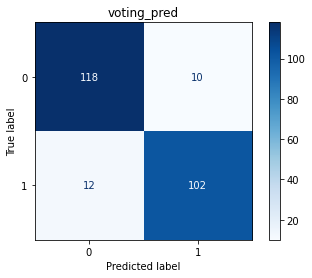

In [138]:
ConfusionMatrixDisplay.from_predictions(y_test, voting_pred, cmap = plt.cm.Blues)
plt.title('voting_pred')

In [139]:
print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       128
           1       0.91      0.89      0.90       114

    accuracy                           0.91       242
   macro avg       0.91      0.91      0.91       242
weighted avg       0.91      0.91      0.91       242



**well I did not manage to improve the GBC result.**

> **Thanks you for reading**